# About the Dataset

The Brazilian E-Commerce Public Dataset by Olist provides detailed information about over 100,000 orders made between 2016 and 2018 on the Olist platform, a Brazilian e-commerce marketplace. This dataset offers insights into various aspects of e-commerce, including order performance, customer behavior, and product popularity. It is divided into multiple datasets for clarity and ease of analysis.

## Data Schema

The dataset is divided into multiple interrelated tables to provide detailed insights into different aspects of e-commerce operations. Below is a brief description of each dataset:

1. **Customers Dataset (`olist_customers_dataset.csv`)**  
   Contains customer ID, location information, and unique identifiers for linking with orders.

2. **Geolocation Dataset (`olist_geolocation_dataset.csv`)**  
   Provides latitude and longitude data for customer and seller locations.

3. **Order Items Dataset (`olist_order_items_dataset.csv`)**  
   Details the products within each order, including pricing, quantity, and freight values.

4. **Payments Dataset (`olist_order_payments_dataset.csv`)**  
   Contains information on payment types, installment counts, and payment values for each order.

5. **Order Reviews Dataset (`olist_order_reviews_dataset.csv`)**  
   Includes customer feedback, review scores, and timestamps, essential for understanding customer satisfaction.

6. **Orders Dataset (`olist_orders_dataset.csv`)**  
   Captures order-specific information such as order status, timestamps, and customer IDs.

7. **Products Dataset (`olist_products_dataset.csv`)**  
   Describes product attributes like categories, weights, and dimensions.

8. **Sellers Dataset (`olist_sellers_dataset.csv`)**  
   Provides details about sellers, including location and unique identifiers.

9. **Product Category Translation Dataset (`product_category_name_translation.csv`)**  
   Offers English translations of product category names for better interpretability.

![Data Schema](DataSchema.PNG)


# Importing the Necessary Libraries


In [1]:
# General-purpose libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from warnings import filterwarnings


# Geographical visualizations
import folium
from folium.plugins import HeatMap

# Visualization settings
filterwarnings('ignore')


# Load Olist E-Commerce datasets

In [2]:
customers = pd.read_csv(f"olist_customers_dataset.csv")
geolocation = pd.read_csv(f"olist_geolocation_dataset.csv")
order_items = pd.read_csv(f"olist_order_items_dataset.csv")
payments = pd.read_csv(f"olist_order_payments_dataset.csv")
order_reviews = pd.read_csv(f"olist_order_reviews_dataset.csv")
orders = pd.read_csv(f"olist_orders_dataset.csv")
products = pd.read_csv(f"olist_products_dataset.csv")
sellers = pd.read_csv(f"olist_sellers_dataset.csv")
product_category_translation = pd.read_csv(f"product_category_name_translation.csv")

# Exploratory Data Analysis

## Exploratory Data Analysis on Orders Data

In [3]:
orders.head(3)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00

In [4]:
print('Number of Records:',orders.shape[0])
print('Number of Columns:',orders.shape[1])

Number of Records: 99441
Number of Columns: 8


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [6]:
# Convert date columns to datetime format
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_columns:
    orders[col] = pd.to_datetime(orders[col])


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [8]:
# Check for missing values in the dataset
orders.isna().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [9]:
# Count the number of unique order IDs
orders.order_id.nunique()

99441

In [10]:
# Check order statuses with missing values
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [11]:
# Count order statuses after dropping rows with missing values
orders.dropna()['order_status'].value_counts()

delivered    96455
canceled         6
Name: order_status, dtype: int64

#### Observations: 
- This indicates that most orders with statuses other than "delivered" or "canceled" have missing values in critical columns (e.g., delivery date or timestamp fields).
- Orders with statuses like "shipped," "unavailable," "processing," or others were excluded after dropping rows with missing values. These likely represent orders in intermediate stages or incomplete transactions.

In [12]:
#The time (in seconds) between when the order was purchased and approved.
orders['purchased_approved'] = (orders['order_approved_at'] - orders['order_purchase_timestamp']).dt.seconds

#The time (in days) between when the order was approved and handed over to the carrier.
orders['approved_carrier'] = (orders['order_delivered_carrier_date'] - orders['order_approved_at']).dt.days

#The time (in days) between when the order was handed to the carrier and delivered to the customer.
orders['carrier_delivered'] = (orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']).dt.days

#The time (in days) between delivery to the customer and the estimated delivery date.
orders['delivered_estimated'] = (orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']).dt.days

#The total time (in days) between the order purchase and final delivery to the customer.
orders['purchased_delivered'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

orders.head()


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  purchased_approved  approved_carrier  \
0                    2017-10-18               642.0               2.0   
1                    2018-08-13             24170.0               0.0   
2                    2018-09-04               994.0               0.0   
3                    2017-12-15              1073.0               3.0   
4                    2018-02-26              3710.0               0.0   

   carrier_delivered  delivered_estimated  purchased_delivered  
0                6.0                  7.0                  8.0  
1               12.0                  5.0                 13.0  
2                9.0                 17.0                  9.0  
3                9.0                 12.0                 13.0  
4                1.0                  9.0                  2.0

In [13]:
orders.describe(include=np.number)

purchased_approved  approved_carrier  carrier_delivered  \
count        99281.000000      97644.000000       96475.000000   
mean         14198.031496          2.301749           8.878310   
std          23663.448160          3.560283           8.746088   
min              0.000000       -172.000000         -17.000000   
25%            755.000000          0.000000           4.000000   
50%           1169.000000          1.000000           7.000000   
75%          17166.000000          3.000000          12.000000   
max          86399.000000        125.000000         205.000000   

       delivered_estimated  purchased_delivered  
count         96476.000000         96476.000000  
mean             10.876881            12.094086  
std              10.183854             9.551746  
min            -189.000000             0.000000  
25%               6.000000             6.000000  
50%              11.000000            10.000000  
75%              16.000000            15.000000  
max             146.000000           209.000000

In [14]:
# Remove records where approved_carrier time is negative
invalid_approved_carrier = orders[orders.approved_carrier < 0].index
orders.drop(index=invalid_approved_carrier, inplace=True)

# Remove records where carrier_delivered time is negative
invalid_carrier_delivered = orders[orders.carrier_delivered < 0].index
orders.drop(index=invalid_carrier_delivered, inplace=True)

# Remove records with canceled orders
canceled_orders = orders.dropna()[orders.order_status == 'canceled'].index
orders.drop(index=canceled_orders, inplace=True)

In [15]:
orders.describe(include=np.number)

purchased_approved  approved_carrier  carrier_delivered  \
count        97893.000000      96256.000000       95096.000000   
mean         13950.420428          2.357224           8.910228   
std          23484.689925          3.503335           8.755221   
min              0.000000          0.000000           0.000000   
25%            752.000000          0.000000           4.000000   
50%           1153.000000          1.000000           7.000000   
75%          15785.000000          3.000000          12.000000   
max          86399.000000        125.000000         205.000000   

       delivered_estimated  purchased_delivered  
count         95097.000000         95097.000000  
mean             10.825568            12.153359  
std              10.199320             9.577379  
min            -189.000000             0.000000  
25%               6.000000             6.000000  
50%              11.000000            10.000000  
75%              16.000000            15.000000  
max             146.000000           209.000000

In [16]:
# Remove orders where any datetime field is missing and the order is not 'delivered'
invalid_orders = orders[(orders.isna().any(axis=1)) & (orders.order_status != 'delivered')].index
orders.drop(index=invalid_orders, inplace=True)

# Impute missing 'order_approved_at' with median time difference from purchase to approval
approvedAtNull = orders[orders.order_approved_at.isna()].index
orders.loc[approvedAtNull, 'order_approved_at'] = orders.loc[approvedAtNull, 'order_purchase_timestamp'] + pd.Timedelta(seconds=orders.purchased_approved.median())

# Impute missing 'order_delivered_carrier_date' with median time difference from approval to carrier handoff
deliveredCarrierNull = orders[orders.order_delivered_carrier_date.isna()].index
orders.loc[deliveredCarrierNull, 'order_delivered_carrier_date'] = orders.loc[deliveredCarrierNull, 'order_approved_at'] + pd.Timedelta(days=orders.approved_carrier.median())

# Impute missing 'order_delivered_customer_date' with median time difference from carrier handoff to delivery
deliveredCustomerNull = orders[orders.order_delivered_customer_date.isna()].index
orders.loc[deliveredCustomerNull, 'order_delivered_customer_date'] = orders.loc[deliveredCustomerNull, 'order_delivered_carrier_date'] + pd.Timedelta(days=orders.carrier_delivered.median())


#### Observations:

1. **Handling Missing Values for Non-'Delivered' Orders:**  
   - Orders with missing datetime fields and a status other than 'delivered' are removed to retain only complete and relevant data.

2. **Filling Missing 'order_approved_at':**  
   - Missing `order_approved_at` values are filled by adding the median time it takes for an order to be approved after purchase, using `order_purchase_timestamp`.

3. **Filling Missing 'order_delivered_carrier_date':**  
   - Missing `order_delivered_carrier_date` values are filled by adding the median time between order approval and carrier handoff, using `order_approved_at`.

4. **Filling Missing 'order_delivered_customer_date':**  
   - Missing `order_delivered_customer_date` values are filled by adding the median time between carrier handoff and delivery to the customer, using `order_delivered_carrier_date`.


In [17]:
# Calculate the time differences between various stages of order processing
orders['purchased_approved'] = (orders.order_approved_at - orders.order_purchase_timestamp).dt.seconds
orders['approved_carrier'] = (orders.order_delivered_carrier_date - orders.order_approved_at).dt.days
orders['carrier_delivered'] = (orders.order_delivered_customer_date - orders.order_delivered_carrier_date).dt.days
orders['delivered_estimated'] = (orders.order_estimated_delivery_date - orders.order_delivered_customer_date).dt.days
orders['purchased_delivered'] = (orders.order_delivered_customer_date - orders.order_purchase_timestamp).dt.days

# Display the first few rows of the DataFrame to check the results
orders.head()


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  purchased_approved  approved_carrier  \
0                    2017-10-18                 642                 2   
1                    2018-08-13               24170                 0   
2                    2018-09-04                 994                 0   
3                    2017-12-15                1073                 3   
4                    2018-02-26                3710                 0   

   carrier_delivered  delivered_estimated  purchased_delivered  
0                  6                    7                    8  
1                 12                    5                   13  
2                  9                   17                    9  
3                  9                   12                   13  
4                  1                    9                    2

In [18]:
orders.describe(include = np.number)

purchased_approved  approved_carrier  carrier_delivered  \
count        95105.000000      95105.000000       95105.000000   
mean         13904.246517          2.351853           8.910509   
std          23444.451686          3.490348           8.755888   
min              0.000000          0.000000           0.000000   
25%            753.000000          0.000000           4.000000   
50%           1153.000000          1.000000           7.000000   
75%          15479.000000          3.000000          12.000000   
max          86399.000000        125.000000         205.000000   

       delivered_estimated  purchased_delivered  
count         95105.000000         95105.000000  
mean             10.825793            12.153147  
std              10.199025             9.577021  
min            -189.000000             0.000000  
25%               6.000000             6.000000  
50%              11.000000            10.000000  
75%              16.000000            15.000000  
max             146.000000           209.000000

In [19]:
orders.describe(exclude = np.number)

order_id                       customer_id  \
count                              95105                             95105   
unique                             95105                             95105   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   
first                                NaN                               NaN   
last                                 NaN                               NaN   

       order_status order_purchase_timestamp    order_approved_at  \
count         95105                    95105                95105   
unique            1                    94591                87320   
top       delivered      2018-06-01 13:39:44  2018-02-27 04:31:10   
freq          95105                        3                    9   
first           NaN      2016-09-15 12:16:38  2016-09-15 12:16:38   
last            NaN      2018-08-29 15:00:37  2018-08-29 15:10:26   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         95105                         95105   
unique                        79235                         94311   
top             2018-05-09 15:48:00           2018-02-14 21:09:19   
freq                             47                             3   
first           2016-10-08 10:34:01           2016-10-11 13:46:32   
last            2018-09-11 19:48:28           2018-10-17 13:22:46   

       order_estimated_delivery_date  
count                          95105  
unique                           445  
top              2017-12-20 00:00:00  
freq                             506  
first            2016-10-04 00:00:00  
last             2018-10-25 00:00:00

#### Observations:

1. **Order Approval Time**:  
   - On average, it took about 19 minutes for an order to be approved after purchase. The median is used due to the data's right-skewed distribution.

2. **Delivery Time**:  
   - Orders were delivered, on average, 12 days after the purchase date, indicating the typical delivery time.

3. **Order Status**:  
   - The dataset only includes orders marked as "delivered," as the analysis focuses on completed orders.

4. **Order Date Range**:  
   - Orders were placed between **15th September 2016** and **29th August 2018**, covering almost two years of data.

5. **Delivery vs Estimated Delivery**:  
   - Orders were delivered, on average, 11 days earlier than the estimated delivery date, although some were delayed.

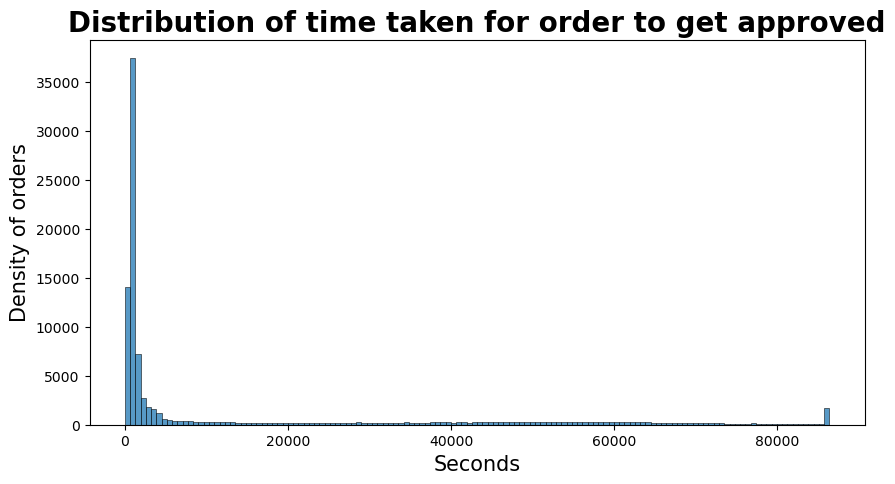

In [20]:
#Distribution of the time taken for an order to get approved
plt.figure(figsize=(10, 5))
sns.histplot(x='purchased_approved', data=orders)
plt.title('Distribution of time taken for order to get approved', fontweight='bold', fontsize=20)
plt.xlabel('Seconds', fontsize=15)
plt.ylabel('Density of orders', fontsize=15)
plt.show()


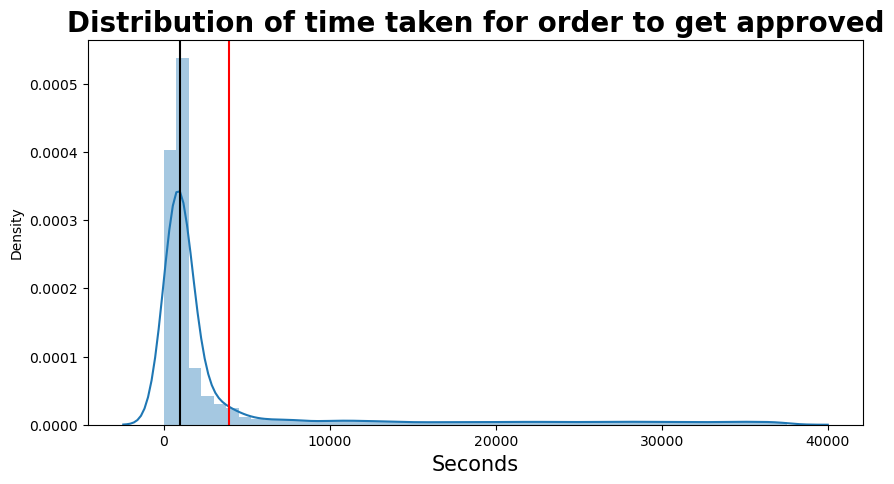

In [21]:
#Calculating the Interquartile Range (IQR)
Q1 = np.quantile(orders.purchased_approved, 0.25)
Q3 = np.quantile(orders.purchased_approved, 0.75)
IQR = Q3 - Q1

#Removing Outliers
purchasedApprovedDist = orders[~((orders.purchased_approved < Q1 - 1.5 * IQR) | (orders.purchased_approved > Q3 + 1.5 * IQR))]

#Plotting the Distribution
plt.figure(figsize=(10, 5))
sns.distplot(purchasedApprovedDist.purchased_approved)
plt.axvline(purchasedApprovedDist.purchased_approved.mean(), c='red')
plt.axvline(purchasedApprovedDist.purchased_approved.median(), c='black')
plt.xlabel('Seconds', color='black', fontsize=15)
plt.title('Distribution of time taken for order to get approved', color='black', fontsize=20, fontweight='bold')
plt.show()

In [22]:
purchasedApprovedDist.purchased_approved.describe()

count    78335.000000
mean      3944.854867
std       7741.478369
min          0.000000
25%        707.000000
50%        955.000000
75%       1940.000000
max      37563.000000
Name: purchased_approved, dtype: float64

#### Observations:

- The **approval time** for orders within the interquartile range is mostly between **0 and 5000 seconds**, as seen in the distribution plot.
- The **average time** for an order to get approved is approximately **3844.85 seconds**.

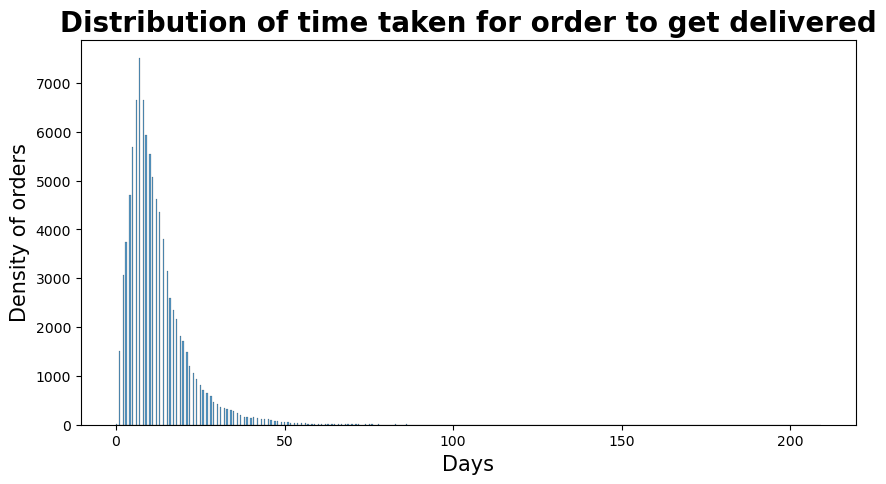

In [23]:
#Distribution of time taken for order to get delivered
plt.figure(figsize=(10, 5))
sns.histplot(x='purchased_delivered', data=orders)
plt.title('Distribution of time taken for order to get delivered', fontweight='bold', fontsize=20)
plt.xlabel('Days', fontsize=15)
plt.ylabel('Density of orders', fontsize=15)
plt.show()


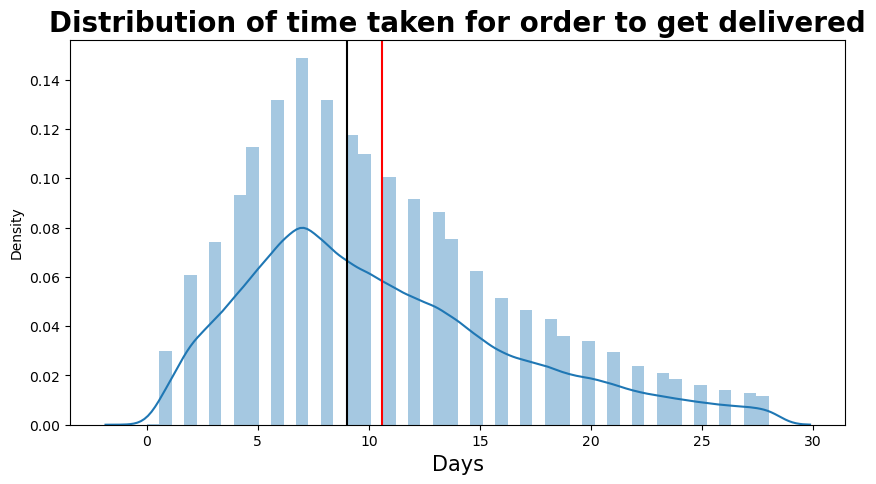

In [24]:
#Calculate the Interquartile Range
Q1 = np.quantile(orders.purchased_delivered, 0.25)
Q3 = np.quantile(orders.purchased_delivered, 0.75)
IQR = Q3 - Q1

#Filter out outliers based on the IQR
purchasedDeliveredDist = orders[~((orders.purchased_delivered < Q1 - 1.5 * IQR) | (orders.purchased_delivered > Q3 + 1.5 * IQR))]

plt.figure(figsize=(10, 5))
sns.distplot(purchasedDeliveredDist.purchased_delivered)
plt.axvline(purchasedDeliveredDist.purchased_delivered.mean(), c='red')
plt.axvline(purchasedDeliveredDist.purchased_delivered.median(), c='black')
plt.xlabel('Days', color='black', fontsize=15)
plt.title('Distribution of time taken for order to get delivered', color='black', fontsize=20, fontweight='bold')
plt.show()


In [25]:
purchasedDeliveredDist.purchased_delivered.describe()

count    90096.000000
mean        10.602968
std          6.064321
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         28.000000
Name: purchased_delivered, dtype: float64

#### Observations:

- The delivery days of orders within the interquartile range are spread mostly between **0 and 28 days**, as seen in the distribution plot.
- The **average number of days** taken for the delivery of orders is **11 days**.


## Exploratory Data Analysis on Customers Data

In [26]:
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [27]:
print(customers.shape)

(99441, 5)


In [28]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [29]:
# Check for null values
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [30]:
# Convert 'customer_zip_code_prefix' from numeric to object type
customers['customer_zip_code_prefix'] = customers['customer_zip_code_prefix'].astype('object')

In [31]:
customers.describe(include='object')

customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   

        customer_zip_code_prefix customer_city customer_state  
count                      99441         99441          99441  
unique                     14994          4119             27  
top                        22790     sao paulo             SP  
freq                         142         15540          41746

#### Observations:

- The total count of unique customer IDs is **99,441**, while the count of unique customer IDs is **96,096**. This suggests that a majority of customers are one-time visitors, i.e., their frequency of visits is 1.
  
- The customers are spread across **14,994** unique zip code locations. The most common zip code, **22790**, is from Rio de Janeiro, Brazil, with **142** customers.

- The most frequent city among the customers is **São Paulo**, and the most common state is **São Paulo** as well.


In [32]:
# Calculate the top 10 cities with the highest percentage of customers
customerCity = customers.customer_city.value_counts(normalize=True)[:10] * 100
print('The top 10 cities from which customers come are: \n', customerCity)

The top 10 cities from which customers come are: 
 sao paulo                15.627357
rio de janeiro            6.920687
belo horizonte            2.788588
brasilia                  2.142979
curitiba                  1.529550
campinas                  1.452117
porto alegre              1.386752
salvador                  1.251999
guarulhos                 1.195684
sao bernardo do campo     0.943273
Name: customer_city, dtype: float64


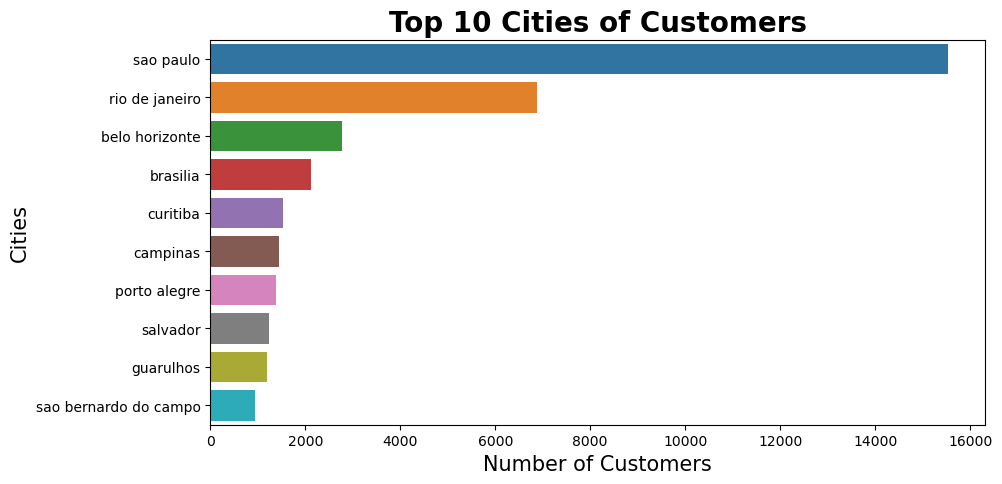

In [33]:
#Top 10 Cities of Customers
plt.figure(figsize=(10, 5))

sns.barplot(y = customers.customer_city.value_counts().index[:10], x = customers.customer_city.value_counts().values[:10])

plt.xlabel('Number of Customers', color='black', fontsize=15)
plt.ylabel('Cities', color='black', fontsize=15)

plt.title('Top 10 Cities of Customers', color='black', fontsize=20, fontweight='bold')

# Display the plot
plt.show()

#### Observations:
- The top city where the customers belong is Sao Paulo, accounting for 15.62% of the total customers.
- The second city with the highest customer count is Rio De Janeiro, which accounts for 6.92% of the customers.
- The city with the least number of customers among the top 10 is Sao Bernardo Do Campo, contributing only 0.94% of the total customer base.

In [34]:
customerState = customers.customer_state.value_counts(normalize=True)[:10] * 100
print('The top 10 cities from which customers come are: \n', customerState)

The top 10 cities from which customers come are: 
 SP    41.980672
RJ    12.924247
MG    11.700405
RS     5.496727
PR     5.073360
SC     3.657445
BA     3.399000
DF     2.152030
ES     2.044428
GO     2.031355
Name: customer_state, dtype: float64


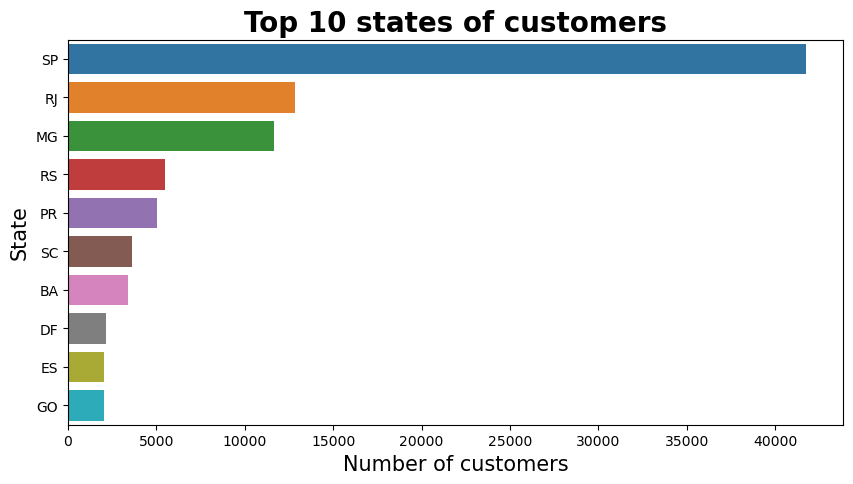

In [35]:
#Top 10 states of customers
plt.figure(figsize=(10, 5))
sns.barplot(y = customers.customer_state.value_counts().index[:10], x = customers.customer_state.value_counts().values[:10])
plt.xlabel('Number of customers',color='black',fontsize=15)
plt.ylabel('State',color='black',fontsize=15)
plt.title('Top 10 states of customers',color='black',fontsize=20,fontweight='bold')
plt.show()

#### Observations:
- The top state to which customers belong is Sao Paulo, from where 41.98% of customers come from.
- The second state with the highest customer count is Rio De Janeiro, which accounts for 12.92% of customers.

In [36]:
incorrectLocation = geolocation[(geolocation.geolocation_lat > 10) & (geolocation.geolocation_lng < -18)]
incorrectLocation

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
538512                        29654        29.409252       -98.484121   
538557                        29654        21.657547      -101.466766   
585242                        35179        25.995203       -98.078544   
585260                        35179        25.995245       -98.078533   

              geolocation_city geolocation_state  
538512  santo antônio do canaã                ES  
538557  santo antonio do canaa                ES  
585242      santana do paraíso                MG  
585260      santana do paraiso                MG

In [37]:
geolocation.drop(index = [538512, 538557, 585242, 585260], inplace = True)

- Latitude values greater than 10: This condition filters records where the latitude is above 10 degrees. In the context of the geolocation data, it is assumed that a latitude greater than 10 degrees is unlikely to correspond to land, as it would point to locations in the sea (mainly around the South Atlantic or the Indian Ocean).

- Longitude values less than -18: This condition filters records where the longitude is less than -18 degrees. Similar to the latitude condition, it is assumed that a longitude of less than -18 degrees corresponds to regions over the ocean (such as the South Atlantic Ocean near the Brazilian coast).

In [38]:
# Grouping the geolocation data by 'geolocation_zip_code_prefix' and calculating the maximum latitude and longitude for each zip code prefix.
geolocationMean = geolocation.groupby('geolocation_zip_code_prefix', as_index=False).agg({
    'geolocation_lat': 'max',  # Get the maximum latitude value for each zip code prefix
    'geolocation_lng': 'max'   # Get the maximum longitude value for each zip code prefix
})

# Display the first few rows of the resulting dataframe to inspect the aggregated values.
geolocationMean.head()


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
0                         1001       -23.549292       -46.633559
1                         1002       -23.544641       -46.633180
2                         1003       -23.548901       -46.634862
3                         1004       -23.549181       -46.634057
4                         1005       -23.548758       -46.634768

##### Observation:
Since there are many geographical coordinates given for a single geolocation zip code, we consider the maximum value of the coordinate for each particular zip code.


In [39]:
# Merging customers with geolocationMean based on zip code prefix
customerDensity = customers.merge(
    geolocationMean, 
    left_on='customer_zip_code_prefix', 
    right_on='geolocation_zip_code_prefix', 
    how='left'
)[['customer_unique_id', 'customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]

# Displaying the first few rows
customerDensity.head()

customer_unique_id customer_zip_code_prefix  geolocation_lat  \
0  861eff4711a542e4b93843c6dd7febb0                    14409       -20.468849   
1  290c77bc529b7ac935b93aa66c333dc3                     9790       -23.659702   
2  060e732b5b29e8181a18229c7b0b2b5e                     1151       -23.527788   
3  259dac757896d24d7702b9acbbff3f3c                     8775       -23.493944   
4  345ecd01c38d18a9036ed96c73b8d066                    13056       -22.961980   

   geolocation_lng  
0       -47.382173  
1       -46.530264  
2       -46.652997  
3       -46.172406  
4       -47.125767

In [40]:
# Drop rows with missing values from the customerDensity dataframe
customerDensity.dropna(inplace=True)

In [41]:
# Create a map centered on the first customer's geolocation
m = folium.Map(location = customerDensity[['geolocation_lat', 'geolocation_lng']].iloc[0].tolist(), zoom_start = 13)

# Add a heatmap layer to the map using the customer coordinates
HeatMap(customerDensity[['geolocation_lat', 'geolocation_lng']].values.tolist()).add_to(m)

# Display the map
m

#### Observation:

From the heatmap, we could see that most of the customers are based out of South America, while some are from Europe.


## Exploratory Data Analysis on OrderItems Dataframe

In [42]:
order_items.head(3)

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   

   shipping_limit_date  price  freight_value  
0  2017-09-19 09:45:35   58.9          13.29  
1  2017-05-03 11:05:13  239.9          19.93  
2  2018-01-18 14:48:30  199.0          17.87

In [43]:
# Basic information about the dataset
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [44]:
# Convert 'shipping_limit_date' to datetime format for accurate date handling
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

In [45]:
# Check for missing values in the dataset
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [46]:
# Descriptive statistics for numerical columns
order_items.describe()

order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

In [47]:
# Descriptive statistics for categorical columns
order_items.describe(include='object')

order_id                        product_id  \
count                             112650                            112650   
unique                             98666                             32951   
top     8272b63d03f5f79c56e9e4120aec44ef  aca2eb7d00ea1a7b8ebd4e68314663af   
freq                                  21                               527   

                               seller_id  
count                             112650  
unique                              3095  
top     6560211a19b47992c3666cc44a7e94c0  
freq                                2033

#### Observations

- **Unique Orders**:  
  - There are 98,666 unique orders, with the largest order containing 21 items.

- **Products**:  
  - A total of 32,951 unique products were ordered.  
  - The most frequently ordered product was ordered 527 times.

- **Sellers**:  
  - There are 3,095 unique sellers, with the top seller contributing the most product sales.

- **Product Price**:  
  - The average price of ordered products is 120.65 Brazilian Reals, with the costliest product priced at 6,735 Brazilian Reals.

- **Freight Value**:  
  - The average freight value per order is 19.99 Brazilian Reals, with the highest freight value being 409.68 Brazilian Reals.


In [48]:
# Aggregate the price and freight value for each order
top_orders = order_items.groupby('order_id', as_index=False).agg({
    'price': 'sum',
    'freight_value': 'sum'
})

# Calculate the total price for each order
top_orders['total_price'] = top_orders['price'] + top_orders['freight_value']

# Sort orders by total price in descending order and select the top 10
top_10_orders = top_orders.sort_values(by='total_price', ascending=False).head(10)

# Display the top 10 orders
top_10_orders


order_id    price  freight_value  total_price
1455   03caa2c082116e1d31e67e9ae3700499  13440.0         224.08     13664.08
44467  736e1922ae60d0d6a89247b851902527   7160.0         114.88      7274.88
3130   0812eb902a67711a1cb742b3cdaa65ae   6735.0         194.31      6929.31
98298  fefacc66af859508bf1a7934eab1e97f   6729.0         193.21      6922.21
94439  f5136e38d1a14a4dbd87dff67da82701   6499.0         227.66      6726.66
17114  2cc9089445046817a7539d90805e6e5a   5934.6         146.94      6081.54
65046  a96610ab360d42a2e5335a3998b4718a   4799.0         151.34      4950.34
69531  b4c4b76c642808cbe472a32b86cddc95   4599.9         209.54      4809.44
9868   199af31afc78c699f0dbf71fb178d4d4   4690.0          74.34      4764.34
54353  8dbc85d1447242f3b127dda390d56e19   4590.0          91.78      4681.78

In [49]:
# Count the occurrences of each seller_id
top_sellers = order_items.seller_id.value_counts()

# Display the top 5 sellers
top_sellers.head()

6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
Name: seller_id, dtype: int64

In [50]:
# Convert the top sellers data into a DataFrame
top_sellers_df = pd.DataFrame({
    'seller_id': top_sellers.index, 
    'instances': top_sellers.values 
})

# Display the top sellers DataFrame
top_sellers_df.head()


seller_id  instances
0  6560211a19b47992c3666cc44a7e94c0       2033
1  4a3ca9315b744ce9f8e9374361493884       1987
2  1f50f920176fa81dab994f9023523100       1931
3  cc419e0650a3c5ba77189a1882b7556a       1775
4  da8622b14eb17ae2831f4ac5b9dab84a       1551

In [51]:
# Create geolocation_mean by grouping by geolocation_zip_code_prefix and aggregating latitude and longitude
geolocation_mean = geolocation.groupby('geolocation_zip_code_prefix', as_index=False).agg({'geolocation_lat': 'max', 'geolocation_lng': 'max'})

# Merge top_sellers with sellers and geolocation_mean
top_sellers_of_orders = (
    top_sellers_df
    .merge(sellers, on='seller_id')
    .merge(geolocation_mean, 
           left_on='seller_zip_code_prefix', 
           right_on='geolocation_zip_code_prefix')
    .drop(columns=['geolocation_zip_code_prefix'], axis=1)
    .sort_values('instances', ascending=False)
)

# Display the top rows
top_sellers_of_orders.head()


seller_id  instances  seller_zip_code_prefix  \
0   6560211a19b47992c3666cc44a7e94c0       2033                    5849   
2   4a3ca9315b744ce9f8e9374361493884       1987                   14940   
51  1f50f920176fa81dab994f9023523100       1931                   15025   
55  cc419e0650a3c5ba77189a1882b7556a       1775                    9015   
58  da8622b14eb17ae2831f4ac5b9dab84a       1551                   13405   

              seller_city seller_state  geolocation_lat  geolocation_lng  
0               sao paulo           SP       -23.649432       -46.753466  
2                ibitinga           SP       -21.734663       -48.809349  
51  sao jose do rio preto           SP       -20.793902       -49.376768  
55            santo andre           SP       -23.653394       -46.513267  
58             piracicaba           SP       -22.692313       -47.653256

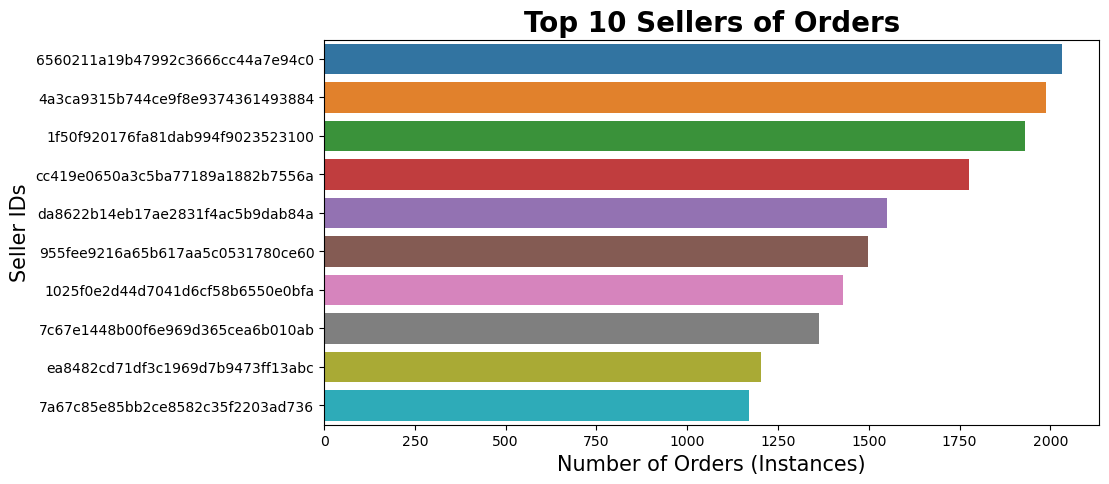

In [52]:
# Plotting the bar plot for top 10 sellers by the number of instances (orders)
plt.figure(figsize=(10, 5))

sns.barplot(x=top_sellers_of_orders['instances'][:10], y=top_sellers_of_orders['seller_id'][:10])

plt.xlabel('Number of Orders (Instances)', color='black', fontsize=15)
plt.ylabel('Seller IDs', color='black', fontsize=15)
plt.title('Top 10 Sellers of Orders', color='black', fontsize=20, fontweight='bold')

plt.show()

#### Observations:

- Since the seller IDs are masked, it is not possible to directly identify the sellers.
- Therefore, we use the location and city of the sellers to draw inferences about their distribution and characteristics.


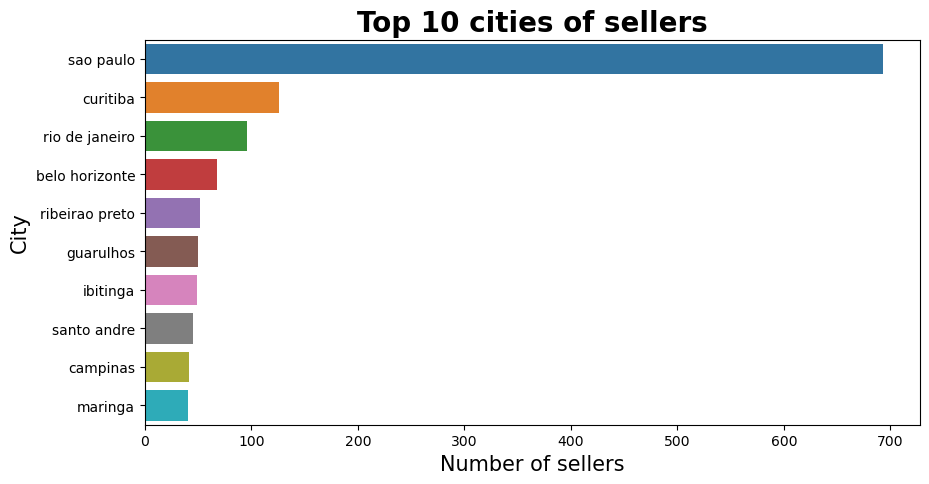

In [53]:
# Plotting the top 10 cities where sellers are based
plt.figure(figsize=(10, 5))  # Set the figure size

sns.barplot(y = top_sellers_of_orders.seller_city.value_counts().index[:10], 
            x = top_sellers_of_orders.seller_city.value_counts().values[:10])

plt.xlabel('Number of sellers', color='black', fontsize=15)
plt.ylabel('City', color='black', fontsize=15)
plt.title('Top 10 cities of sellers', color='black', fontsize=20, fontweight='bold')

plt.show()

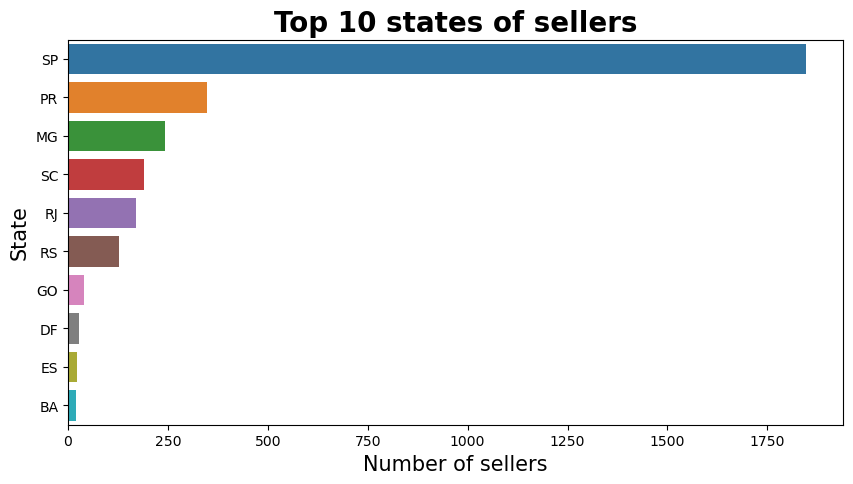

In [54]:
# Plotting the top 10 states where sellers are based
plt.figure(figsize=(10, 5))  # Set the figure size

sns.barplot(y = top_sellers_of_orders.seller_state.value_counts().index[:10], 
            x = top_sellers_of_orders.seller_state.value_counts().values[:10])

plt.xlabel('Number of sellers', color='black', fontsize=15)
plt.ylabel('State', color='black', fontsize=15)  # Corrected label to 'State'
plt.title('Top 10 states of sellers', color='black', fontsize=20, fontweight='bold')

plt.show()


#### Observations:

- The sellers of orders are mostly from the city of Sao Paulo, followed by Curitiba and Rio De Janeiro.
- The sellers of orders are mostly from the state of Sao Paulo.
- This is consistent with the fact that most of the customers are also from the same state and city, Sao Paulo.


In [55]:
# create a map centered on the first seller's coordinates
m = folium.Map(location = top_sellers_of_orders[['geolocation_lat', 'geolocation_lng']].values.tolist()[0], zoom_start = 13)

coordinates = top_sellers_of_orders[['geolocation_lat', 'geolocation_lng']].values.tolist()

heat_layer = HeatMap(coordinates)

heat_layer.add_to(m)

m

#### Observation:

From the heatmap of the sellers based on their latitudes and longitudes, we can infer that the concentration of sellers is primarily in South America. They cater to all of our customers, who are spread across Europe and South America.


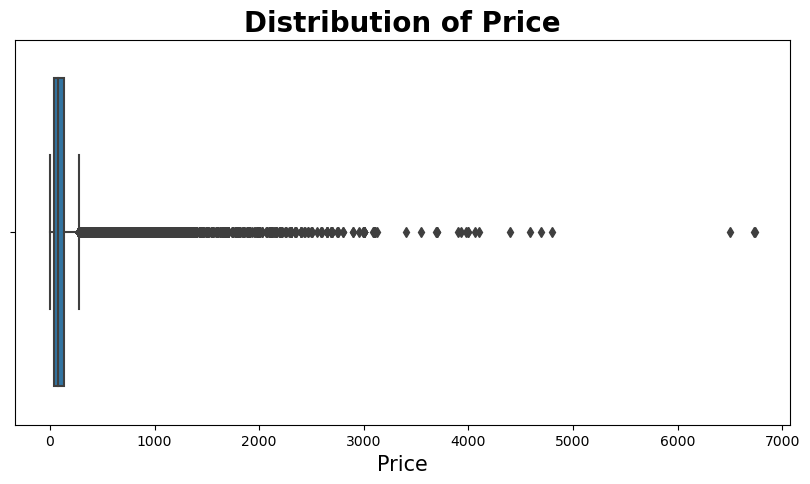

In [56]:
# Plotting the distribution of price using a boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='price', data=order_items)
plt.xlabel('Price', color='black', fontsize=15)
plt.title('Distribution of Price', color='black', fontsize=20, fontweight='bold')
plt.show()


#### Observations:
- From the boxplot, we can infer that the price of the products ordered is highly right-skewed.
- To view the spread of the price more clearly, we will ignore the outliers and then examine the distribution.


In [57]:
# Calculate the first and third quartiles and the IQR (Interquartile Range)
Q1 = np.quantile(order_items.price, 0.25)
Q3 = np.quantile(order_items.price, 0.75)
IQR = Q3 - Q1

# Filter out the outliers based on the IQR method
price_distribution = order_items[~((order_items.price < Q1 - 1.5 * IQR) | (order_items.price > Q3 + 1.5 * IQR))]

# Show the first few rows of the data after removing outliers
price_distribution.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14

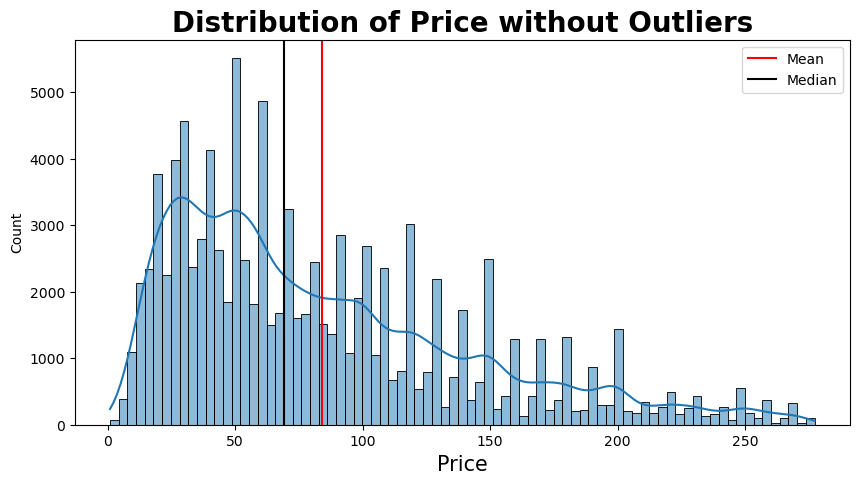

In [58]:
# Plotting the distribution of price without outliers
plt.figure(figsize=(10, 5))
sns.histplot(price_distribution.price, kde=True)  # using histplot for better compatibility with seaborn
plt.axvline(price_distribution.price.mean(), c='red', label='Mean')  # Line for mean
plt.axvline(price_distribution.price.median(), c='black', label='Median')  # Line for median
plt.xlabel('Price', color='black', fontsize=15)
plt.title('Distribution of Price without Outliers', color='black', fontsize=20, fontweight='bold')
plt.legend()
plt.show()


In [59]:
price_distribution.price.describe()

count    104223.000000
mean         83.974668
std          58.580002
min           0.850000
25%          38.500000
50%          69.000000
75%         118.990000
max         277.300000
Name: price, dtype: float64

#### Observations:

- The price of the products within the interquartile range is spread mostly between 0 and 100 Brazilian Reals, which can be observed in the distribution plot.
- The average price of the products is 83.97 Brazilian Reals.


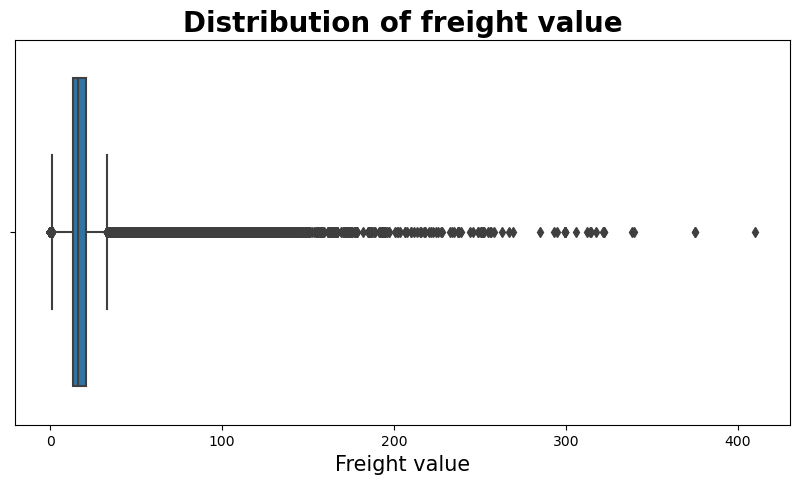

In [60]:
# Visualize the distribution of freight values using a boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='freight_value', data=order_items)
plt.xlabel('Freight value',color='black',fontsize=15)
plt.title('Distribution of freight value',color='black',fontsize=20,fontweight='bold')
plt.show()

#### Observations:
- From the boxplot, we can infer that the freight value of the product ordered is highly right-skewed.
- To view the spread of the freight value more clearly, we will ignore the outliers and then examine the distribution.


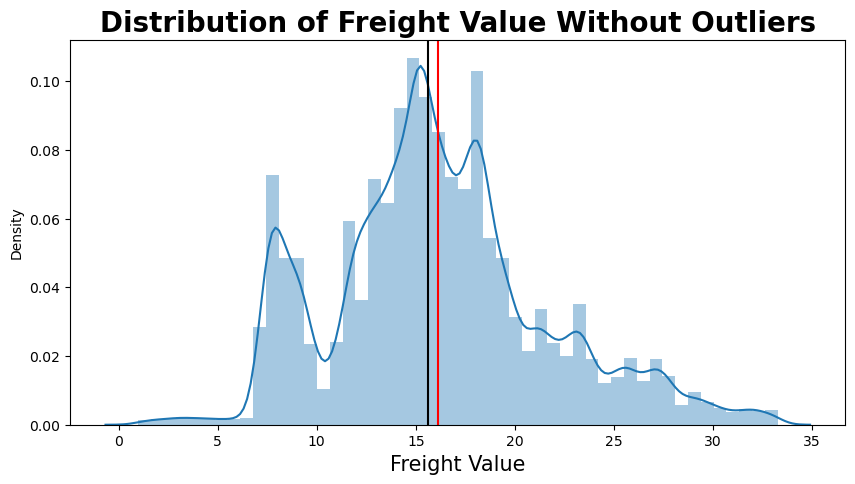

In [61]:
# Calculate the IQR for freight_value
Q1 = np.quantile(order_items.freight_value, 0.25)
Q3 = np.quantile(order_items.freight_value, 0.75)
IQR = Q3 - Q1

# Filter out outliers
freight_value_distribution = order_items[~((order_items.freight_value < Q1 - 1.5 * IQR) | (order_items.freight_value > Q3 + 1.5 * IQR))]

# Display the filtered data
freight_value_distribution.head()

# Plot the distribution of freight values without outliers
plt.figure(figsize=(10, 5))
sns.distplot(freight_value_distribution.freight_value)
plt.axvline(freight_value_distribution.freight_value.mean(), c = 'red')
plt.axvline(freight_value_distribution.freight_value.median(), c = 'black')
plt.xlabel('Freight Value', color='black', fontsize=15)
plt.title('Distribution of Freight Value Without Outliers', color='black', fontsize=20, fontweight='bold')
plt.show()


In [62]:
freight_value_distribution.freight_value.describe()

count    100516.000000
mean         16.125685
std           5.468564
min           0.980000
25%          12.760000
50%          15.620000
75%          18.800000
max          33.250000
Name: freight_value, dtype: float64

#### Observations:

- The freight values of the products within the interquartile range are spread mostly between 5 and 25 Brazilian Reals, which can be seen in the distribution plot. We could infer that such orders were within the continent of South America.
- The average freight value of the products is 16.12 Brazilian Reals.


## Exploratory Data Analysis on Payments DataFrame

In [63]:
# Display the first 3 rows of the payments dataframe
payments.head(3)

# Print the number of records and columns in the payments dataframe
print('Number of Records:', payments.shape[0])
print('Number of Columns:', payments.shape[1])

Number of Records: 103886
Number of Columns: 5


In [64]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [65]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [66]:
# Generate summary statistics for the numerical columns in the payments dataframe
payments.describe(include = np.number)

payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000

In [67]:
# Generate summary statistics for the non-numerical columns in the payments dataframe
payments.describe(exclude = np.number)

order_id payment_type
count                             103886       103886
unique                             99440            5
top     fa65dad1b0e818e3ccc5cb0e39231352  credit_card
freq                                  29        76795

#### Observations:

- There is no presence of Null values in the payments dataframe.
- Most of the payments were made through credit cards.
- The average number of payment installments was 1. Since it is highly right skewed, the mean is not considered. The maximum number of payment installments for an order was 24.
- The payment value of the orders is highly right skewed. The average payment value is 154.1 Brazilian Reals.


In [68]:
# Calculate the percentage distribution of each payment type
# 'value_counts(normalize=True)' returns the relative frequencies (proportions)
# 'normalize=True' ensures the values are normalized to proportions
# Multiplying by 100 converts the proportions into percentages
payments.payment_type.value_counts(normalize=True) * 100


credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: payment_type, dtype: float64

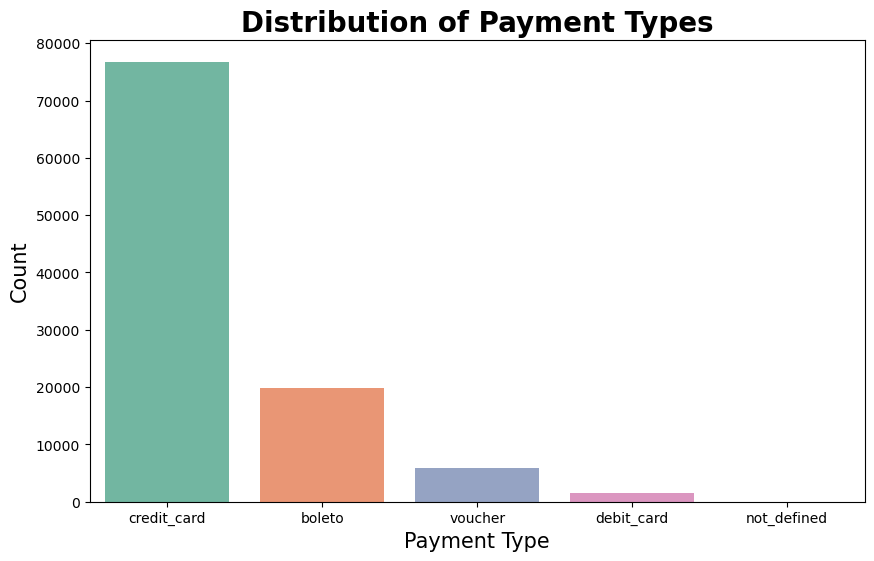

In [69]:
# Create a count plot for the payment types
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_type', data=payments, palette='Set2')

plt.xlabel('Payment Type', color='black', fontsize=15)
plt.ylabel('Count', color='black', fontsize=15)
plt.title('Distribution of Payment Types', color='black', fontsize=20, fontweight='bold')

plt.show()

#### Observations:

- From the count plot, we can clearly see that credit cards account for 73.9% of payments, making it the most preferred payment type, followed by boleto, voucher, and debit card.
- There is an imbalance present in the data, as most of the payment types are dominated by credit cards.


In [70]:
# Get the distribution of number of payment installments (top 10)
payments.payment_installments.value_counts(normalize=True)[:10] * 100

1     50.580444
2     11.948675
3     10.069692
4      6.832489
10     5.128699
5      5.043028
8      4.108350
6      3.773367
7      1.565177
9      0.619910
Name: payment_installments, dtype: float64

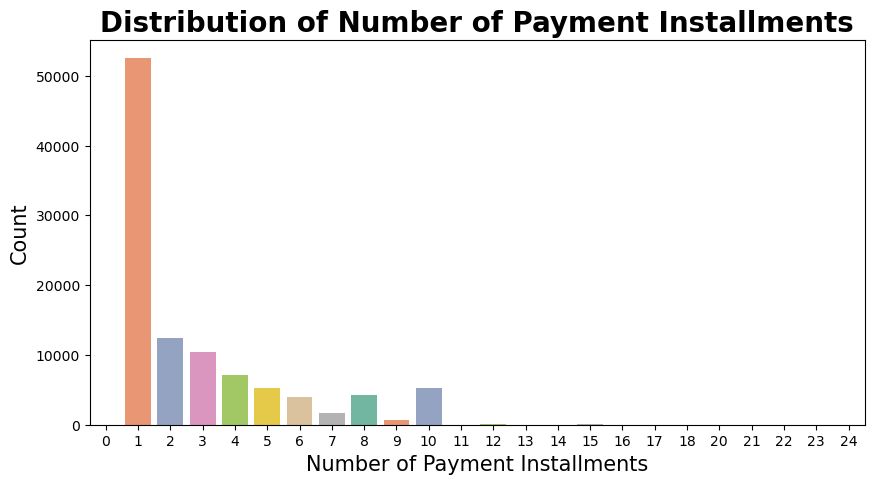

In [71]:
# Set the size of the plot
plt.figure(figsize=(10, 5))

sns.countplot(x='payment_installments', data=payments, palette='Set2')

plt.xlabel('Number of Payment Installments', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Number of Payment Installments', fontsize=20, fontweight='bold')

plt.show()

### Observations:

- Most customers preferred to pay for the order in a single installment.
- However, customers also opted for more than one installment, and the number of such payments is not insignificant.


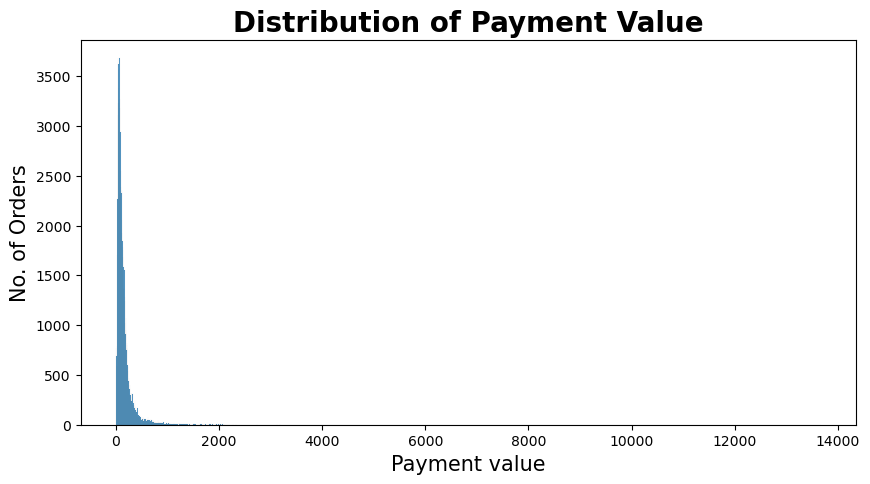

In [72]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

sns.histplot(x='payment_value', data=payments)

plt.title('Distribution of Payment Value', fontweight='bold', fontsize=20)

plt.xlabel('Payment value', fontsize=15)

plt.ylabel('No. of Orders', fontsize=15)

plt.show()


In [73]:
# Calculate the first and third quartiles and the interquartile range (IQR) for 'payment_value'
Q1 = np.quantile(payments.payment_value, 0.25)
Q3 = np.quantile(payments.payment_value, 0.75)
IQR = Q3 - Q1

# Filter out the outliers based on IQR
paymentValueDistribution = payments[~((payments.payment_value < Q1 - 1.5 * IQR) | (payments.payment_value > Q3 + 1.5 * IQR))]

paymentValueDistribution.head()


order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

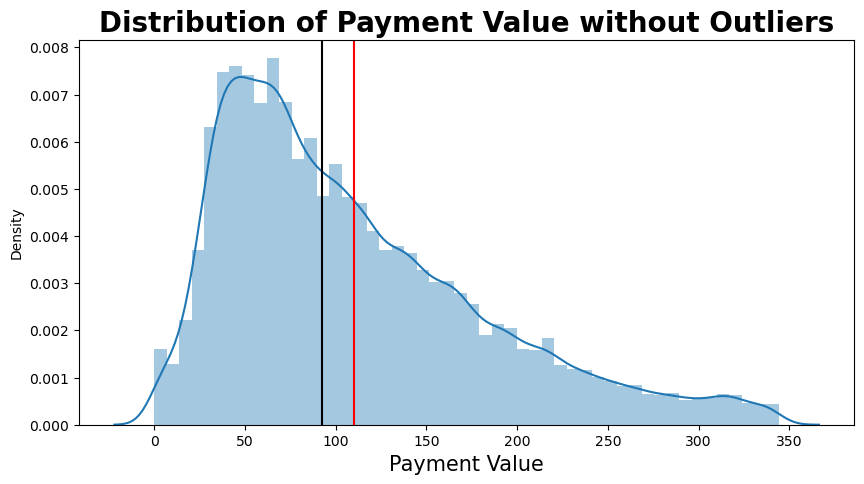

In [74]:
plt.figure(figsize=(10, 5))

# Create a distribution plot of 'payment_value' without outliers
sns.distplot(paymentValueDistribution.payment_value)

plt.axvline(paymentValueDistribution.payment_value.mean(), c='red')
plt.axvline(paymentValueDistribution.payment_value.median(), c='black')

plt.xlabel('Payment Value', color='black', fontsize=15)

plt.title('Distribution of Payment Value without Outliers', color='black', fontsize=20, fontweight='bold')

plt.show()

In [75]:
paymentValueDistribution.payment_value.describe()

count    95905.000000
mean       110.062133
std         72.785054
min          0.000000
25%         54.000000
50%         92.200000
75%        150.580000
max        344.340000
Name: payment_value, dtype: float64

#### Observations:

- The payment values of the orders within the interquartile range are spread mostly between 0 and 200, which could be seen in the distribution plot.
- The average payment value for the orders is 110.06 Brazilian Reals.

## Exploratory DataAnalysis On Order Reviews Dataframe

In [76]:
order_reviews.head(3)

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   

   review_score review_comment_title review_comment_message  \
0             4                  NaN                    NaN   
1             5                  NaN                    NaN   
2             5                  NaN                    NaN   

  review_creation_date review_answer_timestamp  
0  2018-01-18 00:00:00     2018-01-18 21:46:59  
1  2018-03-10 00:00:00     2018-03-11 03:05:13  
2  2018-02-17 00:00:00     2018-02-18 14:36:24

In [77]:
print('Number of records:', order_reviews.shape[0])
print('Number of columns:', order_reviews.shape[1])

Number of records: 99224
Number of columns: 7


In [78]:
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews.review_answer_timestamp)
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews.review_creation_date)

In [79]:
# Display the summary of the 'orderReviews' DataFrame to check the data types and non-null values
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [80]:
order_reviews.isna().sum()[order_reviews.isna().sum() > 0] / len(order_reviews) * 100

review_comment_title      88.341530
review_comment_message    58.702532
dtype: float64

#### Observations:

- 88.34% of the review_comment_title column contains null values.
- 58.7% of the review_comment_message column contains null values.
- We are dropping the null values for further analysis.


In [81]:
order_reviews.dropna(inplace=True)

In [82]:
review_score = order_reviews.review_score.value_counts(normalize=True) * 100
review_score

5    55.107226
1    18.182742
4    14.564488
3     7.490599
2     4.654945
Name: review_score, dtype: float64

#### Observations:

- From the count plot of review scores, we can clearly see that for about 57.77% of orders, the review score is 5, which is the maximum review score.
- This indicates that customers were mostly satisfied with the products and the business.


In [83]:
# Merging order reviews with order timestamps based on 'order_id'
review_score_analysis = order_reviews[['order_id', 'review_score']].merge(
    orders[['order_id', 'purchased_approved', 'approved_carrier', 'carrier_delivered', 'delivered_estimated', 'purchased_delivered']], 
    on='order_id', how='left'
)

# Displaying the first few rows
review_score_analysis.head()


order_id  review_score  purchased_approved  \
0  b9bf720beb4ab3728760088589c62129             4               525.0   
1  e51478e7e277a83743b6f9991dbfa3fb             5               883.0   
2  583174fbe37d3d5f0d6661be3aad1786             1                 NaN   
3  4fc44d78867142c627497b60a7e0228a             5                 NaN   
4  37e7875cdce5a9e5b3a692971f370151             4              3042.0   

   approved_carrier  carrier_delivered  delivered_estimated  \
0               0.0                6.0                 15.0   
1               0.0                3.0                 15.0   
2               NaN                NaN                  NaN   
3               NaN                NaN                  NaN   
4               3.0               16.0                  7.0   

   purchased_delivered  
0                  7.0  
1                  3.0  
2                  NaN  
3                  NaN  
4                 19.0

In [84]:
# Calculate mean values for on-time and late deliveries based on 'delivered_estimated'
ontime_delivery_review = review_score_analysis[review_score_analysis.delivered_estimated > 0].mean()[['review_score', 'purchased_approved', 'approved_carrier', 'carrier_delivered', 'delivered_estimated', 'purchased_delivered']]
late_delivery_review = review_score_analysis[review_score_analysis.delivered_estimated < 0].mean()[['review_score', 'purchased_approved', 'approved_carrier', 'carrier_delivered', 'delivered_estimated', 'purchased_delivered']]

# Combine the results into a DataFrame for comparison
comparison_review = pd.DataFrame([ontime_delivery_review, late_delivery_review]).T
comparison_review.columns = ['on time delivery', 'late delivery']

comparison_review


on time delivery  late delivery
review_score                 4.040577       2.577267
purchased_approved       14923.547788   18692.007663
approved_carrier             1.810071       4.840358
carrier_delivered            6.335004      19.363985
delivered_estimated         13.512100      -7.748404
purchased_delivered          8.939012      25.163474

#### Observations:

- **Review Scores:** Late deliveries had an average review score of **2.5**, while on-time deliveries had **4**.
- **Delivery Time:** Late deliveries took **25 days** on average, whereas on-time deliveries took **9 days**.
- **Estimated vs. Actual Delivery:** On-time deliveries were typically delivered **14 days ahead** of the estimated delivery date.
- **Approval Time:** Late deliveries took an **extra hour** on average for approval compared to on-time deliveries.


In [85]:
top_comments = order_reviews.review_comment_title.value_counts()[:10]
print('The top 10 comments by the customer are:', top_comments, sep='\n')


The top 10 comments by the customer are:
Recomendo          354
recomendo          270
Bom                228
super recomendo    213
Excelente          203
Ótimo              193
Muito bom          192
Super recomendo    184
Ótimo              149
Otimo              133
Name: review_comment_title, dtype: int64


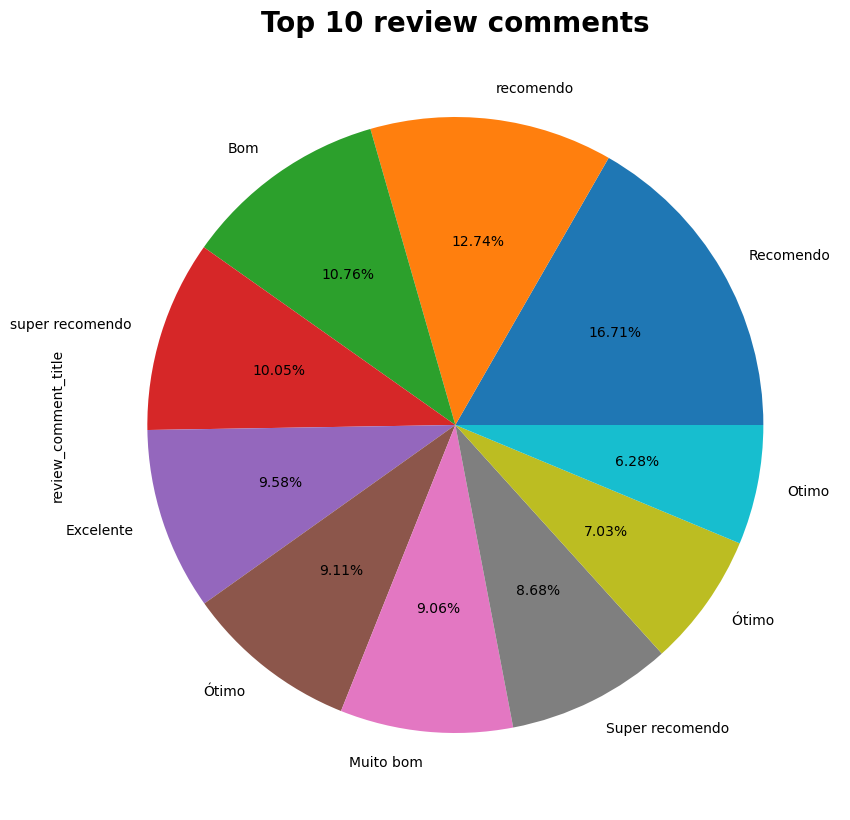

In [86]:
top_comments.plot(kind="pie", autopct="%2.2f%%", figsize=(10, 10))
plt.title('Top 10 review comments', fontweight='bold', fontsize=20)
plt.show()


#### Observations:

- The most common review comment is **"Recomendo"** (I recommend), followed by **"Bom"** (Good), **"Super recomendo"** (I highly recommend), and **"Excelente"** (Excellent).
- **"Recomendo"** accounts for about **53.01%** of the top 10 review comments.

In [87]:
# Partitioning of review scores
order_reviews['review_score_binary'] = order_reviews['review_score'].apply(lambda x: 0 if x < 3 else 1)

# Checking the updated distribution of review scores
order_reviews['review_score_binary'].value_counts()



1    7592
0    2247
Name: review_score_binary, dtype: int64

Total Positive Reviews: 7592 , ( 77.16231324321578 %)
Total Negative Reviews: 2247 , ( 22.837686756784226 %)




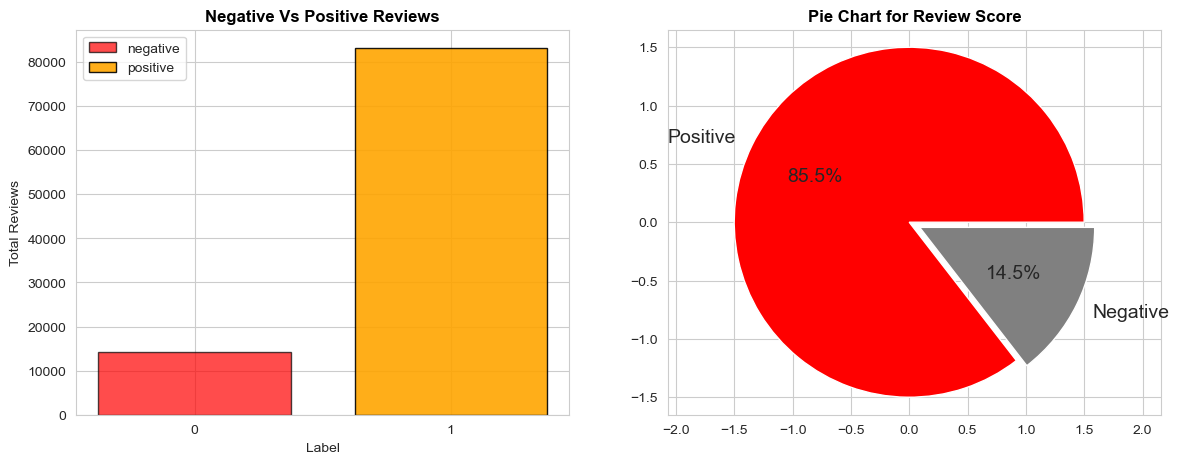

In [88]:
# Counting the review score with 1 and 0
review_score_counts = order_reviews.review_score_binary.value_counts()

# Calculating the percentage of each review type
print("Total Positive Reviews:", review_score_counts[1], ", (", (review_score_counts[1] / (review_score_counts[1] + review_score_counts[0])) * 100, "%)")
print("Total Negative Reviews:", review_score_counts[0], ", (", (review_score_counts[0] / (review_score_counts[1] + review_score_counts[0])) * 100, "%)")
print('\n')

# Plotting bar-plot and pie chart
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(14, 5))

# Bar plot
plt.subplot(1, 2, 1)
plt.ylabel('Total Reviews')
plt.xlabel('Label')
plt.title('Negative Vs Positive Reviews', color='black', fontweight='bold')
plt.xticks([10, 10.20], ['0', '1'])
# Creating bar plots
plt.bar(10, 14112, color='red', width=0.15, alpha=0.7, label='negative', edgecolor='black')
plt.bar(10.20, 83143, color='orange', width=0.15, alpha=0.9, label='positive', edgecolor='black')
plt.legend()

# Pie chart
plt.subplot(1, 2, 2)
labels = ['Positive', 'Negative']
sizes = [83143, 14112]
explode = (0, 0.1)  # Only "explode" the 2nd slice (i.e. 'Negative')
colors = ['red', 'grey']
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=False, startangle=0, radius=1.5,
        labeldistance=1.1, textprops={'fontsize': 14}, frame=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for Review Score', color='black', fontweight='bold')
plt.show()


#### Observations:

- **Review Scores Classification**: In this analysis, review scores below 3 are considered **negative reviews**, while scores above 3 are considered **positive reviews**.
- **Percentage Distribution**: From the plots above, we can observe that:
  - **85.5%** of the total reviews are **positive**.
  - **14.5%** of the reviews are **negative**.
- This insight indicates that the majority of customers were satisfied with the products or services they received.

## Exploratory Data Analysis On Products Dataframe

In [89]:
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [90]:
print('Number of records:', products.shape[0])
print('Number of Columns:', products.shape[1])

Number of records: 32951
Number of Columns: 9


In [91]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [92]:
products.dropna(inplace = True)

#### Observation:

- Since the product IDs are masked, if they do not have any category name, we could not interpret anything from the data, so dropping such records will be the best way to proceed with the analysis.

In [93]:
# Merging the products, order_items, and product_category_translation datasets
ordered_products = products.merge(order_items, on='product_id') \
                            .merge(product_category_translation, on='product_category_name') \
                            [['product_id', 'product_category_name_english', 'product_name_lenght', 
                              'product_description_lenght', 'product_photos_qty', 'product_weight_g', 
                              'product_length_cm', 'product_height_cm', 'product_width_cm', 
                              'order_id', 'price', 'freight_value']]

# Adding a new column 'total_revenue' as the sum of price and freight_value
ordered_products['total_revenue'] = ordered_products['price'] + ordered_products['freight_value']

# Displaying the first few rows of the ordered_products dataframe
ordered_products.head()


product_id product_category_name_english  \
0  1e9e8ef04dbcff4541ed26657ea517e5                     perfumery   
1  6a2fb4dd53d2cdb88e0432f1284a004c                     perfumery   
2  6a2fb4dd53d2cdb88e0432f1284a004c                     perfumery   
3  0d009643171aee696f4733340bc2fdd0                     perfumery   
4  0d009643171aee696f4733340bc2fdd0                     perfumery   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 39.0                       346.0                 2.0   
2                 39.0                       346.0                 2.0   
3                 52.0                       150.0                 1.0   
4                 52.0                       150.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1             400.0               27.0                5.0              20.0   
2             400.0               27.0                5.0              20.0   
3             422.0               21.0               16.0              18.0   
4             422.0               21.0               16.0              18.0   

                           order_id   price  freight_value  total_revenue  
0  e17e4f88e31525f7deef66779844ddce   10.91           7.39          18.30  
1  048cc42e03ca8d43c729adf6962cb348   16.90           7.78          24.68  
2  5fa78e91b5cb84b6a8ccc42733f95742   16.90           7.78          24.68  
3  24b1c4d88fdb7a2dc87f8ecc7d8f47f1  339.00          17.13         356.13  
4  7b13c77c64a9a956500cbf1a9a23798d  275.00          23.48         298.48

In [94]:
# Grouping the ordered_products by product category and aggregating the relevant columns
ordered_products_analysis = ordered_products.groupby('product_category_name_english', as_index=False).agg({
    'product_id': 'count',  # Counting the number of products in each category
    'order_id': 'count',    # Counting the number of orders in each category
    'price': 'sum',         # Summing the price in each category
    'freight_value': 'sum', # Summing the freight value in each category
    'total_revenue': 'sum'  # Summing the total revenue in each category
})

# Displaying the first few rows of the analysis result
ordered_products_analysis.head()

product_category_name_english  product_id  order_id     price  \
0    agro_industry_and_commerce         212       212  72530.47   
1              air_conditioning         297       297  55024.96   
2                           art         209       209  24202.64   
3         arts_and_craftmanship          24        24   1814.01   
4                         audio         364       364  50688.50   

   freight_value  total_revenue  
0        5843.60       78374.07  
1        6749.23       61774.19  
2        4045.17       28247.81  
3         370.13        2184.14  
4        5710.44       56398.94

In [95]:
# Generating the summary statistics for the numeric columns
ordered_products_analysis.select_dtypes(include=np.number).describe()

product_id      order_id         price  freight_value  total_revenue
count     71.000000     71.000000  7.100000e+01      71.000000   7.100000e+01
mean    1563.690141   1563.690141  1.887980e+05   31313.653521   2.201117e+05
std     2606.537422   2606.537422  3.036850e+05   50281.462423   3.515343e+05
min        2.000000      2.000000  2.832900e+02      41.220000   3.245100e+02
25%       93.000000     93.000000  9.171185e+03    1973.205000   1.174393e+04
50%      281.000000    281.000000  4.685688e+04    6749.230000   5.605240e+04
75%     1819.000000   1819.000000  2.029071e+05   35505.620000   2.214684e+05
max    11115.000000  11115.000000  1.258681e+06  204693.040000   1.441248e+06

In [96]:
# Sorting the orderedProductsAnalysis dataframe by 'total_revenue' column in descending order and selecting the top 10 rows with the highest revenue
top10_revenue_generating = ordered_products_analysis.sort_values(by='total_revenue', ascending=False)[:10]

top10_revenue_generating


product_category_name_english  product_id  order_id       price  \
43                 health_beauty        9670      9670  1258681.34   
70                 watches_gifts        5991      5991  1205005.68   
7                 bed_bath_table       11115     11115  1036988.68   
65                sports_leisure        8641      8641   988048.97   
15         computers_accessories        7827      7827   911954.32   
39               furniture_decor        8334      8334   729762.49   
49                    housewares        6964      6964   632248.66   
20                    cool_stuff        3796      3796   635290.85   
5                           auto        4235      4235   592720.11   
42                  garden_tools        4347      4347   485256.46   

    freight_value  total_revenue  
43      182566.73     1441248.07  
70      100535.93     1305541.61  
7       204693.04     1241681.72  
65      168607.51     1156656.48  
15      147318.08     1059272.40  
39      172749.30      902511.79  
49      146149.11      778397.77  
20       84039.10      719329.95  
5        92664.21      685384.32  
42       98962.75      584219.21

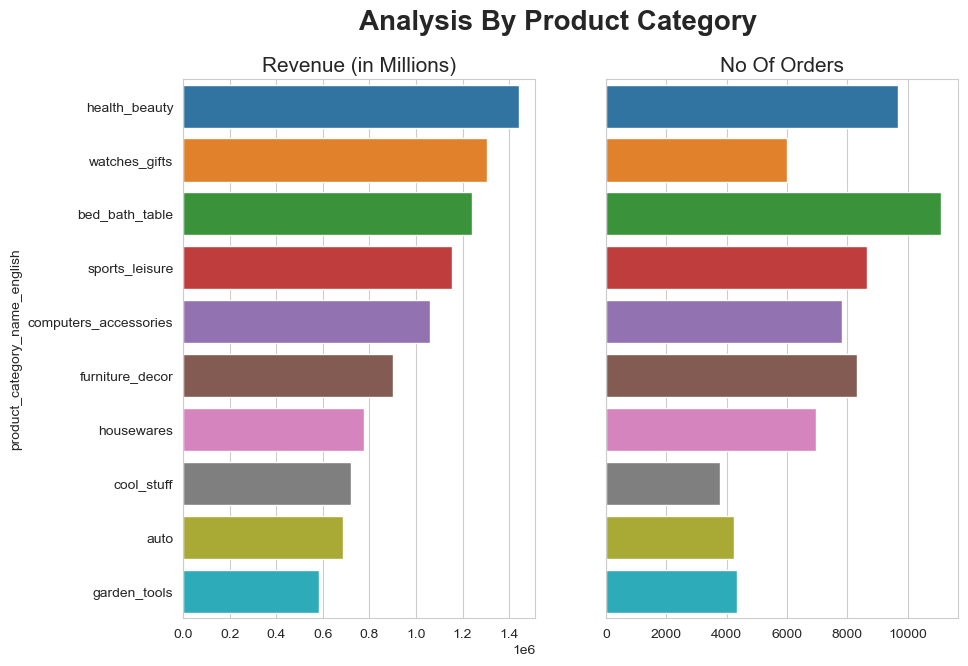

In [97]:
# Creating subplots to analyze product categories by revenue and number of orders
fig, ax = plt.subplots(1, 2, figsize=(10, 7), sharey=True)
fig.suptitle('Analysis By Product Category', fontsize=20, fontweight='bold')

# Barplot for total revenue
sns.barplot(ax=ax[0], x='total_revenue', y='product_category_name_english', data=top10_revenue_generating)
ax[0].set_title('Revenue (in Millions)', fontsize=15)

# Barplot for number of orders
sns.barplot(ax=ax[1], x='order_id', y='product_category_name_english', data=top10_revenue_generating)
ax[1].set_title('No Of Orders', fontsize=15)

# Removing x-labels and y-labels for the plots
for i in range(2):
    ax[i].set(xlabel=None)
    if i > 0:
        ax[i].set(ylabel=None)

In [98]:
# Sorting the ordered_products_analysis dataframe by total revenue in ascending order to get the bottom 10 revenue-generating product categories
bottom_10_revenue_generating = ordered_products_analysis.sort_values(by='total_revenue', ascending=True)[:10]

# Displaying the bottom 10 revenue-generating product categories
bottom_10_revenue_generating


product_category_name_english  product_id  order_id    price  \
61         security_and_services           2         2   283.29   
29     fashion_childrens_clothes           8         8   569.85   
11             cds_dvds_musicals          14        14   730.00   
46                home_comfort_2          30        30   760.27   
35                       flowers          33        33  1110.04   
23           diapers_and_hygiene          39        39  1567.59   
3          arts_and_craftmanship          24        24  1814.01   
52                    la_cuisine          14        14  2054.99   
32                 fashion_sport          30        30  2119.51   
27        fashio_female_clothing          48        48  2803.64   

    freight_value  total_revenue  
61          41.22         324.51  
29          95.51         665.36  
11         224.99         954.99  
46         410.31        1170.58  
35         488.87        1598.91  
23         573.68        2141.27  
3          370.13        2184.14  
52         333.55        2388.54  
32         578.13        2697.64  
27         621.75        3425.39

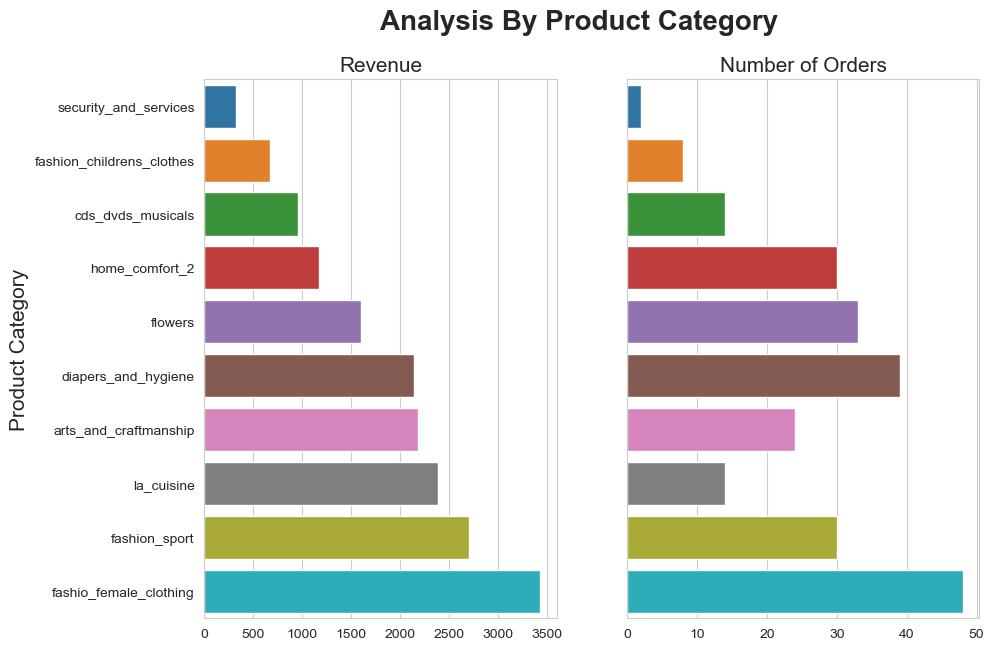

In [99]:
# Creating subplots to analyze bottom 10 revenue-generating product categories
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 7), sharey=True)
fig.suptitle('Analysis By Product Category', fontsize=20, fontweight='bold')

# Barplot for total revenue by product category
sns.barplot(ax=ax[0], x='total_revenue', y=bottom_10_revenue_generating.product_category_name_english, data=bottom_10_revenue_generating)
ax[0].set_title('Revenue', fontsize=15)
ax[0].set_ylabel('Product Category', fontsize=15)

# Barplot for the number of orders by product category
sns.barplot(ax=ax[1], x='order_id', y=bottom_10_revenue_generating.product_category_name_english, data=bottom_10_revenue_generating)
ax[1].set_title('Number of Orders', fontsize=15)

# Removing x-labels and y-labels for the second plot
for i in range(0, 2):
    ax[i].set(xlabel=None)

# Removing y-label for the second plot
ax[1].set(ylabel=None)

plt.show()

#### Observations:

- **Total Revenue Analysis:**  
  The key insight from the product analysis is the total revenue generated by each product category. 

- **Minimum Revenue Generating Products:**  
  - *Security and Services*, *Fashion Children’s Clothes*, and *CDs, DVDs, and Musicals* were the categories generating the least revenue.

- **Maximum Revenue Generating Products:**  
  - *Health & Beauty*, *Watches & Gifts*, and *Bed, Bath & Table* were the categories that generated the highest revenue.

- **Order Frequency:**  
  - *Security and Services* was the least ordered product category, whereas *Bed, Bath & Table* emerged as the most ordered product category. 

This analysis highlights both revenue trends and order frequencies across different product categories.

## Data Analysis on Revenue Generated

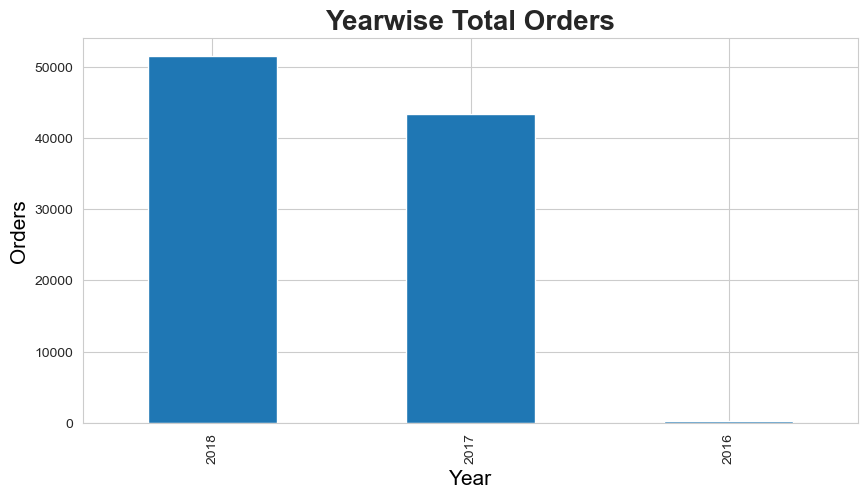

In [100]:
# Plotting yearwise total orders
plt.figure(figsize=(10, 5))  # Set the figure size

pd.to_datetime(orders.order_purchase_timestamp).dt.year.value_counts().plot(kind='bar')

plt.title('Yearwise Total Orders', fontweight='bold', fontsize=20)
plt.xlabel('Year', fontsize=15, color='black')
plt.ylabel('Orders', fontsize=15, color='black')
plt.show()


#### Observation:

- The year 2018 witnessed the highest number of orders being placed, as indicated by the bar chart.

##### Month-wise Revenue for Years 2016, 2017, and 2018

In [101]:
# Function to check if the delivery is late
def is_late_delivery(days):
    return 1 if days < 0 else 0

# Function to check if the delivery is on time
def is_ontime_delivery(days):
    return 1 if days > 0 else 0

In [102]:
year2016 = orders[orders.order_purchase_timestamp.dt.year == 2016].merge(order_items, on = 'order_id')
year2016['Month'] = year2016.order_purchase_timestamp.dt.month
year2016['isLateDelivery'] = year2016['delivered_estimated'].apply(is_late_delivery)
year2016['isOnTimeDelivery'] = year2016['delivered_estimated'].apply(is_ontime_delivery)

# Ensure 'purchased_approved' is not missing, or substitute it with another column if needed
revenue2016 = year2016.groupby('Month').agg({
    'order_id': 'nunique', 
    'price': 'sum', 
    'freight_value': 'sum',
     'purchased_approved' : 'mean',
    'carrier_delivered': 'mean', 
    'delivered_estimated': 'mean', 
    'purchased_delivered': 'mean', 
    'isLateDelivery': 'sum', 
    'isOnTimeDelivery': 'sum'
})

revenue2016['total_revenue'] = revenue2016.price + revenue2016.freight_value
revenue2016['lateDeliveryRate'] = revenue2016['isLateDelivery'] / (revenue2016['isLateDelivery'] + revenue2016['isOnTimeDelivery'])
revenue2016

order_id     price  freight_value  purchased_approved  \
Month                                                          
9             1    134.97           8.49            0.000000   
10          261  39738.17        6093.65        31555.386364   
12            1     10.90           8.72          890.000000   

       carrier_delivered  delivered_estimated  purchased_delivered  \
Month                                                                
9                1.00000           -37.000000            54.000000   
10               5.62013            35.798701            19.198052   
12               1.00000            21.000000             4.000000   

       isLateDelivery  isOnTimeDelivery  total_revenue  lateDeliveryRate  
Month                                                                     
9                   3                 0         143.46          1.000000  
10                  3               304       45831.82          0.009772  
12                  0                 1          19.62          0.000000

In [103]:
year2017 = orders[orders.order_purchase_timestamp.dt.year == 2017].merge(order_items, on = 'order_id')
year2017['Month'] = year2017.order_purchase_timestamp.dt.month
year2017['isLateDelivery'] = year2017['delivered_estimated'].apply(is_late_delivery)
year2017['isOnTimeDelivery'] = year2017['delivered_estimated'].apply(is_ontime_delivery)

# Ensure 'purchased_approved' is not missing, or substitute it with another column if needed
revenue2017 = year2017.groupby('Month').agg({
    'order_id': 'nunique', 
    'price': 'sum', 
    'freight_value': 'sum',
     'purchased_approved' : 'mean',
    'carrier_delivered': 'mean', 
    'delivered_estimated': 'mean', 
    'purchased_delivered': 'mean', 
    'isLateDelivery': 'sum', 
    'isOnTimeDelivery': 'sum'
})

revenue2017['total_revenue'] = revenue2017.price + revenue2017.freight_value
revenue2017['lateDeliveryRate'] = revenue2017['isLateDelivery'] / (revenue2017['isLateDelivery'] + revenue2017['isOnTimeDelivery'])
revenue2017.head(5)


order_id      price  freight_value  purchased_approved  \
Month                                                           
1           749  111609.71       15666.01        14288.871570   
2          1650  233716.91       36938.42        11139.714517   
3          2545  359109.85       55107.03         6177.327807   
4          2279  338839.16       49652.13        13151.595351   
5          3531  488010.45       77258.11        13569.175069   

       carrier_delivered  delivered_estimated  purchased_delivered  \
Month                                                                
1               8.701427            26.734358            12.072448   
2               9.002698            18.165677            12.634107   
3               9.364421            11.439724            12.427634   
4              10.679669            12.108747            14.328211   
5               7.937296            12.395535            10.899172   

       isLateDelivery  isOnTimeDelivery  total_revenue  lateDeliveryRate  
Month                                                                     
1                  26               885      127275.72          0.028540  
2                  62              1787      270655.33          0.033532  
3                 163              2717      414216.88          0.056597  
4                 191              2322      388491.29          0.076005  
5                 151              3810      565268.56          0.038122

In [104]:
year2018 = orders[orders.order_purchase_timestamp.dt.year == 2018].merge(order_items, on = 'order_id')
year2018['Month'] = year2018.order_purchase_timestamp.dt.month
year2018['isLateDelivery'] = year2018['delivered_estimated'].apply(is_late_delivery)
year2018['isOnTimeDelivery'] = year2018['delivered_estimated'].apply(is_ontime_delivery)

# Ensure 'purchased_approved' is not missing, or substitute it with another column if needed
revenue2018 = year2018.groupby('Month').agg({
    'order_id': 'nunique', 
    'price': 'sum', 
    'freight_value': 'sum',
     'purchased_approved' : 'mean',
    'carrier_delivered': 'mean', 
    'delivered_estimated': 'mean', 
    'purchased_delivered': 'mean', 
    'isLateDelivery': 'sum', 
    'isOnTimeDelivery': 'sum'
})

revenue2018['total_revenue'] = revenue2018.price + revenue2018.freight_value
revenue2018['lateDeliveryRate'] = revenue2018['isLateDelivery'] / (revenue2018['isLateDelivery'] + revenue2018['isOnTimeDelivery'])
revenue2018.head(5)


order_id      price  freight_value  purchased_approved  \
Month                                                           
1          7045  922192.60      152670.38        15841.367146   
2          6543  824207.87      139455.59        14366.830757   
3          7001  953311.25      167215.46        13605.120274   
4          6409  923081.83      150642.10        17088.306233   
5          6681  966547.76      149446.94        14948.900233   

       carrier_delivered  delivered_estimated  purchased_delivered  \
Month                                                                
1               9.854841            12.010618            13.656090   
2              12.700693             7.361940            16.481210   
3              12.128759             5.799750            15.604741   
4               8.035366            11.935772            11.014770   
5               8.282220            11.342262            10.878106   

       isLateDelivery  isOnTimeDelivery  total_revenue  lateDeliveryRate  
Month                                                                     
1                 525              7405     1074862.98          0.066204  
2                1183              6173      963663.46          0.160821  
3                1641              6190     1120526.71          0.209552  
4                 368              6948     1073723.93          0.050301  
5                 618              6980     1115994.70          0.081337

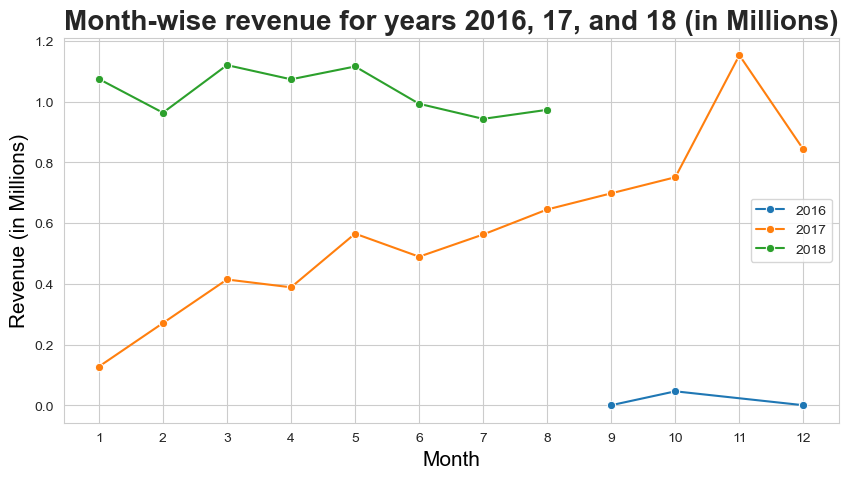

In [105]:
plt.figure(figsize=(10, 5))
sns.lineplot(y = revenue2016['total_revenue'] / 1e6, x = revenue2016.index, marker = 'o', label = '2016')
sns.lineplot(y = revenue2017['total_revenue'] / 1e6, x = revenue2017.index, marker = 'o', label = '2017')
sns.lineplot(y = revenue2018['total_revenue'] / 1e6, x = revenue2018.index, marker = 'o', label = '2018')
plt.title('Month-wise revenue for years 2016, 17, and 18 (in Millions)', fontweight='bold', fontsize=20)
plt.xlabel('Month', fontsize=15, color='black')
plt.ylabel('Revenue (in Millions)', fontsize=15, color='black')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.legend()
plt.show()


#### Observations:

1. **Data Coverage:**
   - There are limited records for the year **2016**, resulting in lower revenue for that year.
   - For this analysis, we focused on records from **2017** and the available data up to **August 2018**.

2. **Revenue Trends (2017):**
   - The revenue showed **consistent growth** throughout 2017.
   - It began at **127K Brazilian Real** in January 2017 and peaked at approximately **1.15M Brazilian Real** in **November 2017**.
   - A **significant dip** in revenue was observed in **December 2017**, dropping by around **310K Brazilian Real** compared to November.

3. **Revenue Trends (2018):**
   - In 2018, revenue remained **consistent** within the range of **966K to 1.13M Brazilian Real**.

4. **Correlation with Orders:**
   - The revenue trends align closely with the **number of orders placed**, indicating a strong dependency on order volume.

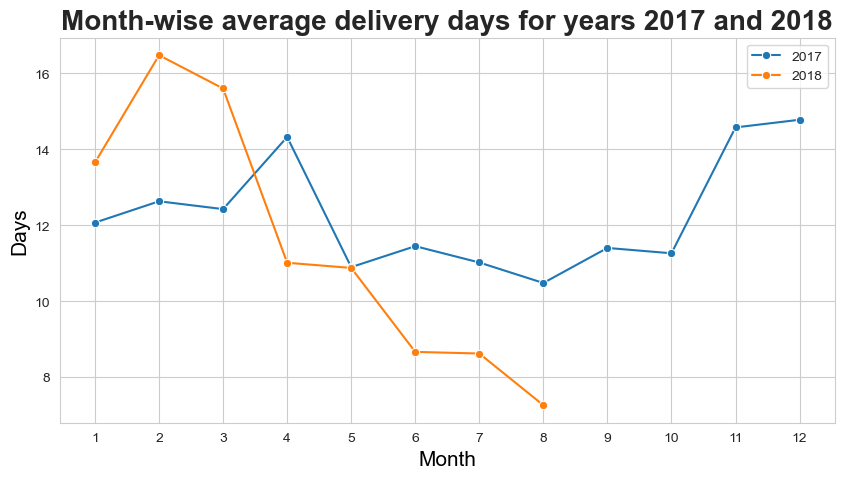

In [106]:
revenue2017_monthly = revenue2017.groupby('Month')['purchased_delivered'].mean()
revenue2018_monthly = revenue2018.groupby('Month')['purchased_delivered'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(y = revenue2017_monthly, x = revenue2017_monthly.index, marker = 'o', label = '2017')
sns.lineplot(y = revenue2018_monthly, x = revenue2018_monthly.index, marker = 'o', label = '2018')
plt.title('Month-wise average delivery days for years 2017 and 2018', fontweight='bold', fontsize=20)
plt.xlabel('Month', fontsize=15, color='black')
plt.ylabel('Days', fontsize=15, color='black')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.legend()
plt.show()

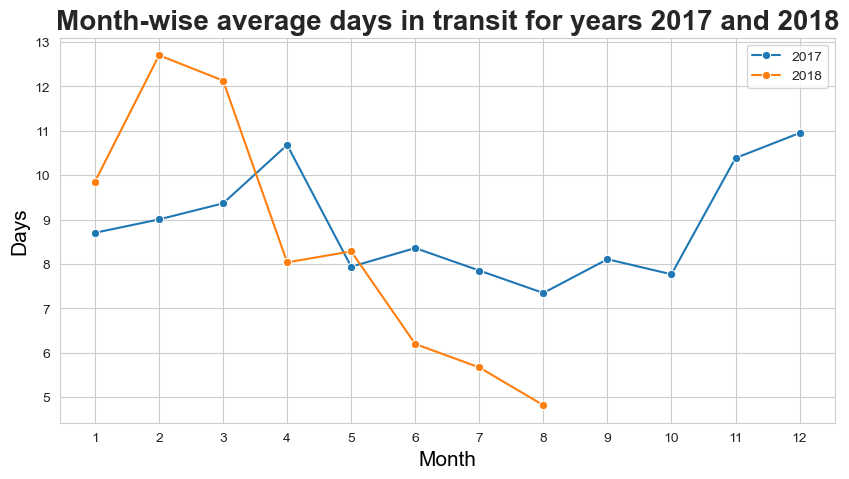

In [107]:
revenue2017_monthly = revenue2017.groupby('Month')['carrier_delivered'].mean()
revenue2018_monthly = revenue2018.groupby('Month')['carrier_delivered'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(y = revenue2017_monthly, x = revenue2017_monthly.index, marker = 'o', label = '2017')
sns.lineplot(y = revenue2018_monthly, x = revenue2018_monthly.index, marker = 'o', label = '2018')
plt.title('Month-wise average days in transit for years 2017 and 2018', fontweight='bold', fontsize=20)
plt.xlabel('Month', fontsize=15, color='black')
plt.ylabel('Days', fontsize=15, color='black')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.legend()
plt.show()


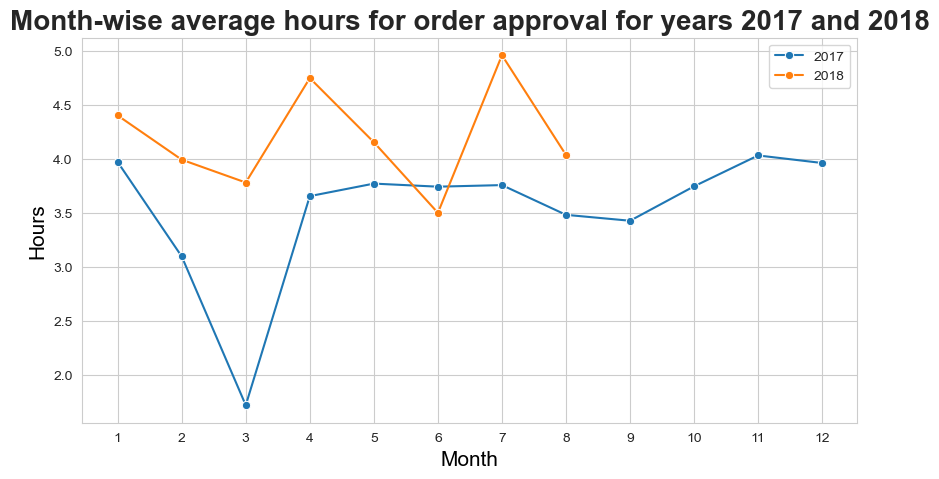

In [108]:
plt.figure(figsize=(10, 5))
sns.lineplot(y = revenue2017['purchased_approved'] / 3600, x = revenue2017.index, marker = 'o', label = '2017')
sns.lineplot(y = revenue2018['purchased_approved'] / 3600, x = revenue2018.index, marker = 'o', label = '2018')
plt.title('Month-wise average hours for order approval for years 2017 and 2018', fontweight='bold', fontsize=20)
plt.xlabel('Month', fontsize=15, color='black')
plt.ylabel('Hours', fontsize=15, color='black')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.legend()
plt.show()

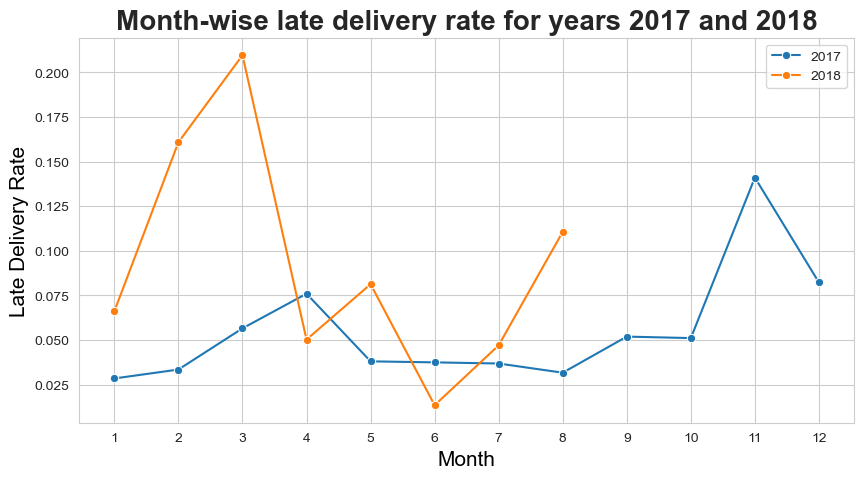

In [109]:
plt.figure(figsize=(10, 5))
sns.lineplot(y = revenue2017['lateDeliveryRate'], x = revenue2017.index, marker = 'o', label = '2017')
sns.lineplot(y = revenue2018['lateDeliveryRate'], x = revenue2018.index, marker = 'o', label = '2018')
plt.title('Month-wise late delivery rate for years 2017 and 2018', fontweight='bold', fontsize=20)
plt.xlabel('Month', fontsize=15, color='black')
plt.ylabel('Late Delivery Rate', fontsize=15, color='black')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.legend()
plt.show()


#### Observations:

1. **2016 Data Exclusion**:
   - The **2016** data is too sparse and insufficient for meaningful analysis, so it has been excluded.

2. **Revenue and Delivery Time Correlation**:
   - Revenue growth is positively correlated with **average delivery days** and **average transit days**. Faster deliveries have a clear, positive impact on revenue, showing that **timely delivery is essential** for business success.

3. **Delivery Delays During Peak Order Periods**:
   - Higher order volumes correlate with **increased average delivery times**, pointing to inefficiencies in handling peak demand. This indicates a need to improve logistics and delivery processes during busy periods.

4. **Impact of Order Approval Time**:
   - The **order approval time** has a negligible impact on business performance, suggesting it is not a critical area to optimize.

5. **Key Insight**:
   - **Optimizing delivery times** by enhancing logistics and reducing transit times is crucial to sustaining and increasing revenue.

---

#### Business Recommendations:

1. **Enhance Delivery Efficiency**:
   - Expand **cross-docking centers** to minimize first-mile delivery times.
   - Invest in **delivery partners** and improve **transit infrastructure** to better handle peak demand.

2. **Implement Product Traceability**:
   - Introduce **real-time tracking systems** to allow customers to monitor their orders, enhancing satisfaction and trust.

3. **Optimize Inventory Management**:
   - Streamline inventory processes to enable faster **order approvals** and quicker dispatch.

4. **Understand and Target Key Customer Segments**:
   - Focus on **customer needs and preferences** to increase satisfaction and build loyalty.

5. **Prepare for Peak Demand**:
   - Increase capacity to manage **high order volumes** efficiently, ensuring consistent delivery times even during peak periods.

## Black Friday (2017) Sale Analysis

In [110]:
# Filter data for the year 2017
year_2017 = orders[orders.order_purchase_timestamp.dt.year == 2017].merge(order_items, on='order_id')

# Filter data for November 2017
november_2017 = year_2017[year_2017.order_purchase_timestamp.dt.month == 11].copy()

# Extract the day of the month
november_2017['date'] = november_2017.order_purchase_timestamp.dt.day

# Display the first few rows
november_2017.head()


order_id                       customer_id  \
1   949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
10  85ce859fd6dc634de8d2f1e290444043  059f7fc5719c7da6cbafe370971a8d70   
17  6ea2f835b4556291ffdc53fa0b3b95e8  c7340080e394356141681bd4c9b8fe31   
26  68873cf91053cd11e6b49a766db5af1a  4632eb5a8f175f6fe020520ae0c678f3   
27  8f06cc6465925031568537b815f1198d  9916715c2ab6ee1710c9c32f0a534ad2   

   order_status order_purchase_timestamp   order_approved_at  \
1     delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
10    delivered      2017-11-21 00:03:41 2017-11-21 00:14:22   
17    delivered      2017-11-24 21:27:48 2017-11-25 00:21:09   
26    delivered      2017-11-30 22:02:15 2017-12-02 02:51:18   
27    delivered      2017-11-15 11:31:41 2017-11-15 11:46:42   

   order_delivered_carrier_date order_delivered_customer_date  \
1           2017-11-22 13:39:59           2017-12-02 00:28:42   
10          2017-11-23 21:32:26           2017-11-27 18:28:00   
17          2017-12-13 21:14:05           2017-12-28 18:59:23   
26          2017-12-04 22:07:01           2017-12-05 20:28:40   
27          2017-11-16 22:03:00           2017-11-22 22:41:07   

   order_estimated_delivery_date  purchased_approved  approved_carrier  \
1                     2017-12-15                1073                 3   
10                    2017-12-11                 641                 2   
17                    2017-12-21               10401                18   
26                    2017-12-18               17343                 2   
27                    2017-12-05                 901                 1   

    carrier_delivered  delivered_estimated  purchased_delivered  \
1                   9                   12                   13   
10                  3                   13                    6   
17                 14                   -8                   33   
26                  0                   12                    4   
27                  6                   12                    7   

    order_item_id                        product_id  \
1               1  d0b61bfb1de832b15ba9d266ca96e5b0   
10              1  cce679660c66e6fbd5c8091dfd29e9cd   
17              1  be021417a6acb56b9b50d3fd2714baa8   
26              1  15a9e834e89eab39d973492882c658d6   
27              1  12087840651e83b48206b82c213b76fd   

                           seller_id shipping_limit_date  price  \
1   66922902710d126a0e7d26b0e3805106 2017-11-23 19:45:59   45.0   
10  d2374cbcbb3ca4ab1086534108cc3ab7 2017-11-29 00:14:22   17.9   
17  f5f46307a4d15880ca14fab4ad9dfc9b 2017-11-30 00:21:09  339.0   
26  a673821011d0cec28146ea42f5ab767f 2017-12-07 02:51:18   79.9   
27  5b925e1d006e9476d738aa200751b73b 2017-11-21 11:46:42  299.0   

    freight_value  date  
1           27.20    18  
10          11.85    21  
17          17.12    24  
26          11.76    30  
27          18.34    15

In [111]:
# Filter data for Black Friday on November 24th, 2017
black_friday = november_2017[november_2017['date'] == 24]
black_friday.head()

order_id                       customer_id  \
17   6ea2f835b4556291ffdc53fa0b3b95e8  c7340080e394356141681bd4c9b8fe31   
59   b01875821b8dcb6abc61776f0f971bce  818596f5b68adfe2c11498ebb6d39e02   
60   b01875821b8dcb6abc61776f0f971bce  818596f5b68adfe2c11498ebb6d39e02   
115  c263211bd219538f7c031591e87ef0d7  ed8c52327eecff596e141636d5b556d2   
116  c263211bd219538f7c031591e87ef0d7  ed8c52327eecff596e141636d5b556d2   

    order_status order_purchase_timestamp   order_approved_at  \
17     delivered      2017-11-24 21:27:48 2017-11-25 00:21:09   
59     delivered      2017-11-24 21:55:22 2017-11-25 01:31:43   
60     delivered      2017-11-24 21:55:22 2017-11-25 01:31:43   
115    delivered      2017-11-24 16:56:46 2017-11-28 03:48:24   
116    delivered      2017-11-24 16:56:46 2017-11-28 03:48:24   

    order_delivered_carrier_date order_delivered_customer_date  \
17           2017-12-13 21:14:05           2017-12-28 18:59:23   
59           2017-11-28 22:37:15           2017-12-01 21:11:40   
60           2017-11-28 22:37:15           2017-12-01 21:11:40   
115          2017-12-08 23:28:26           2017-12-18 20:24:54   
116          2017-12-08 23:28:26           2017-12-18 20:24:54   

    order_estimated_delivery_date  purchased_approved  approved_carrier  \
17                     2017-12-21               10401                18   
59                     2017-12-15               12981                 3   
60                     2017-12-15               12981                 3   
115                    2017-12-19               39098                10   
116                    2017-12-19               39098                10   

     carrier_delivered  delivered_estimated  purchased_delivered  \
17                  14                   -8                   33   
59                   2                   13                    6   
60                   2                   13                    6   
115                  9                    0                   24   
116                  9                    0                   24   

     order_item_id                        product_id  \
17               1  be021417a6acb56b9b50d3fd2714baa8   
59               1  a6ad77b15e566298a4e8ee2011ab1255   
60               2  a6ad77b15e566298a4e8ee2011ab1255   
115              1  028b0b0277744a9eaa2c4f57c24dcb68   
116              2  028b0b0277744a9eaa2c4f57c24dcb68   

                            seller_id shipping_limit_date  price  \
17   f5f46307a4d15880ca14fab4ad9dfc9b 2017-11-30 00:21:09  339.0   
59   1025f0e2d44d7041d6cf58b6550e0bfa 2017-12-01 00:38:17   31.8   
60   1025f0e2d44d7041d6cf58b6550e0bfa 2017-12-01 00:38:17   31.8   
115  1025f0e2d44d7041d6cf58b6550e0bfa 2017-12-05 03:48:24  359.7   
116  1025f0e2d44d7041d6cf58b6550e0bfa 2017-12-05 03:48:24  359.7   

     freight_value  date  
17           17.12    24  
59           39.28    24  
60           39.28    24  
115          17.27    24  
116          17.27    24

In [112]:
# Calculate revenue for November 2017 grouped by date
revenue_november_2017 = november_2017.groupby('date').agg({
    'order_id': 'nunique',
    'price': 'sum',
    'freight_value': 'sum'
})

# Add a column for total revenue
revenue_november_2017['total_revenue'] = (
    revenue_november_2017['price'] + revenue_november_2017['freight_value']
)

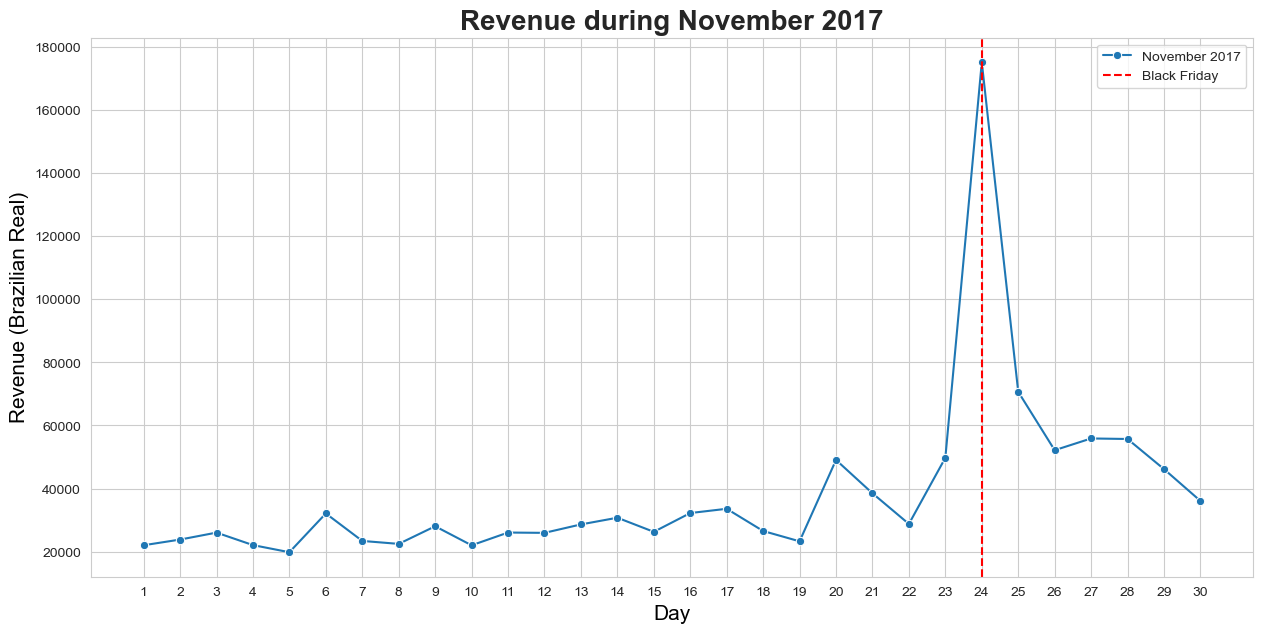

In [113]:
plt.figure(figsize=(15, 7))

# Plotting the total revenue for November 2017
sns.lineplot(
    y=revenue_november_2017['total_revenue'],
    x=revenue_november_2017.index,
    marker='o',
    label='November 2017'
)

# Adding title, annotations, and formatting
plt.title('Revenue during November 2017', fontweight='bold', fontsize=20)
plt.axvline(24, color='red', linestyle='--', label='Black Friday')
plt.annotate(
    revenue_november_2017.loc[24, 'total_revenue'],
    (21, revenue_november_2017.loc[24, 'total_revenue'] + 10000),
    fontsize=12
)
plt.xlabel('Day', fontsize=15, color='black')
plt.ylabel('Revenue (Brazilian Real)', fontsize=15, color='black')
plt.xticks(range(1, 31))
plt.legend()

plt.show()


#### Observations:
1. **Black Friday Sale Success**: The highest single-day orders of 1147 on November 24, 2017, resulted in a record revenue of 175K Brazilian Real.
2. **Revenue Growth Opportunity**: Future Black Friday sales offer a chance to further optimize marketing and operations, as well as benchmark against industry competitors.
3. **Seasonal Revenue Trends**: Revenue fluctuations in November and December reflect the Black Friday Sale and the holiday season.
4. **December Performance**: The revenue dip in December isn't due to operational problems, as the overall revenue for the month exceeded November's.

In [114]:
# Function to classify delivery as 'Late' or 'OnTime'
def deliveryType(date):
    return 'Late' if date < 0 else 'OnTime'

# Filter data for Black Friday (Nov 24, 2017)
blackFriday = november_2017[november_2017['date'] == 24].copy()

# Apply delivery type classification
blackFriday['Delivery'] = blackFriday['delivered_estimated'].apply(deliveryType)

# Count unique sellers who delivered late on Black Friday
late_deliveries = blackFriday[blackFriday['delivered_estimated'] < 0]
print('Number of sellers who delivered late during Black Friday: ', late_deliveries['seller_id'].nunique())


Number of sellers who delivered late during Black Friday:  114


In [115]:
# Average number of late delivering sellers over months, excluding Nov 24
average_late_sellers = november_2017[november_2017['delivered_estimated'] < 0].groupby('date')['seller_id'].nunique().drop(24).mean()
print('Average late delivering sellers: ', round(average_late_sellers))


Average late delivering sellers:  22


In [116]:
# Sellers who delivered late more than 5 times on Black Friday
late_sellers_blackFriday = late_deliveries['seller_id'].value_counts()
print("Sellers with more than 5 late deliveries on Black Friday:\n", late_sellers_blackFriday[late_sellers_blackFriday > 5])


Sellers with more than 5 late deliveries on Black Friday:
 8160255418d5aaa7dbdc9f4c64ebda44    22
1f50f920176fa81dab994f9023523100    18
1025f0e2d44d7041d6cf58b6550e0bfa    18
4a3ca9315b744ce9f8e9374361493884    12
54965bbe3e4f07ae045b90b0b8541f52    11
ea8482cd71df3c1969d7b9473ff13abc    10
Name: seller_id, dtype: int64


In [117]:
# Calculate averages for on-time and late deliveries
ontimeDelivery_bf = blackFriday[blackFriday['delivered_estimated'] > 0][['purchased_approved', 'approved_carrier', 'carrier_delivered', 'delivered_estimated', 'purchased_delivered']].mean()
lateDelivery_bf = blackFriday[blackFriday['delivered_estimated'] < 0][['purchased_approved', 'approved_carrier', 'carrier_delivered', 'delivered_estimated', 'purchased_delivered']].mean()

# Create a DataFrame to compare on-time vs late deliveries
comparision = pd.DataFrame([ontimeDelivery_bf, lateDelivery_bf]).T
comparision.rename(columns={0: 'on time delivery', 1: 'late delivery'}, inplace=True)

# Display the comparison DataFrame
comparision


on time delivery  late delivery
purchased_approved       15799.711174   18235.150000
approved_carrier             3.282197       7.869231
carrier_delivered            8.235795      23.346154
delivered_estimated          9.737689      -9.788462
purchased_delivered         12.554924      32.380769

#### Observations:

- **Volume vs. Delivery Performance**: As the number of orders increased, late deliveries also rose, indicating some sellers struggle to manage high order volumes.
- **Peak Sales Strategy**: Sellers with consistent late deliveries during peak sales should either be excluded from future events or incentivized to improve their performance.

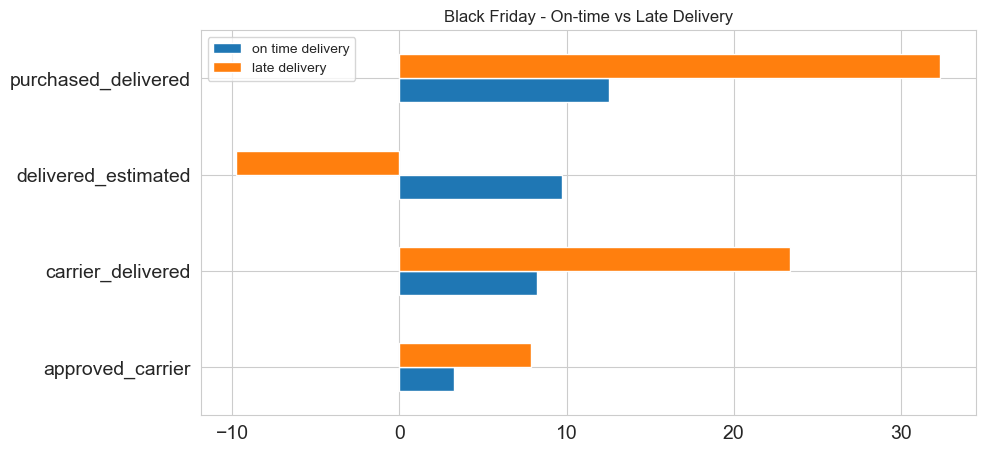

In [118]:
# Plot the comparison (excluding 'purchased_approved' for clarity)
comparision.drop('purchased_approved').plot(kind='barh', figsize=(10, 5), title='Black Friday - On-time vs Late Delivery', fontsize=14)

# Display the plot
plt.show()


In [119]:
blackFriday.Delivery.value_counts(normalize=True) * 100

OnTime    80.669145
Late      19.330855
Name: Delivery, dtype: float64

#### Observations:

- **Increased Volume Struggles**: On Black Friday, 19.33% of orders were delivered late, higher than the monthly average of 8.12%, indicating some sellers couldn't handle the surge.

#### Action Plan:

- **Improve Delivery Performance**: Offer support to struggling sellers, provide incentives, or exclude them from future peak sales events.
- **Boost Operational Capacity**: Ensure logistics can handle high volumes during sales.

#### Leveraging Customer Preferences:

- **Understand Preferences**: Analyze past data to identify popular items and tailor promotions.
- **Targeted Marketing**: Promote high-demand products during sales to maximize visibility and sales.


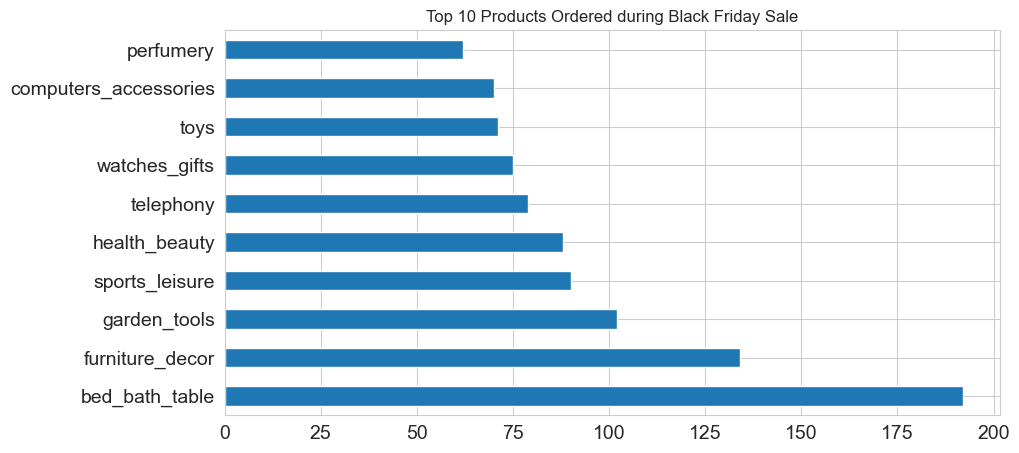

In [120]:
# Merge the necessary data
blackFridayProducts = blackFriday.merge(products[['product_id', 'product_category_name']], on='product_id')\
                                 .merge(product_category_translation, on='product_category_name')

# Plot the top 10 ordered product categories
blackFridayProducts['product_category_name_english'].value_counts().head(10).plot(kind='barh', figsize=(10, 5), title='Top 10 Products Ordered during Black Friday Sale', fontsize=14)
plt.show()

#### Observations:

- **Customer Preferences**: The bar plot shows the top products ordered during Black Friday, helping understand what customers want.
- **Regional Demands**: Tailor inventory and logistics based on regional preferences.
- **Market Trends**: Track trends to predict popular products for future sales.
- **Revenue Increase**: Focus on popular products like "Bed Bath Table" to boost sales on future sale days.

## Analysis on Late Deliveries

In [121]:
def is_late(days):
    if days < -10:
        return 'delayed by >10 days'
    elif -10 <= days < -5:
        return 'delayed by 6-10 days'
    elif -5 <= days < 0:
        return 'delayed by 1-5 days'
    return 'on_time'

In [122]:
late_delivery = orders[['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'delivered_estimated']].merge(order_reviews[['order_id', 'review_score']], on = 'order_id', how = 'left')
late_delivery['is_late'] = late_delivery['delivered_estimated'].apply(is_late)
late_delivery.head()

order_id order_purchase_timestamp  \
0  e481f51cbdc54678b7cc49136f2d6af7      2017-10-02 10:56:33   
1  53cdb2fc8bc7dce0b6741e2150273451      2018-07-24 20:41:37   
2  47770eb9100c2d0c44946d9cf07ec65d      2018-08-08 08:38:49   
3  949d5b44dbf5de918fe9c16f97b45f8a      2017-11-18 19:28:06   
4  ad21c59c0840e6cb83a9ceb5573f8159      2018-02-13 21:18:39   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-10-10 21:25:13                    2017-10-18   
1           2018-08-07 15:27:45                    2018-08-13   
2           2018-08-17 18:06:29                    2018-09-04   
3           2017-12-02 00:28:42                    2017-12-15   
4           2018-02-16 18:17:02                    2018-02-26   

   delivered_estimated  review_score  is_late  
0                    7           NaN  on_time  
1                    5           4.0  on_time  
2                   17           NaN  on_time  
3                   12           NaN  on_time  
4                    9           NaN  on_time

In [123]:
# Applying the `is_late` function
late_delivery['is_late'] = late_delivery['delivered_estimated'].apply(is_late)

In [124]:
# Value counts for late delivery categories
late_delivery_counts = late_delivery['is_late'].value_counts()
late_delivery_counts

on_time                 87320
delayed by 1-5 days      3596
delayed by >10 days      2294
delayed by 6-10 days     1904
Name: is_late, dtype: int64

In [125]:
# Normalized value counts (percentage)
late_delivery_percentage = late_delivery['is_late'].value_counts(normalize=True) * 100
late_delivery_percentage

on_time                 91.805623
delayed by 1-5 days      3.780726
delayed by >10 days      2.411843
delayed by 6-10 days     2.001808
Name: is_late, dtype: float64

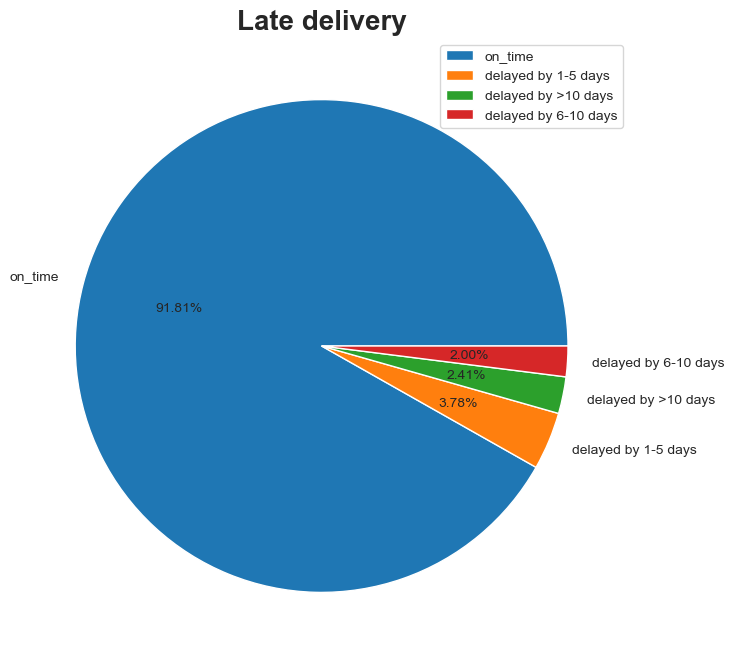

In [126]:
# Pie chart visualization
plt.figure(figsize = (10, 8))
plt.pie(late_delivery.is_late.value_counts(), autopct = '%0.2f%%', labels = late_delivery.is_late.value_counts().index)
plt.title('Late delivery',fontweight='bold',fontsize=20)
plt.legend()
plt.show()


### Observation
- 91.89% of orders were delivered on time, while 8.11% were late.


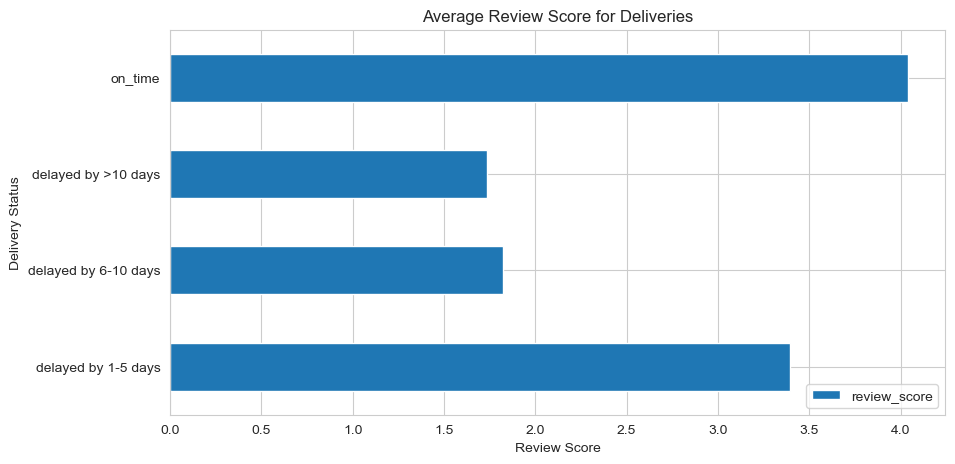

In [127]:
# Calculate the average review score for each delivery status
reviewScore_lateDelivery = late_delivery.groupby('is_late').agg({'review_score' : 'mean'})

# Plot the results
reviewScore_lateDelivery.plot(kind='barh', figsize=(10, 5), title='Average Review Score for Deliveries')
plt.xlabel('Review Score')
plt.ylabel('Delivery Status')
plt.show()


In [128]:
reviewScore_lateDelivery

review_score
is_late                           
delayed by 1-5 days       3.393782
delayed by 6-10 days      1.824645
delayed by >10 days       1.736559
on_time                   4.042449

## Golden Hours for Bussiness

In [129]:
def is_weekend(day_name):
    return 'weekend' if day_name in ['Saturday', 'Sunday'] else 'weekday'


In [130]:
# Merging orders and order items
orders_time_analysis = orders.merge(order_items, on='order_id')

# Extracting hour, day name, and calculating total revenue
orders_time_analysis['hour'] = orders_time_analysis['order_purchase_timestamp'].dt.hour
orders_time_analysis['day_name'] = orders_time_analysis['order_purchase_timestamp'].dt.day_name()
orders_time_analysis['is_weekend'] = orders_time_analysis['day_name'].apply(is_weekend)
orders_time_analysis['total_revenue'] = orders_time_analysis['price'] + orders_time_analysis['freight_value']

orders_time_analysis.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  purchased_approved  approved_carrier  ...  \
0                    2017-10-18                 642                 2  ...   
1                    2018-08-13               24170                 0  ...   
2                    2018-09-04                 994                 0  ...   
3                    2017-12-15                1073                 3  ...   
4                    2018-02-26                3710                 0  ...   

   order_item_id                        product_id  \
0              1  87285b34884572647811a353c7ac498a   
1              1  595fac2a385ac33a80bd5114aec74eb8   
2              1  aa4383b373c6aca5d8797843e5594415   
3              1  d0b61bfb1de832b15ba9d266ca96e5b0   
4              1  65266b2da20d04dbe00c5c2d3bb7859e   

                          seller_id  shipping_limit_date   price  \
0  3504c0cb71d7fa48d967e0e4c94d59d9  2017-10-06 11:07:15   29.99   
1  289cdb325fb7e7f891c38608bf9e0962  2018-07-30 03:24:27  118.70   
2  4869f7a5dfa277a7dca6462dcf3b52b2  2018-08-13 08:55:23  159.90   
3  66922902710d126a0e7d26b0e3805106  2017-11-23 19:45:59   45.00   
4  2c9e548be18521d1c43cde1c582c6de8  2018-02-19 20:31:37   19.90   

  freight_value hour   day_name  is_weekend  total_revenue  
0          8.72   10     Monday     weekday          38.71  
1         22.76   20    Tuesday     weekday         141.46  
2         19.22    8  Wednesday     weekday         179.12  
3         27.20   19   Saturday     weekend          72.20  
4          8.72   21    Tuesday     weekday          28.62  

[5 rows x 23 columns]

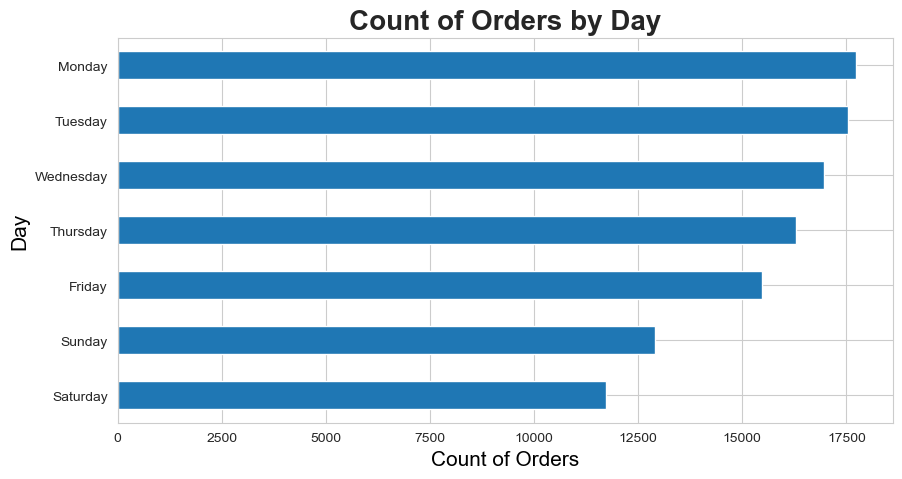

In [131]:
#Count of Orders by Day
orders_time_analysis.groupby('day_name')['order_id'].count().sort_values().plot(kind='barh', figsize=(10, 5))
plt.title('Count of Orders by Day', fontweight='bold', fontsize=20)
plt.xlabel('Count of Orders', fontsize=15, color='black')
plt.ylabel('Day', fontsize=15, color='black')
plt.show()


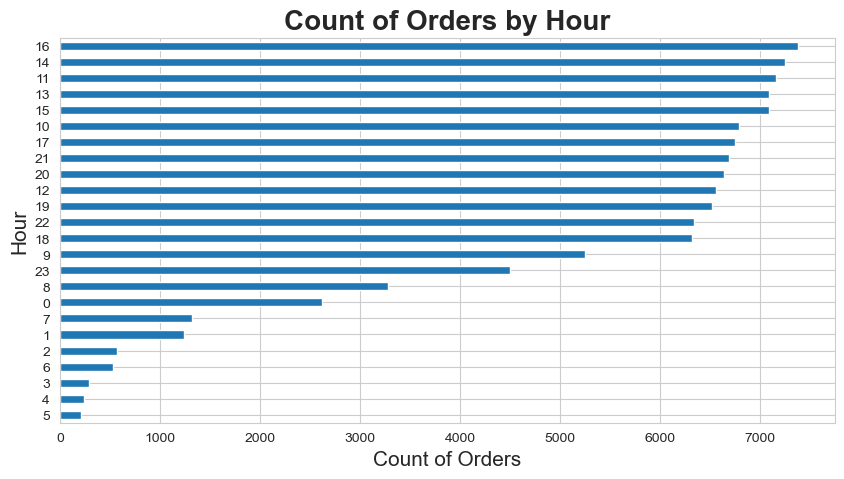

In [132]:
#Count of Orders by Hour
orders_time_analysis.groupby('hour')['order_id'].count().sort_values().plot(kind='barh', figsize=(10, 5))
plt.title('Count of Orders by Hour', fontsize=20, fontweight='bold')
plt.xlabel('Count of Orders', fontsize=15)
plt.ylabel('Hour', fontsize=15)
plt.show()

#### Observations:
1. **Weekdays** see higher order volumes, especially on **Monday and Tuesday**.  
2. Most orders are placed between **11 AM and 4 PM**.  
3. Targeting peak days and hours with offers can boost sales.

#### Recommendations:
1. **Increase Weekend Sales**: Use marketing campaigns to attract customers.  
2. **Peak Hour Offers**: Launch time-limited deals during busy hours.  
3. **Personalized Ads**: Promote products based on customer preferences.  
4. **Loyalty Rewards**: Reward loyal customers and improve support services.  

##  Merging the Individual Datasets¶

In [133]:
merged = (
    customers
    .merge(orders, on='customer_id')
    .merge(order_items, on='order_id')
    .merge(products, on='product_id')
    .merge(geolocationMean, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
    .merge(payments, on='order_id')
    .merge(sellers, on='seller_id')
    .merge(product_category_translation, on='product_category_name')
    .merge(order_reviews, on='order_id', how='left')
)

merged.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3  f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4  6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   

  customer_zip_code_prefix    customer_city customer_state  \
0                    14409           franca             SP   
1                    68030         santarem             PA   
2                    68030         santarem             PA   
3                    92480  nova santa rita             RS   
4                    25931             mage             RJ   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
2  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
3  b1a5d5365d330d10485e0203d54ab9e8    delivered      2017-05-07 20:11:26   
4  2e604b3614664aa66867856dba7e61b7    delivered      2018-02-03 19:45:40   

    order_approved_at order_delivered_carrier_date  ...      seller_city  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57  ...  itaquaquecetuba   
1 2017-11-10 00:47:48          2017-11-22 01:43:37  ...  itaquaquecetuba   
2 2017-11-10 00:47:48          2017-11-22 01:43:37  ...  itaquaquecetuba   
3 2017-05-08 22:22:56          2017-05-19 20:16:31  ...  itaquaquecetuba   
4 2018-02-04 22:29:19          2018-02-19 18:21:47  ...  itaquaquecetuba   

  seller_state  product_category_name_english  review_id  review_score  \
0           SP               office_furniture        NaN           NaN   
1           SP               office_furniture        NaN           NaN   
2           SP               office_furniture        NaN           NaN   
3           SP               office_furniture        NaN           NaN   
4           SP               office_furniture        NaN           NaN   

   review_comment_title  review_comment_message  review_creation_date  \
0                   NaN                     NaN                   NaT   
1                   NaN                     NaN                   NaT   
2                   NaN                     NaN                   NaT   
3                   NaN                     NaN                   NaT   
4                   NaN                     NaN                   NaT   

  review_answer_timestamp review_score_binary  
0                     NaT                 NaN  
1                     NaT                 NaN  
2                     NaT                 NaN  
3                     NaT                 NaN  
4                     NaT                 NaN  

[5 rows x 49 columns]

In [134]:
merged.shape

(111468, 49)

In [135]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111468 entries, 0 to 111467
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    111468 non-null  object        
 1   customer_unique_id             111468 non-null  object        
 2   customer_zip_code_prefix       111468 non-null  object        
 3   customer_city                  111468 non-null  object        
 4   customer_state                 111468 non-null  object        
 5   order_id                       111468 non-null  object        
 6   order_status                   111468 non-null  object        
 7   order_purchase_timestamp       111468 non-null  datetime64[ns]
 8   order_approved_at              111468 non-null  datetime64[ns]
 9   order_delivered_carrier_date   111468 non-null  datetime64[ns]
 10  order_delivered_customer_date  111468 non-null  datetime64[ns]
 11  

In [136]:
# Dropping unnecessary columns
columns_to_drop = [
    'order_status', 'order_item_id', 'order_approved_at', 'order_delivered_carrier_date', 
    'order_delivered_customer_date', 'order_estimated_delivery_date', 'approved_carrier', 
    'carrier_delivered', 'seller_id', 'shipping_limit_date', 'product_category_name', 
    'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 
    'geolocation_zip_code_prefix', 'payment_sequential', 'seller_zip_code_prefix', 
    'review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 
    'review_answer_timestamp', 'seller_city', 'seller_state'
]

merged.drop(columns=columns_to_drop, inplace=True)

# Displaying the first few rows
merged.head()


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3  f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4  6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   

  customer_zip_code_prefix    customer_city customer_state  \
0                    14409           franca             SP   
1                    68030         santarem             PA   
2                    68030         santarem             PA   
3                    92480  nova santa rita             RS   
4                    25931             mage             RJ   

                           order_id order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35   
1  c1d2b34febe9cd269e378117d6681172      2017-11-09 00:50:13   
2  c1d2b34febe9cd269e378117d6681172      2017-11-09 00:50:13   
3  b1a5d5365d330d10485e0203d54ab9e8      2017-05-07 20:11:26   
4  2e604b3614664aa66867856dba7e61b7      2018-02-03 19:45:40   

   purchased_approved  delivered_estimated  purchased_delivered  ...  \
0                 997                   10                    8  ...   
1               86255                   20                   18  ...   
2               86255                   20                   18  ...   
3                7890                   16                   18  ...   
4                9819                   21                   25  ...   

  product_height_cm  product_width_cm  geolocation_lat  geolocation_lng  \
0              64.0              31.0       -20.468849       -47.382173   
1              64.0              31.0        -2.430314       -54.693217   
2              64.0              31.0        -2.430314       -54.693217   
3              64.0              31.0       -29.826454       -51.245676   
4              64.0              31.0       -22.604835       -43.026500   

   payment_type  payment_installments  payment_value  \
0   credit_card                     2         146.87   
1   credit_card                     1         275.79   
2   credit_card                     1         275.79   
3   credit_card                     7         140.61   
4   credit_card                    10         137.58   

   product_category_name_english  review_score review_score_binary  
0               office_furniture           NaN                 NaN  
1               office_furniture           NaN                 NaN  
2               office_furniture           NaN                 NaN  
3               office_furniture           NaN                 NaN  
4               office_furniture           NaN                 NaN  

[5 rows x 25 columns]

## Creating a Grouped-by Dataframe based on Individual Customers

In [137]:
# Grouping the merged DataFrame by customer_unique_id and aggregating relevant fields
final = merged.groupby('customer_unique_id', as_index=False).agg({
    'customer_zip_code_prefix': 'max',
    'customer_city': 'max',
    'customer_state': 'max',
    'order_id': 'nunique',
    'purchased_approved': 'mean',
    'delivered_estimated': 'min',
    'purchased_delivered': 'mean',
    'product_id': 'nunique',
    'price': 'sum',
    'freight_value': 'sum',
    'product_weight_g': 'sum',
    'product_length_cm': 'sum',
    'product_height_cm': 'sum',
    'product_width_cm': 'sum',
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean',
    'payment_type': 'max',
    'payment_installments': 'max',
    'payment_value': 'sum',
    'review_score': 'mean'
})

# Displaying the first few rows of the grouped DataFrame
final.head()


customer_unique_id  customer_zip_code_prefix customer_city  \
0  0000366f3b9a7992bf8c76cfdf3221e2                      7787       cajamar   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                      6053        osasco   
2  0000f46a3911fa3c0805444483337064                     88115      sao jose   
3  0000f6ccb0745a6a4b88665a16c9f078                     66812         belem   
4  0004aac84e0df4da2b147fca70cf8255                     18040      sorocaba   

  customer_state  order_id  purchased_approved  delivered_estimated  \
0             SP         1               891.0                    4   
1             SP         1             26057.0                    4   
2             SC         1                 0.0                    1   
3             PA         1              1176.0                   11   
4             SP         1              1270.0                    7   

   purchased_delivered  product_id   price  ...  product_weight_g  \
0                  6.0           1  129.90  ...            1500.0   
1                  3.0           1   18.90  ...             375.0   
2                 25.0           1   69.00  ...            1500.0   
3                 20.0           1   25.99  ...             150.0   
4                 13.0           1  180.00  ...            6050.0   

   product_length_cm  product_height_cm  product_width_cm  geolocation_lat  \
0               34.0                7.0              32.0       -23.333580   
1               26.0               11.0              18.0       -23.545029   
2               25.0               50.0              35.0       -27.532246   
3               19.0                5.0              11.0        -1.304189   
4               16.0                3.0              11.0       -23.496567   

   geolocation_lng  payment_type payment_installments  payment_value  \
0       -46.823060   credit_card                    8         141.90   
1       -46.781482   credit_card                    1          27.19   
2       -48.618667   credit_card                    8          86.22   
3       -48.476339   credit_card                    4          43.62   
4       -47.462811   credit_card                    6         196.89   

   review_score  
0           5.0  
1           NaN  
2           NaN  
3           NaN  
4           NaN  

[5 rows x 21 columns]

In [138]:
# Renaming columns for clarity
final.rename(columns={
    'order_id': 'no_of_orders',
    'product_id': 'no_of_products'
}, inplace=True)

# Displaying the first few rows after renaming
final.head()


customer_unique_id  customer_zip_code_prefix customer_city  \
0  0000366f3b9a7992bf8c76cfdf3221e2                      7787       cajamar   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                      6053        osasco   
2  0000f46a3911fa3c0805444483337064                     88115      sao jose   
3  0000f6ccb0745a6a4b88665a16c9f078                     66812         belem   
4  0004aac84e0df4da2b147fca70cf8255                     18040      sorocaba   

  customer_state  no_of_orders  purchased_approved  delivered_estimated  \
0             SP             1               891.0                    4   
1             SP             1             26057.0                    4   
2             SC             1                 0.0                    1   
3             PA             1              1176.0                   11   
4             SP             1              1270.0                    7   

   purchased_delivered  no_of_products   price  ...  product_weight_g  \
0                  6.0               1  129.90  ...            1500.0   
1                  3.0               1   18.90  ...             375.0   
2                 25.0               1   69.00  ...            1500.0   
3                 20.0               1   25.99  ...             150.0   
4                 13.0               1  180.00  ...            6050.0   

   product_length_cm  product_height_cm  product_width_cm  geolocation_lat  \
0               34.0                7.0              32.0       -23.333580   
1               26.0               11.0              18.0       -23.545029   
2               25.0               50.0              35.0       -27.532246   
3               19.0                5.0              11.0        -1.304189   
4               16.0                3.0              11.0       -23.496567   

   geolocation_lng  payment_type payment_installments  payment_value  \
0       -46.823060   credit_card                    8         141.90   
1       -46.781482   credit_card                    1          27.19   
2       -48.618667   credit_card                    8          86.22   
3       -48.476339   credit_card                    4          43.62   
4       -47.462811   credit_card                    6         196.89   

   review_score  
0           5.0  
1           NaN  
2           NaN  
3           NaN  
4           NaN  

[5 rows x 21 columns]

In [139]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90528 entries, 0 to 90527
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_unique_id        90528 non-null  object 
 1   customer_zip_code_prefix  90528 non-null  int64  
 2   customer_city             90528 non-null  object 
 3   customer_state            90528 non-null  object 
 4   no_of_orders              90528 non-null  int64  
 5   purchased_approved        90528 non-null  float64
 6   delivered_estimated       90528 non-null  int64  
 7   purchased_delivered       90528 non-null  float64
 8   no_of_products            90528 non-null  int64  
 9   price                     90528 non-null  float64
 10  freight_value             90528 non-null  float64
 11  product_weight_g          90528 non-null  float64
 12  product_length_cm         90528 non-null  float64
 13  product_height_cm         90528 non-null  float64
 14  produc

In [140]:
# Convert the 'customer_zip_code_prefix' column to 'object' data type
final['customer_zip_code_prefix'] = final['customer_zip_code_prefix'].astype('object')

In [141]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90528 entries, 0 to 90527
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_unique_id        90528 non-null  object 
 1   customer_zip_code_prefix  90528 non-null  object 
 2   customer_city             90528 non-null  object 
 3   customer_state            90528 non-null  object 
 4   no_of_orders              90528 non-null  int64  
 5   purchased_approved        90528 non-null  float64
 6   delivered_estimated       90528 non-null  int64  
 7   purchased_delivered       90528 non-null  float64
 8   no_of_products            90528 non-null  int64  
 9   price                     90528 non-null  float64
 10  freight_value             90528 non-null  float64
 11  product_weight_g          90528 non-null  float64
 12  product_length_cm         90528 non-null  float64
 13  product_height_cm         90528 non-null  float64
 14  produc

In [142]:
# Save the grouped-by dataframe (final) to a CSV file
final.to_csv('final.csv', index=False)  # The `index=False` ensures that the index column is not saved in the CSV file.

## RMF Analysis

### RFM Analysis Overview

**RFM Analysis** is a valuable tool in customer segmentation and behavior analysis. Here's a breakdown:

- **Recency (R):** Measures the time since a customer's last purchase.  
   - A shorter time period indicates a more engaged customer.  

- **Frequency (F):** Counts the total number of purchases a customer has made.  
   - Frequent purchases suggest loyalty or a high level of interest in the brand.  

- **Monetary Value (M):** Sums up the total amount spent by a customer.  
   - Higher spending customers are more valuable to the business.  

### Why Use RFM Analysis?
1. **Customer Segmentation:** Identifies loyal, at-risk, and high-value customers.  
2. **Targeted Marketing:** Helps design personalized offers to increase engagement.  
3. **Churn Prediction:** Detects customers at risk of leaving.  
4. **Resource Allocation:** Focuses marketing efforts on the most profitable customer groups.  

### Recency (R)

In [143]:
# Group by customer_unique_id and find the most recent purchase date
recency = merged.groupby('customer_unique_id', as_index=False)['order_purchase_timestamp'].max()

# Rename the column for clarity
recency.rename(columns={'order_purchase_timestamp': 'LastPurchaseDate'}, inplace=True)

# Display the first few rows of the recency dataframe
recency.head()

customer_unique_id    LastPurchaseDate
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42

In [144]:
recent_date = merged['order_purchase_timestamp'].dt.date.max()
print('The last recent date in the available dataset is: ', recent_date)

The last recent date in the available dataset is:  2018-08-29


In [145]:
# Calculate the recency value (days since last purchase)
recency['Recency'] = recency['LastPurchaseDate'].dt.date.apply(lambda x: (recent_date - x).days)

# Display the first few rows
recency.head()

customer_unique_id    LastPurchaseDate  Recency
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27      111
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27      114
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03      537
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41      321
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42      288

### Observations:

1. **Last Purchase Date:**  
   - The most recent order date for each customer is calculated using the `groupby` function.

2. **Recency Calculation:**  
   - Recency is determined by subtracting each customer’s last purchase date from the most recent date in the dataset to find out how many days ago the customer made their last purchase.

### Frequency (F)

In [146]:
# Group by customer and count the number of unique orders (frequency)
frequency = merged.groupby('customer_unique_id')['order_id'].nunique().reset_index()

# Rename the column to 'Frequency'
frequency.rename(columns={'order_id': 'Frequency'}, inplace=True)

# Display the first few rows
frequency.head()


customer_unique_id  Frequency
0  0000366f3b9a7992bf8c76cfdf3221e2          1
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1
2  0000f46a3911fa3c0805444483337064          1
3  0000f6ccb0745a6a4b88665a16c9f078          1
4  0004aac84e0df4da2b147fca70cf8255          1

### Observation:

**Frequency** is calculated by counting the number of unique orders (`order_id`) placed by each customer.

### Monetary Value (M)

In [147]:
# Summing the payment_value for each customer to calculate their total spend
monetary = merged.groupby('customer_unique_id', as_index=False)['payment_value'].sum()

# Renaming the 'payment_value' column to 'Monetary' for clarity
monetary.rename(columns={'payment_value': 'Monetary'}, inplace=True)

# Display the first few rows of the monetary dataframe
monetary.head()

customer_unique_id  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f     27.19
2  0000f46a3911fa3c0805444483337064     86.22
3  0000f6ccb0745a6a4b88665a16c9f078     43.62
4  0004aac84e0df4da2b147fca70cf8255    196.89

In [148]:
# Merging recency with frequency on 'customer_unique_id'
rfm = recency.merge(frequency, on='customer_unique_id')

# Merging the resulting dataframe with monetary on 'customer_unique_id'
rfm = rfm.merge(monetary, on='customer_unique_id')

# Dropping the 'LastPurchaseDate' column, as it's no longer needed
rfm = rfm.drop(columns='LastPurchaseDate')

# Displaying the first few rows of the RFM dataframe
rfm.head()


customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19
2  0000f46a3911fa3c0805444483337064      537          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89

### Observation:
Monetary is calculated by summing the total payment value for each customer, based on all their orders.

In [149]:
# Filter Customers with Recency of 0
rfm[rfm.Recency == 0]

customer_unique_id  Recency  Frequency  Monetary
1463   0421e7a23f21e5d54efed456aedbc513        0          1    119.42
4454   0c6d7218d5f3fa14514fd29865269993        0          1    178.25
12062  21dbe8eabd00b34492a939c540e2b1a7        0          1     14.29
13032  24ac2b4327e25baf39f2119e4228976a        0          1     93.75
32785  5c58de6fb80e93396e2f35642666b693        0          1   1021.92
43195  7a22d14aa3c3599238509ddca4b93b01        0          1     73.10
45280  7febafa06d9d8f232a900a2937f04338        0          1     61.29
62249  afbcfd0b9c5233e7ccc73428526fbb52        0          1   2486.25
64024  b4dcade04bc548b7e3b0243c801f8c26        0          1    106.95
64767  b701bebbdf478f5500348f03aff62121        0          1     33.23
87738  f80013faf776e37bcea7634d59c2181e        0          1     74.21

In [150]:
#Replace Recency Value of 0 with 1
rfm['Recency'] = rfm.Recency.apply(lambda x: 1 if x == 0 else x)

### Observations:
- The **Recency** column had values of 0, indicating customers who made their last purchase on the most recent day in the dataset.
- These values were replaced with 1 to ensure consistent treatment for further analysis, such as creating the **Churn** target variable and for scaling/normalization.

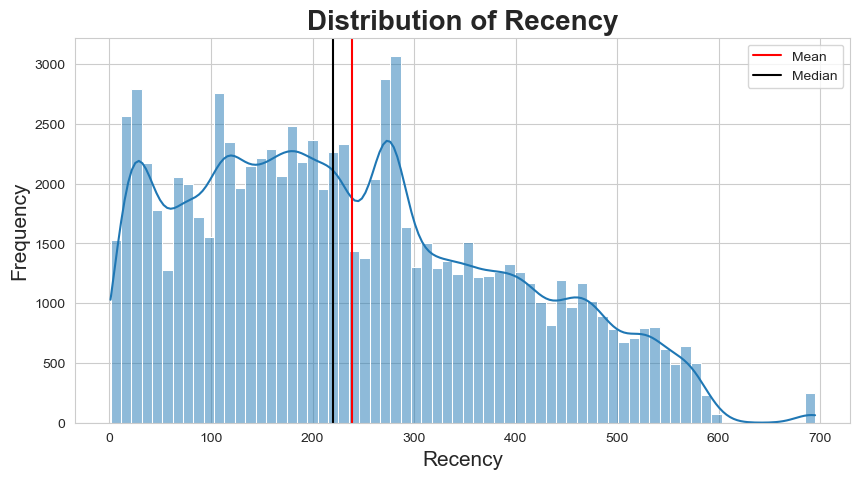

Mean of Recency: 238.73377297631671
Median of Recency: 220.0
Skewness of Recency: 0.43585883202493925


In [151]:
# Plotting the distribution of Recency
plt.figure(figsize=(10, 5))
sns.histplot(rfm.Recency, kde=True)  # Histogram with a KDE (Kernel Density Estimation) curve
plt.axvline(rfm.Recency.mean(), color='red', label='Mean')  # Line for mean
plt.axvline(rfm.Recency.median(), color='black', label='Median')  # Line for median
plt.title('Distribution of Recency', fontweight='bold', fontsize=20)
plt.xlabel('Recency', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend()  # Display legend
plt.show()

# Printing statistical information about Recency
print(f"Mean of Recency: {rfm.Recency.mean()}")
print(f"Median of Recency: {rfm.Recency.median()}")
print(f"Skewness of Recency: {rfm.Recency.skew()}")


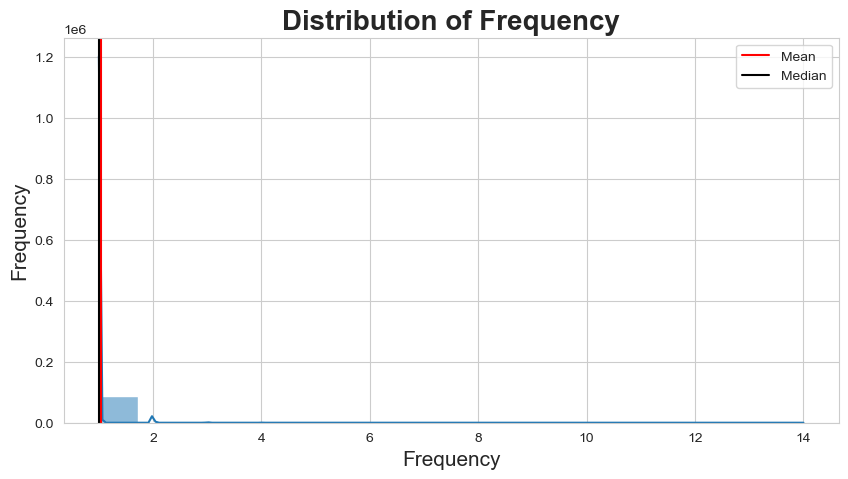

Mean of Frequency: 1.0328958996111701
Median of Frequency: 1.0
Skewness of Frequency: 10.676600298052568


In [152]:
# Plotting the distribution of Frequency
plt.figure(figsize=(10, 5))
sns.histplot(rfm.Frequency, kde=True)  # Histogram with a KDE (Kernel Density Estimation) curve
plt.axvline(rfm.Frequency.mean(), color='red', label='Mean')  # Line for mean
plt.axvline(rfm.Frequency.median(), color='black', label='Median')  # Line for median
plt.title('Distribution of Frequency', fontweight='bold', fontsize=20)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend()  # Display legend
plt.show()

# Printing statistical information about Frequency
print(f"Mean of Frequency: {rfm.Frequency.mean()}")
print(f"Median of Frequency: {rfm.Frequency.median()}")
print(f"Skewness of Frequency: {rfm.Frequency.skew()}")


In [153]:
# Calculate the IQR (Interquartile Range) for Frequency
Q1 = np.quantile(rfm.Frequency, 0.25)  # First quartile
Q3 = np.quantile(rfm.Frequency, 0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Filter out outliers using the IQR method
frequencyDistribution = rfm[~((rfm.Frequency < Q1 - 1.5 * IQR) | (rfm.Frequency > Q3 + 1.5 * IQR))]

# Display the filtered data
frequencyDistribution.head()


customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19
2  0000f46a3911fa3c0805444483337064      537          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89

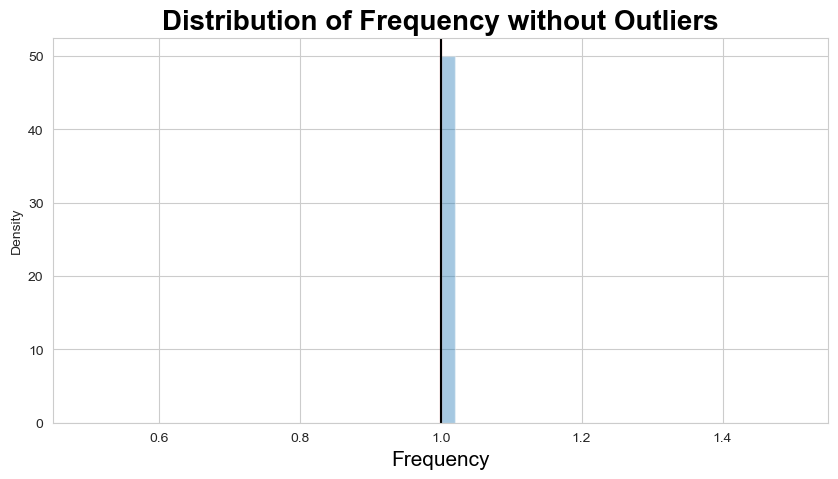

In [154]:
# Plotting the distribution of Frequency without outliers
plt.figure(figsize=(10, 5))

# Creating a distribution plot for the Frequency column without outliers
sns.distplot(frequencyDistribution.Frequency)

# Adding lines for mean and median of the Frequency distribution
plt.axvline(frequencyDistribution.Frequency.mean(), c='red', label='Mean')
plt.axvline(frequencyDistribution.Frequency.median(), c='black', label='Median')

# Labeling the x-axis and title
plt.xlabel('Frequency', color='black', fontsize=15)
plt.title('Distribution of Frequency without Outliers', color='black', fontsize=20, fontweight='bold')

# Display the plot
plt.show()


In [155]:
# Get summary statistics for the 'Frequency' column without outliers
frequencyDistribution.Frequency.describe()

count    87850.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Frequency, dtype: float64

### Observations:

- The frequency column in the RFM analysis, after removing outliers, has a **standard deviation of 0**, indicating that all the values are the same (i.e., 1).
- As a result, **frequency won't be useful for customer segmentation or analysis** since it does not vary across customers.

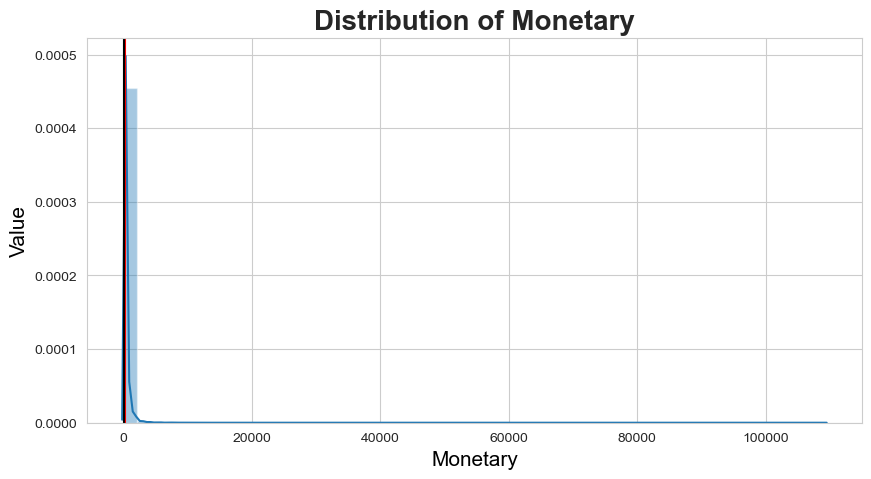

Mean of monetary:  212.23630898727467
Median of monetary:  112.83
Skewness of monetary:  70.4949829190865


In [156]:
# Plotting the distribution of the 'Monetary' column
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Monetary)  # Plotting the distribution
plt.axvline(rfm.Monetary.mean(), c = 'red')  # Marking the mean with a red line
plt.axvline(rfm.Monetary.median(), c = 'black')  # Marking the median with a black line
plt.title('Distribution of Monetary', fontweight='bold', fontsize=20)  # Title
plt.xlabel('Monetary', fontsize=15, color='black')  # X-axis label
plt.ylabel('Value', fontsize=15, color='black')  # Y-axis label
plt.show()

# Printing the key statistics
print('Mean of monetary: ', rfm.Monetary.mean())
print('Median of monetary: ', rfm.Monetary.median())
print('Skewness of monetary: ', rfm.Monetary.skew())


In [157]:
# Calculating the IQR for the 'Monetary' column
Q1 = np.quantile(rfm.Monetary, 0.25)  # First quartile (25th percentile)
Q3 = np.quantile(rfm.Monetary, 0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range (Q3 - Q1)

# Removing outliers using the IQR method (1.5 * IQR rule)
monetaryDistribution = rfm[~((rfm.Monetary < Q1 - 1.5 * IQR) | (rfm.Monetary > Q3 + 1.5 * IQR))]

# Display the first few rows of the filtered data
monetaryDistribution.head()


customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19
2  0000f46a3911fa3c0805444483337064      537          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89

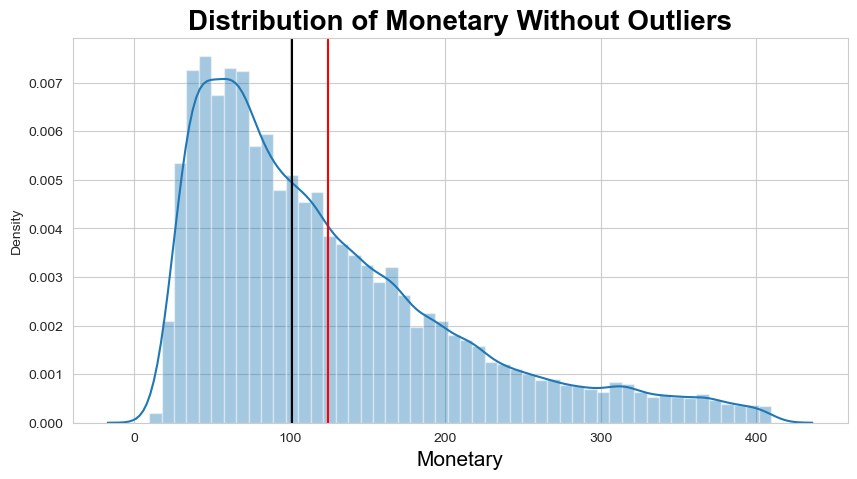

In [158]:
# Plotting the distribution of 'Monetary' without outliers
plt.figure(figsize=(10, 5))  # Set the figure size
sns.distplot(monetaryDistribution.Monetary)  # Plot the distribution of monetary data without outliers

# Add vertical lines for mean (red) and median (black)
plt.axvline(monetaryDistribution.Monetary.mean(), c='red', label='Mean')
plt.axvline(monetaryDistribution.Monetary.median(), c='black', label='Median')

# Adding labels and title
plt.xlabel('Monetary', color='black', fontsize=15)
plt.title('Distribution of Monetary Without Outliers', color='black', fontsize=20, fontweight='bold')

# Display the plot
plt.show()


In [159]:
monetaryDistribution.Monetary.describe()

count    81643.000000
mean       124.744198
std         85.108001
min          9.590000
25%         60.000000
50%        101.220000
75%        166.710000
max        409.610000
Name: Monetary, dtype: float64

## Customer Segmentation

### Labels for Recency

In [160]:
# Calculate the quartiles for the Recency variable
ll_r = rfm.Recency.quantile(0.25)  # 25th percentile (lower quartile)
mid_r = rfm.Recency.quantile(0.50)  # 50th percentile (median)
ul_r = rfm.Recency.quantile(0.75)  # 75th percentile (upper quartile)

# Print the results
print(ll_r, mid_r, ul_r)


115.0 220.0 347.0


In [161]:
def recency_label(recent):
    if recent <= ll_r:
        return 1
    elif (recent > ll_r) and (recent <= mid_r):
        return 2
    elif (recent > mid_r) and (recent <= ul_r):
        return 3
    elif recent > ul_r:
        return 4


In [162]:
rfm['recency_label'] = rfm.Recency.apply(recency_label)
rfm.head()

customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19   
2  0000f46a3911fa3c0805444483337064      537          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89   

   recency_label  
0              1  
1              1  
2              4  
3              3  
4              3

### Recency Label Breakdown:

1. **Label 1**: 
   - **Description**: Customers whose visit dates are the most recent.
   - **Recency Value**: Within the 25% quantile (i.e., their last purchase was very recent).
   
2. **Label 2**: 
   - **Description**: Customers whose visit dates are not very recent.
   - **Recency Value**: Between the 25% and 50% quantile (i.e., their last purchase was moderately recent).

3. **Label 3**: 
   - **Description**: Customers whose visit dates are somewhat recent.
   - **Recency Value**: Between the 50% and 75% quantile (i.e., their last purchase was somewhat recent).

4. **Label 4**: 
   - **Description**: Customers whose visit dates are the oldest.
   - **Recency Value**: More than the 75% quantile (i.e., their last purchase was the oldest among the customers).

This breakdown helps in categorizing customers based on how recent their last purchase was, which can be used to target them differently in marketing or retention strategies.

###  Labels for Monetary

In [163]:
# Calculate the quantiles for Monetary values
ll_m = rfm['Monetary'].quantile(0.25)
mid_m = rfm['Monetary'].quantile(0.50)
ul_m = rfm['Monetary'].quantile(0.75)

ll_m, mid_m, ul_m


(63.79, 112.83, 202.1225)

In [164]:
# Function to label monetary values based on quartiles
def monetary_label(money):
    if money <= ll_m:          # Lowest quartile
        return 4
    elif money <= mid_m:       # Second quartile
        return 3
    elif money <= ul_m:        # Third quartile
        return 2
    else:                      # Top quartile
        return 1


In [165]:
# Apply monetary_label function to Monetary column
rfm['monetary_label'] = rfm.Monetary.apply(monetary_label)

# Display the first few rows of the updated DataFrame
rfm.head()


customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19   
2  0000f46a3911fa3c0805444483337064      537          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89   

   recency_label  monetary_label  
0              1               2  
1              1               4  
2              4               3  
3              3               4  
4              3               2

### Monetary Label Breakdown:
1. **Label 1**: Customers who spend the largest amounts. *(Monetary value within the top 25% quantile).*
2. **Label 2**: Customers who spend a good amount. *(Monetary value between the 50% and 75% quantiles).*
3. **Label 3**: Customers who spend moderately. *(Monetary value between the 25% and 50% quantiles).*
4. **Label 4**: Customers who spend the least. *(Monetary value below the 25% quantile).*

###  Labels for Frequency¶

In [166]:
# Count the frequency of each value in the Frequency column
rfm.Frequency.value_counts()

1     87850
2      2462
3       171
4        28
5         9
6         3
7         3
9         1
14        1
Name: Frequency, dtype: int64

In [167]:
# Define a function to label frequency
def frequency_label(frequent):
    if frequent == 1:
        return 4
    elif frequent == 2:
        return 3
    elif frequent == 3:
        return 2
    elif frequent > 3:
        return 1

In [168]:
rfm['frequency_label'] = rfm.Frequency.apply(frequency_label)
rfm.head()

customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19   
2  0000f46a3911fa3c0805444483337064      537          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89   

   recency_label  monetary_label  frequency_label  
0              1               2                4  
1              1               4                4  
2              4               3                4  
3              3               4                4  
4              3               2                4

### Frequency Label Breakdown:

- **Label 1**: Customers who are the most frequent, with a frequency greater than 3.
- **Label 2**: Customers who are frequent, with a frequency equal to 3.
- **Label 3**: Customers who are somewhat frequent, with a frequency equal to 2.
- **Label 4**: Customers who are the least frequent, with a frequency equal to 1.

In [169]:
# Combine recency, monetary, and frequency labels into a single 'Rank' column
rfm['Rank'] = list(zip(rfm.recency_label, rfm.monetary_label, rfm.frequency_label))

# Display the first few rows of the updated RFM dataframe
rfm.head()


customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19   
2  0000f46a3911fa3c0805444483337064      537          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89   

   recency_label  monetary_label  frequency_label       Rank  
0              1               2                4  (1, 2, 4)  
1              1               4                4  (1, 4, 4)  
2              4               3                4  (4, 3, 4)  
3              3               4                4  (3, 4, 4)  
4              3               2                4  (3, 2, 4)

In [170]:
rfm.recency_label.value_counts()

1    22754
4    22595
3    22594
2    22585
Name: recency_label, dtype: int64

In [171]:
rfm.frequency_label.value_counts()

4    87850
3     2462
2      171
1       45
Name: frequency_label, dtype: int64

In [172]:
rfm.monetary_label.value_counts()

4    22637
1    22632
2    22630
3    22629
Name: monetary_label, dtype: int64

### Observation:

- The majority of the customers fall into frequency class 4, indicating they are the least frequent customers.
This lack of variation in frequency makes it less useful for meaningful segmentation.
Decision:

- To create more insightful customer segments, we will focus only on recency and monetary attributes for segmentation.

In [173]:
# Combine recency_label and monetary_label into a new column 'rank_rm'
rfm['rank_rm'] = list(zip(rfm.recency_label, rfm.monetary_label))

# Display the updated DataFrame with the new 'rank_rm' column
rfm.head()


customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19   
2  0000f46a3911fa3c0805444483337064      537          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89   

   recency_label  monetary_label  frequency_label       Rank rank_rm  
0              1               2                4  (1, 2, 4)  (1, 2)  
1              1               4                4  (1, 4, 4)  (1, 4)  
2              4               3                4  (4, 3, 4)  (4, 3)  
3              3               4                4  (3, 4, 4)  (3, 4)  
4              3               2                4  (3, 2, 4)  (3, 2)

In [174]:
rfm.rank_rm.value_counts()

(1, 2)    5867
(3, 3)    5837
(4, 3)    5835
(1, 1)    5793
(2, 4)    5745
(4, 4)    5723
(2, 2)    5701
(3, 1)    5664
(2, 1)    5644
(1, 4)    5632
(3, 2)    5556
(3, 4)    5537
(4, 1)    5531
(4, 2)    5506
(2, 3)    5495
(1, 3)    5462
Name: rank_rm, dtype: int64

###  Meaning of Ranks

#### The most important and least important customers (Recency Rank, Monetary Rank):
- Comparing Recency and Monetary - Recency rank is of higher importance than Monetary rank

##### Most Important Customers:
- **(Recency - 1, Monetary - 1)**: Very recent and have spent a lot of money.
- **(Recency - 1, Monetary - 2)**: Very recent and have spent a good amount of money.
- **(Recency - 2, Monetary - 1)**: Recent and have spent a lot of money.
- **(Recency - 2, Monetary - 2)**: Recent and have spent a good amount of money.
- **(Recency - 1, Monetary - 3)**: Very recent and have spent a decent amount of money.

##### Least Important Customers:
- **(Recency - 4, Monetary - 4)**: Not at all recent and spent a negligible amount of money.
- **(Recency - 4, Monetary - 3)**: Not at all recent and spent a decent amount of money.
- **(Recency - 4, Monetary - 2)**: Not at all recent and spent a good amount of money.
- **(Recency - 3, Monetary - 4)**: Not very recent and spent a negligible amount of money.
- **(Recency - 3, Monetary - 3)**: Not very recent and spent a decent amount of money.

### Business Insights from RM analysis

#### Insights from Recency Ranks:
- **Incentivizing Purchases**: Offer discounts, events, or promotions to increase recency, encouraging customers to purchase more frequently and spend more.
- **User Experience**: Improve website usability and speed to ensure smooth shopping experiences, encouraging customers to return and shop again.
- **Targeted Digital Marketing**: 
  - **Low Recency**: Customers with low recency should be targeted less in advertising, as they are less likely to convert to sales.
  - **High Recency**: Customers with high recency should be targeted more, as they are more likely to make purchases and generate sales.

#### Insights from Monetary Ranks:
- **Increase Monetary Value**: Enhance recommendation algorithms to suggest similar or useful items to customers when they add an item to their cart, potentially increasing their spending.

#### Insights from Frequency Ranks:
- **Low Purchase Frequency**: 97% of customers have the lowest frequency rank, indicating they make infrequent purchases. To combat this:
  - Use **local language** on the platform to appeal to a wider audience.
  - Offer **special deals for repeated purchases**.
  - Introduce **loyalty programs** to encourage regular customers.
  - **Lower product pricing** to incentivize more frequent purchases.

## Creating a Target Variable

In [175]:
# Create a 'Churn' column based on recency values
rfm['Churn'] = rfm.Recency.apply(lambda x: 1 if x > rfm.Recency.mean() else 0)
  # If recency value is greater than the mean, set churn as 1 (indicating less likely to churn)
  # If recency <= mean, set churn as 0 (indicating more likely to churn)
rfm.head()

customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19   
2  0000f46a3911fa3c0805444483337064      537          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89   

   recency_label  monetary_label  frequency_label       Rank rank_rm  Churn  
0              1               2                4  (1, 2, 4)  (1, 2)      0  
1              1               4                4  (1, 4, 4)  (1, 4)      0  
2              4               3                4  (4, 3, 4)  (4, 3)      1  
3              3               4                4  (3, 4, 4)  (3, 4)      1  
4              3               2                4  (3, 2, 4)  (3, 2)      1

### Observations:
- **Churn Rate**: Refers to the rate at which customers stop doing business with the company.
- **Target Variable (Churn)**: Created using the recency column, with customers who have a recency value above the mean considered as churned (1), and the rest as not churned (0).
- **Threshold for Churn**: The mean of the recency column is used as the threshold for classifying churn, as recency is normally distributed.
- **Next Step**: The target variable (Churn) will be added to the main dataframe and further classification algorithms will be applied to predict customer churn.

## Merging the Target Variable with our Final Dataframe

In [176]:
# Merge 'Churn' and other relevant columns with the final dataframe
final = final.merge(rfm[['customer_unique_id', 'Recency', 'Monetary', 'Frequency', 'Churn']], 
                    on='customer_unique_id')  # Merging on customer ID

final.head()


customer_unique_id customer_zip_code_prefix customer_city  \
0  0000366f3b9a7992bf8c76cfdf3221e2                     7787       cajamar   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                     6053        osasco   
2  0000f46a3911fa3c0805444483337064                    88115      sao jose   
3  0000f6ccb0745a6a4b88665a16c9f078                    66812         belem   
4  0004aac84e0df4da2b147fca70cf8255                    18040      sorocaba   

  customer_state  no_of_orders  purchased_approved  delivered_estimated  \
0             SP             1               891.0                    4   
1             SP             1             26057.0                    4   
2             SC             1                 0.0                    1   
3             PA             1              1176.0                   11   
4             SP             1              1270.0                    7   

   purchased_delivered  no_of_products   price  ...  geolocation_lat  \
0                  6.0               1  129.90  ...       -23.333580   
1                  3.0               1   18.90  ...       -23.545029   
2                 25.0               1   69.00  ...       -27.532246   
3                 20.0               1   25.99  ...        -1.304189   
4                 13.0               1  180.00  ...       -23.496567   

   geolocation_lng  payment_type  payment_installments  payment_value  \
0       -46.823060   credit_card                     8         141.90   
1       -46.781482   credit_card                     1          27.19   
2       -48.618667   credit_card                     8          86.22   
3       -48.476339   credit_card                     4          43.62   
4       -47.462811   credit_card                     6         196.89   

   review_score  Recency Monetary  Frequency  Churn  
0           5.0      111   141.90          1      0  
1           NaN      114    27.19          1      0  
2           NaN      537    86.22          1      1  
3           NaN      321    43.62          1      1  
4           NaN      288   196.89          1      1  

[5 rows x 25 columns]

In [177]:
# Get the shape of the final dataframe: number of records and features
records, features = final.shape  

print('Total number of unique records: ', records)  
print('Total number of features: ', features)


Total number of unique records:  90528
Total number of features:  25


In [178]:
# Convert the 'Churn' column to the 'object' data type
final['Churn'] = final.Churn.astype('object')
# Ensures 'Churn' is treated as categorical for classification

## Outlier Treatement

Skewness of no_of_orders: 10.676600298052568
Standard deviation of no_of_orders: 0.20649360862515379


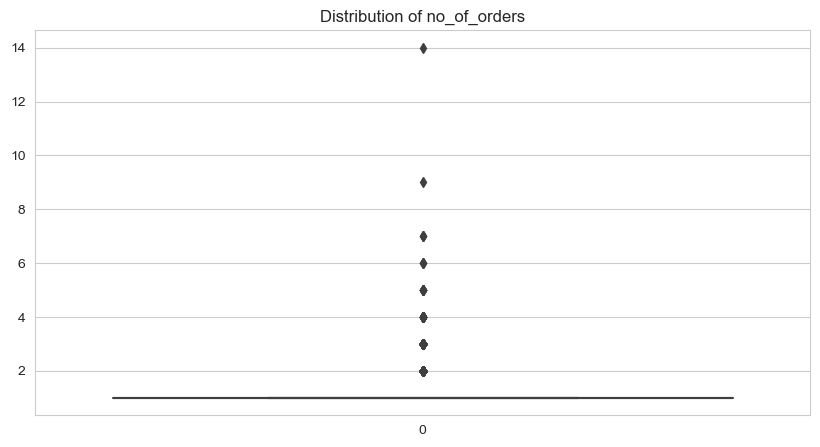

Skewness of purchased_approved: 1.6936517976235201
Standard deviation of purchased_approved: 23397.78777997723


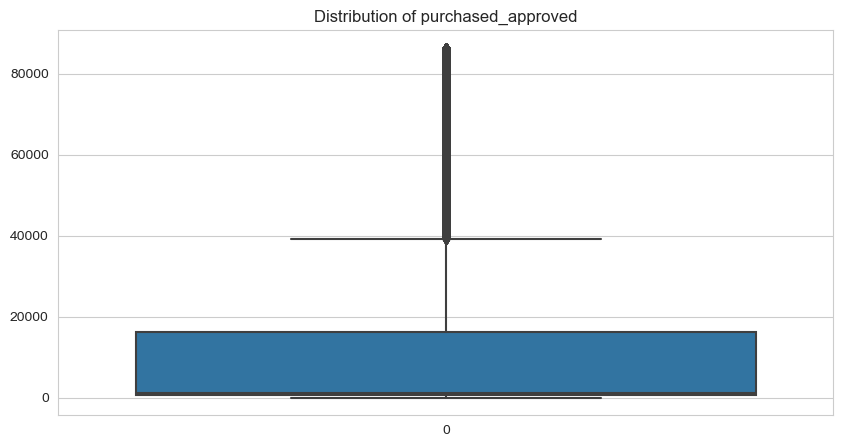

Skewness of delivered_estimated: -2.101764866389134
Standard deviation of delivered_estimated: 10.203242967047574


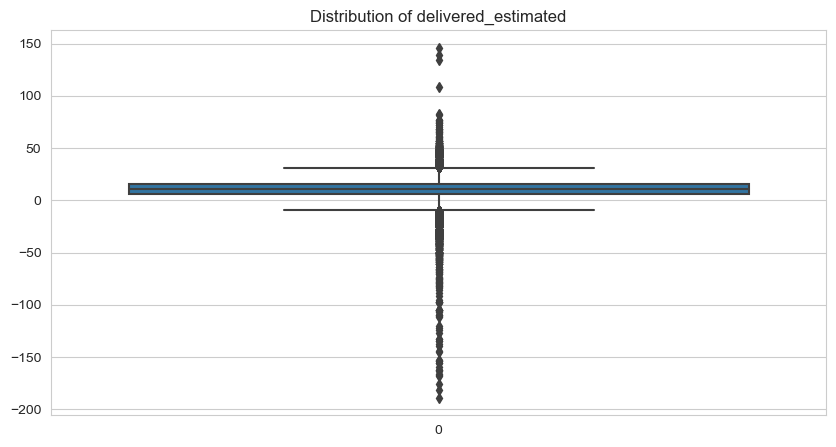

Skewness of purchased_delivered: 3.885615578737388
Standard deviation of purchased_delivered: 9.567765067053164


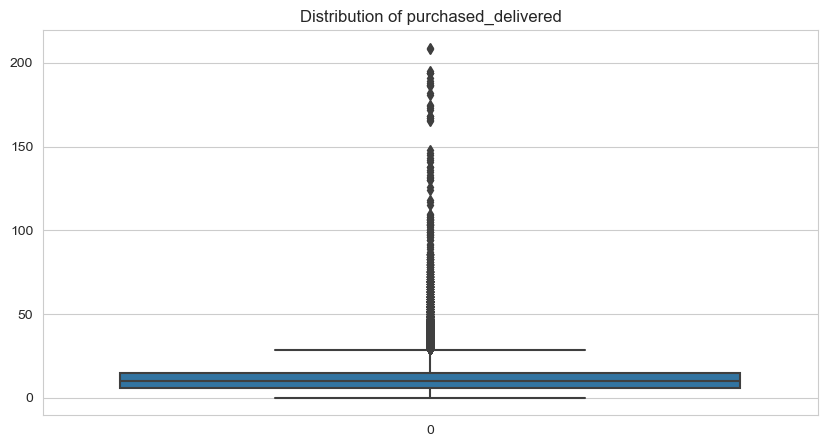

Skewness of no_of_products: 7.414378109080429
Standard deviation of no_of_products: 0.31373679944656546


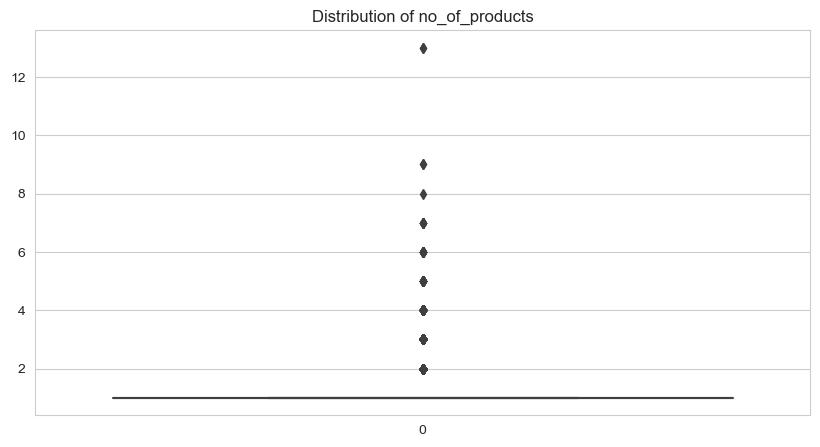

Skewness of price: 11.791837108894033
Standard deviation of price: 244.2877497694806


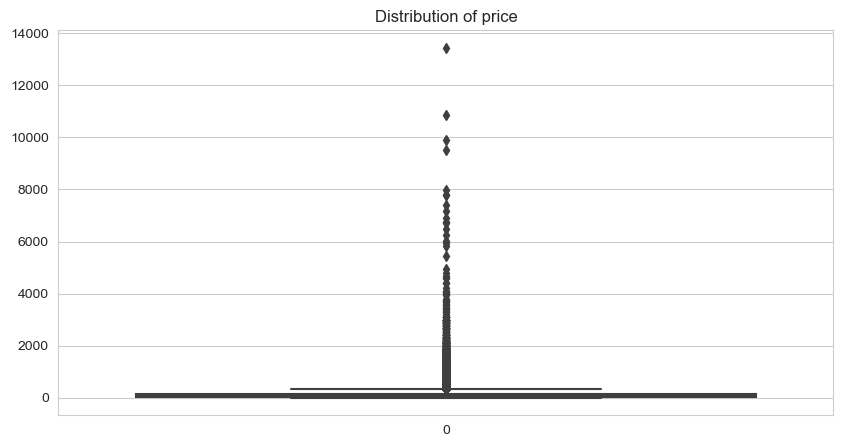

Skewness of freight_value: 13.696046608723156
Standard deviation of freight_value: 26.890560470727753


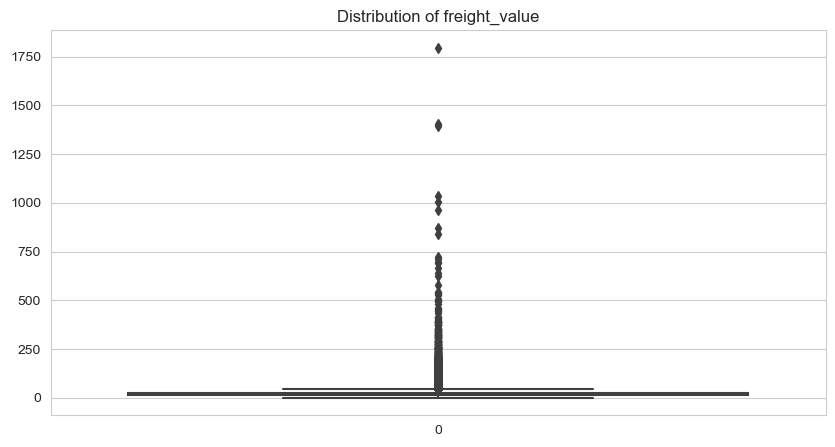

Skewness of product_weight_g: 12.131479466882134
Standard deviation of product_weight_g: 5812.31317595522


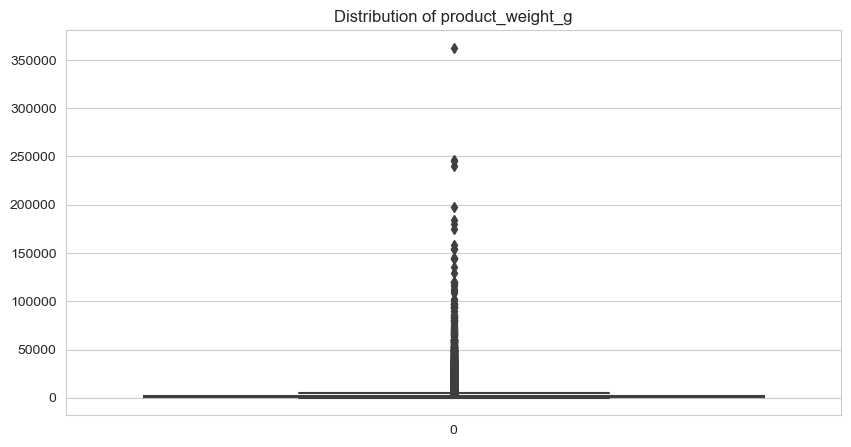

Skewness of product_length_cm: 16.000317045845396
Standard deviation of product_length_cm: 35.43155752809726


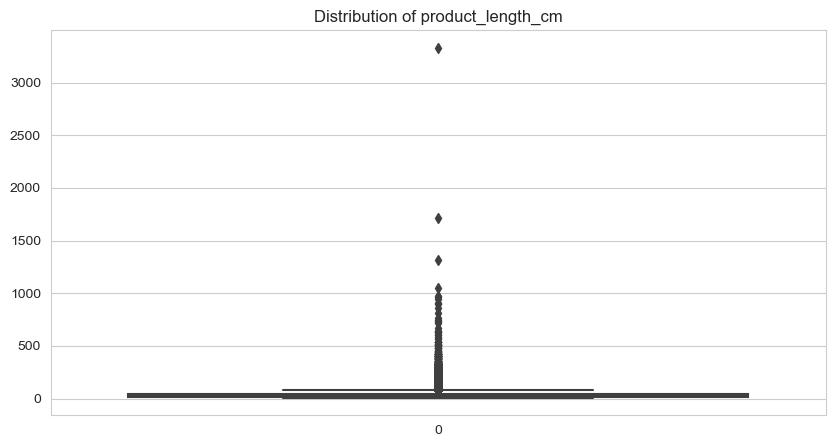

Skewness of product_height_cm: 14.445872079638715
Standard deviation of product_height_cm: 25.187955183905892


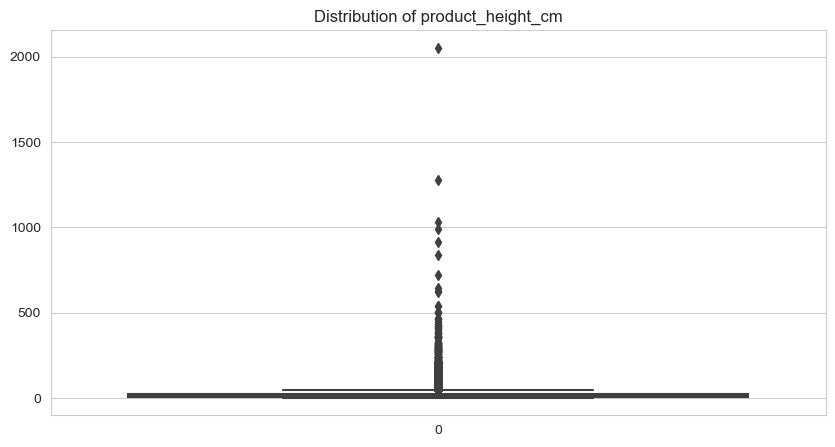

Skewness of product_width_cm: 16.47431670120788
Standard deviation of product_width_cm: 26.235366771942363


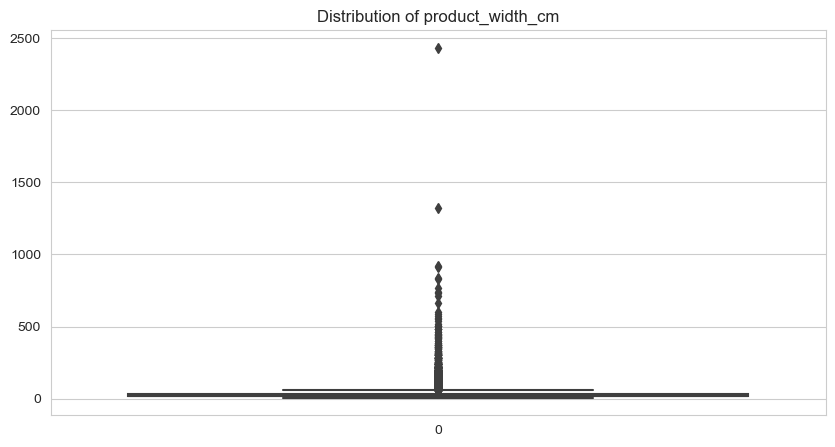

Skewness of geolocation_lat: 1.7731522011144614
Standard deviation of geolocation_lat: 5.683911480427566


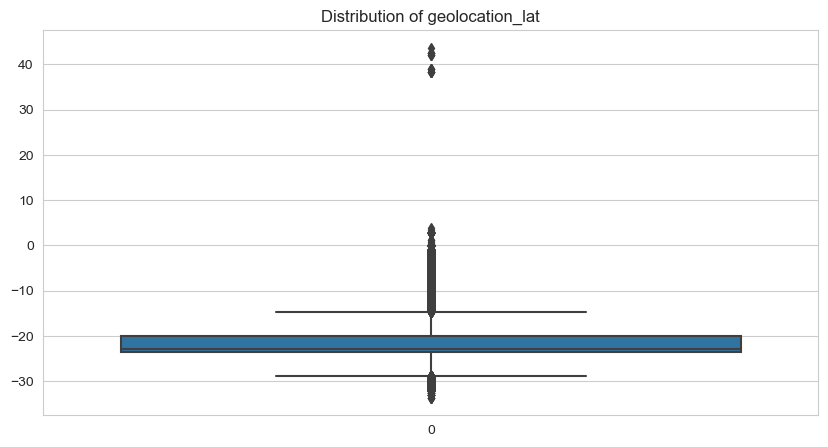

Skewness of geolocation_lng: 0.18920688857939136
Standard deviation of geolocation_lng: 4.095579090984395


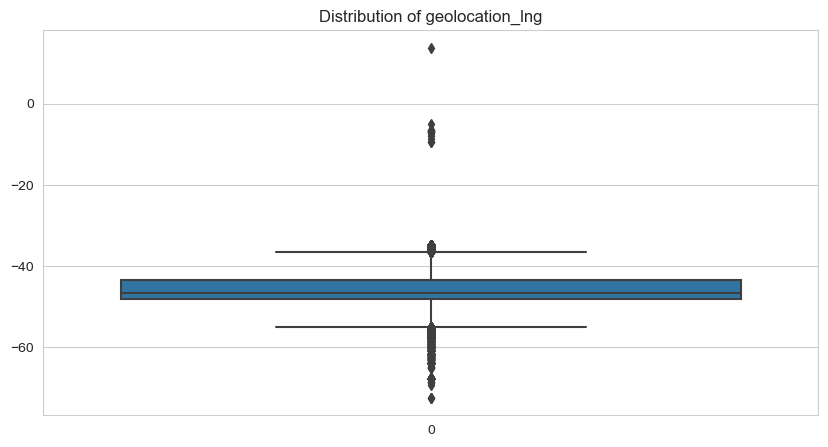

Skewness of payment_installments: 1.5985424567820286
Standard deviation of payment_installments: 2.7284629737523685


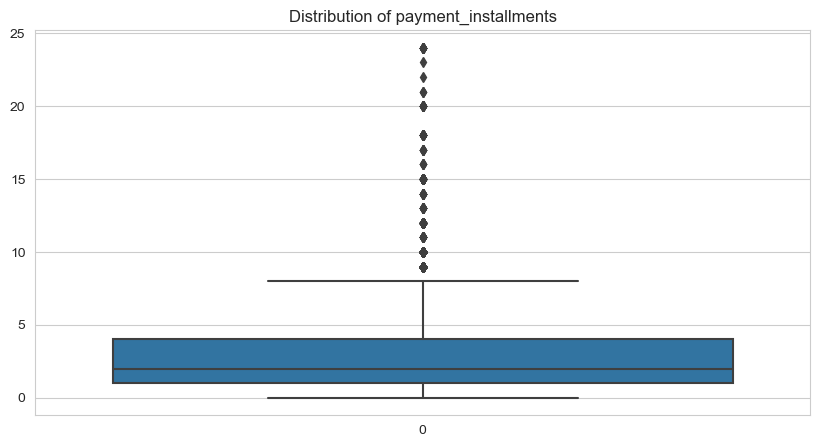

Skewness of payment_value: 70.4949829190865
Standard deviation of payment_value: 647.5936527572555


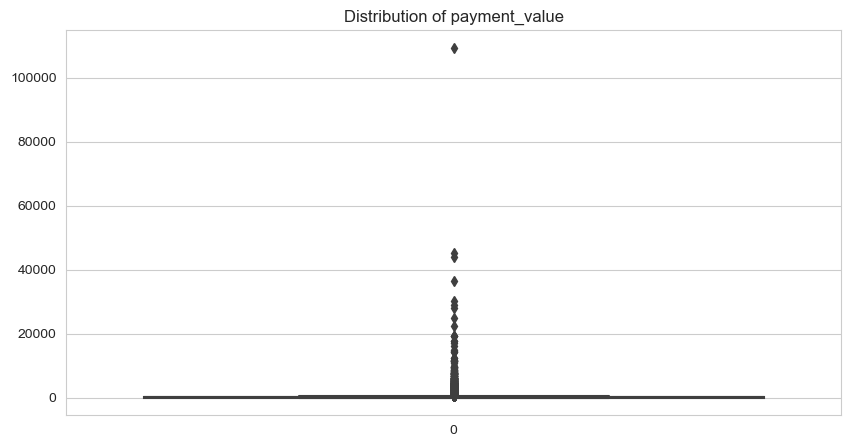

Skewness of review_score: -1.0689366055733671
Standard deviation of review_score: 1.50818532419873


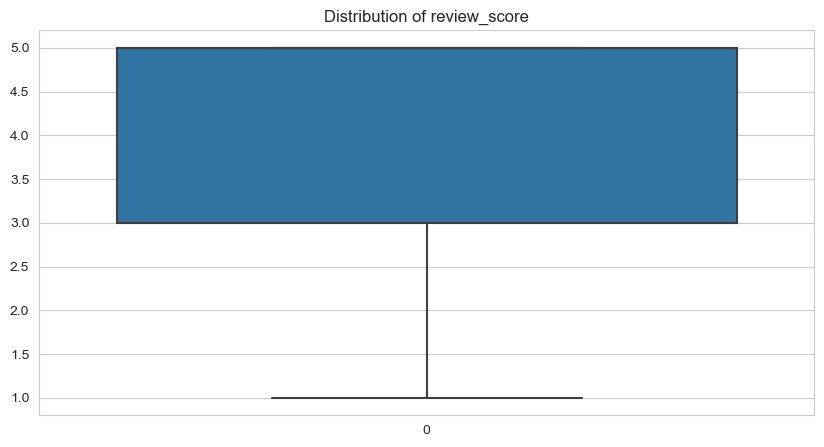

Skewness of Recency: 0.43585883202493925
Standard deviation of Recency: 152.38669351591855


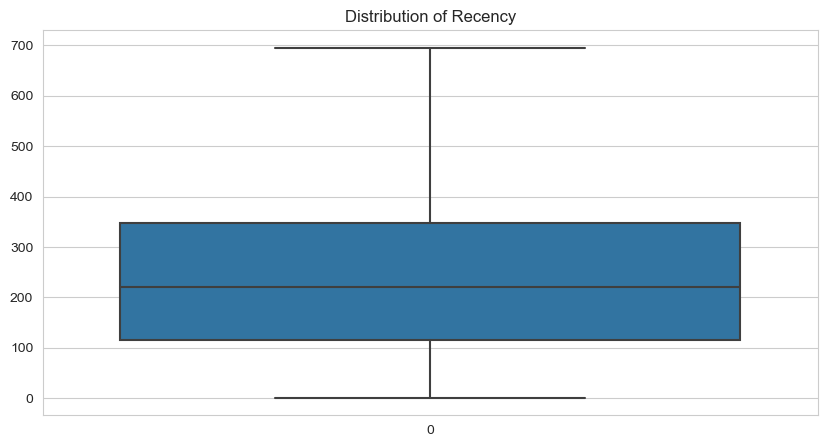

Skewness of Monetary: 70.4949829190865
Standard deviation of Monetary: 647.5936527572555


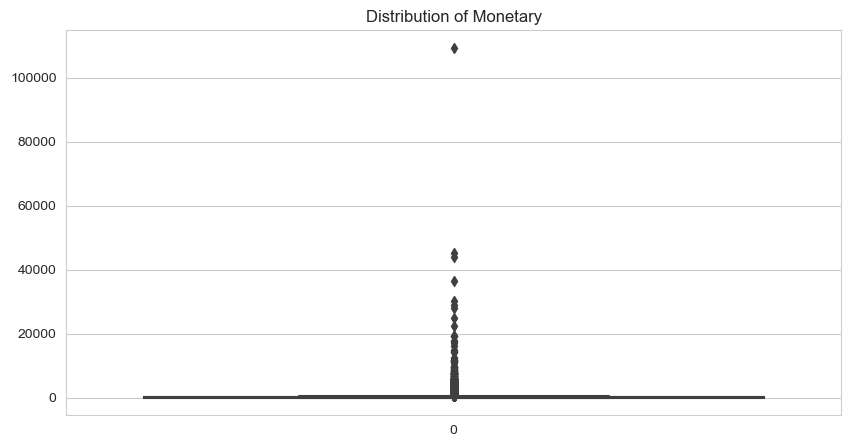

Skewness of Frequency: 10.676600298052568
Standard deviation of Frequency: 0.20649360862515379


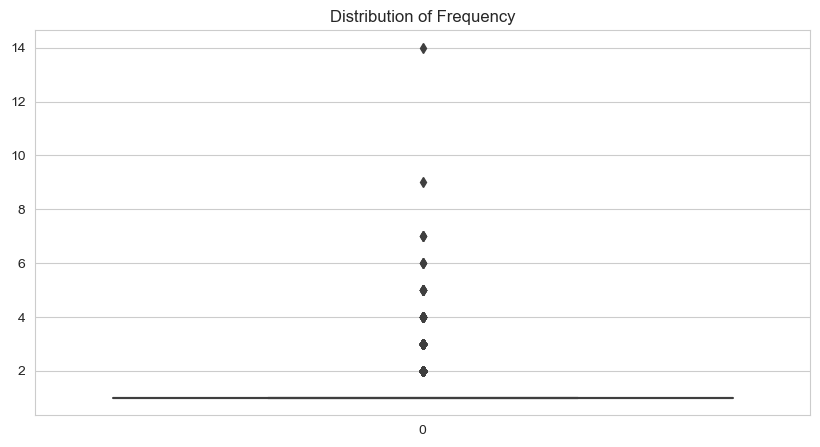

In [179]:
# Loop through numeric columns in the dataframe and plot their distribution
for col in final.select_dtypes(include = np.number).columns:
    # Plotting boxplot for each numeric column
    plt.figure(figsize = (10, 5))
    
    # Print skewness and standard deviation of the column
    print(f'Skewness of {col}: {final[col].skew()}')
    print(f'Standard deviation of {col}: {final[col].std()}')
    
    # Create boxplot
    sns.boxplot(final[col])
    plt.title(f'Distribution of {col}')
    plt.show()


In [180]:
# Drop unnecessary columns from the dataframe
final.drop(columns=['customer_zip_code_prefix', 'no_of_orders', 'no_of_products', 'Frequency'], inplace=True)

- Columns no_of_orders, no_of_products, and Frequency have near-zero standard deviation, so they are dropped as they don't contribute to model building.

In [181]:
# Creating a copy of the final dataframe for outlier treatment
final_outlierTreated = final.copy()

In [182]:
# Handling outliers by applying IQR method across numeric columns
for col in final_outlierTreated.select_dtypes(include = np.number).columns:
    q1, q3 = final_outlierTreated[col].quantile(0.25), final_outlierTreated[col].quantile(0.75)
    iqr = q3 - q1
    ll, ul = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    final_outlierTreated[col] = final_outlierTreated[col].clip(lower=ll, upper=ul)

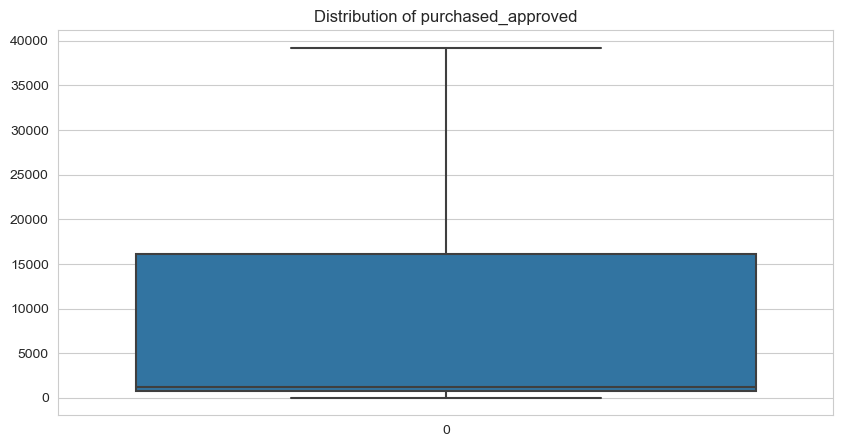

purchased_approved - Skewness: 1.22, Std Dev: 15172.74


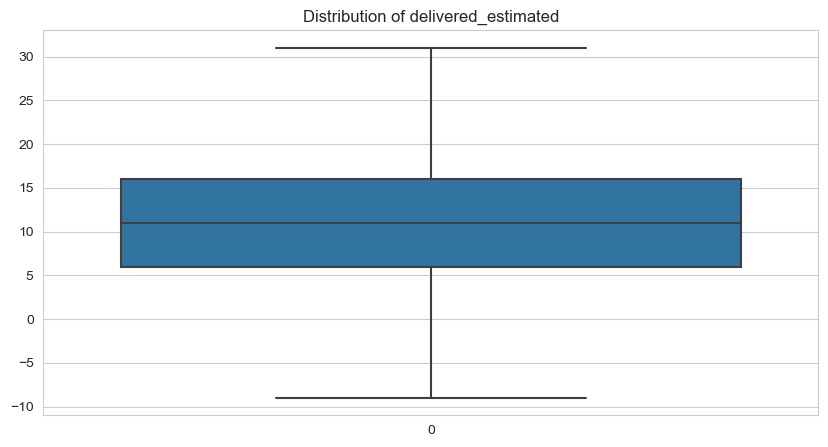

delivered_estimated - Skewness: -0.10, Std Dev: 8.27


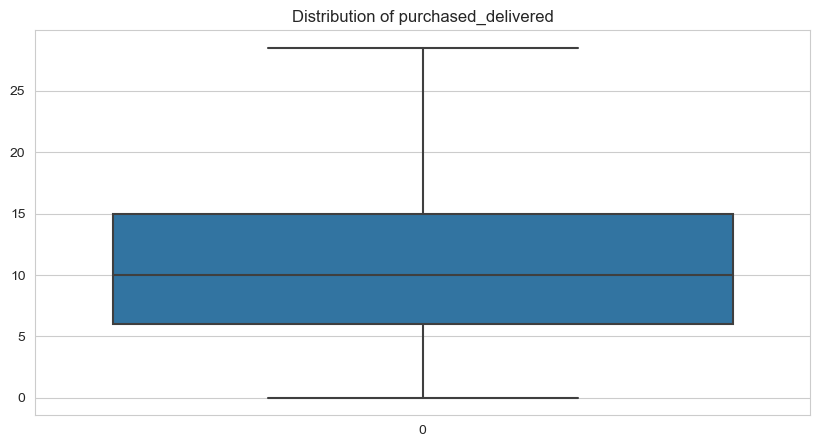

purchased_delivered - Skewness: 0.88, Std Dev: 7.12


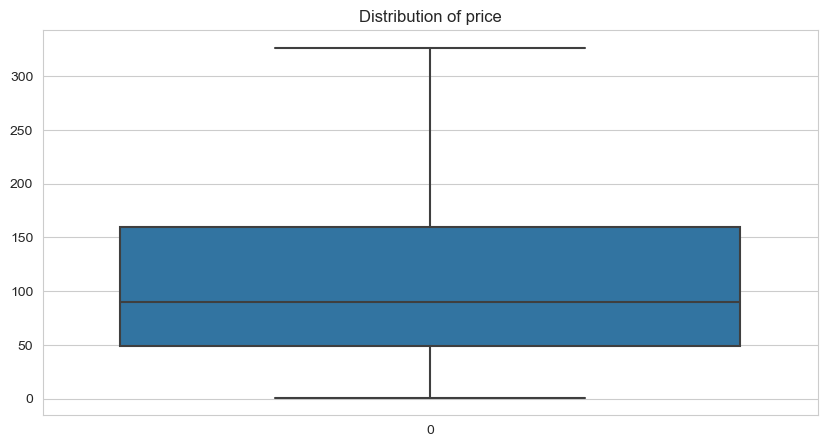

price - Skewness: 1.06, Std Dev: 92.20


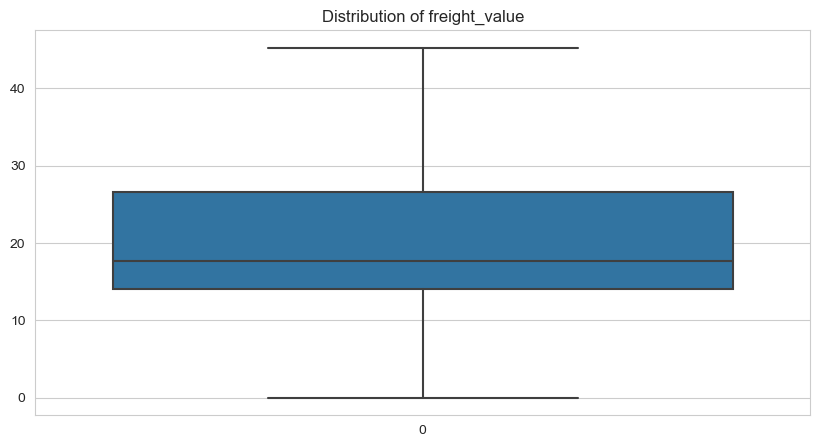

freight_value - Skewness: 0.98, Std Dev: 11.10


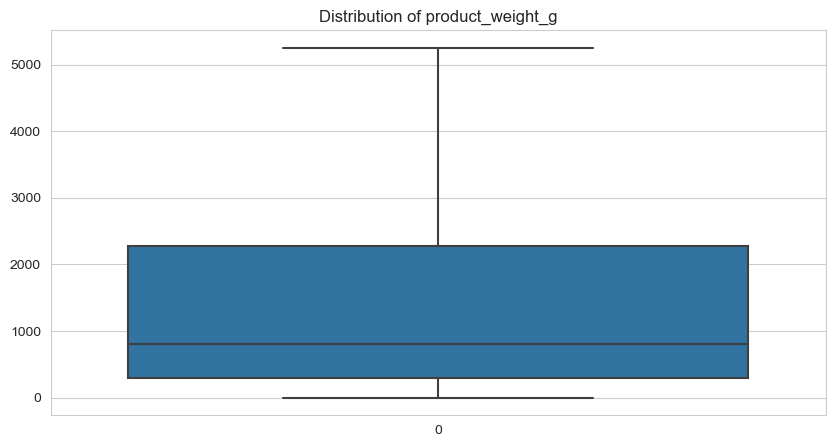

product_weight_g - Skewness: 1.18, Std Dev: 1768.58


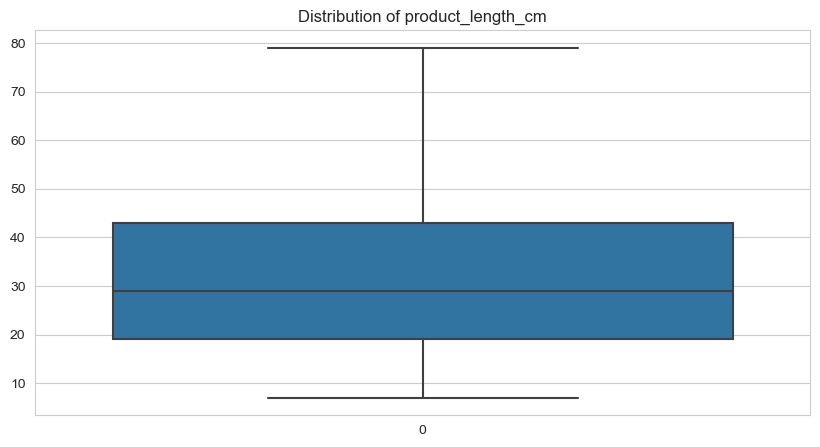

product_length_cm - Skewness: 1.09, Std Dev: 18.79


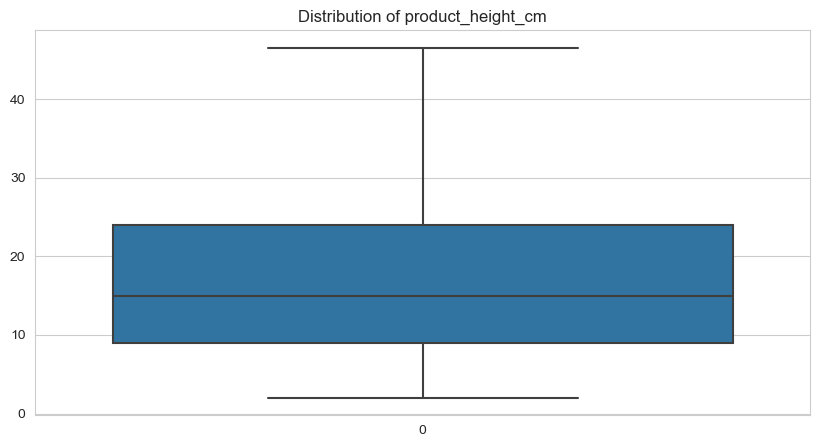

product_height_cm - Skewness: 0.98, Std Dev: 12.63


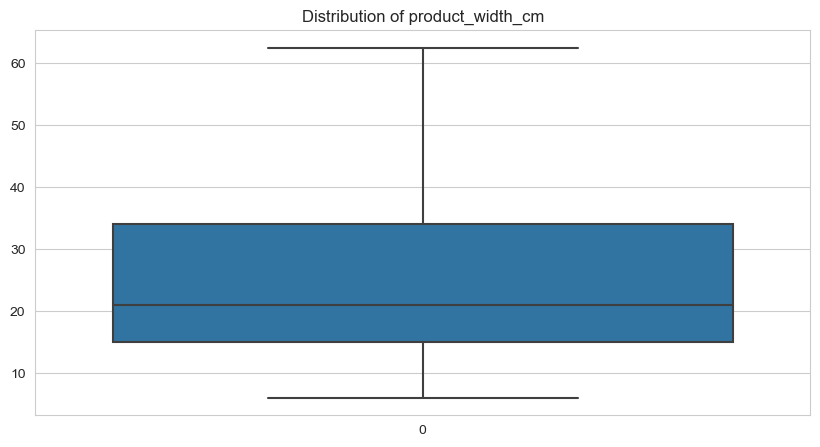

product_width_cm - Skewness: 1.13, Std Dev: 14.46


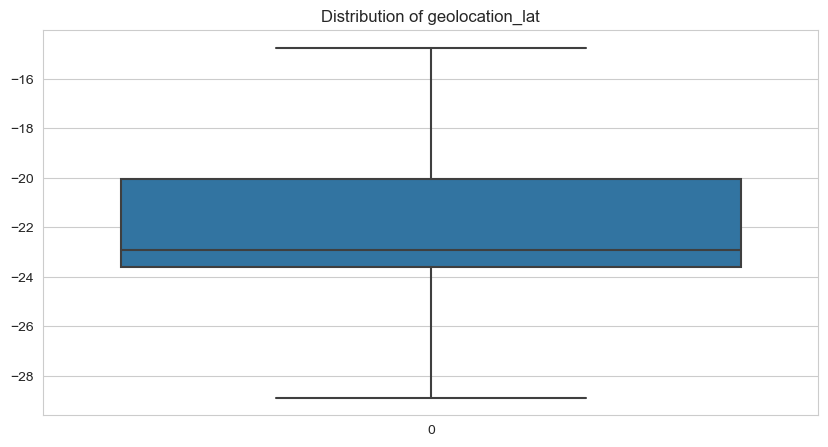

geolocation_lat - Skewness: 0.53, Std Dev: 3.67


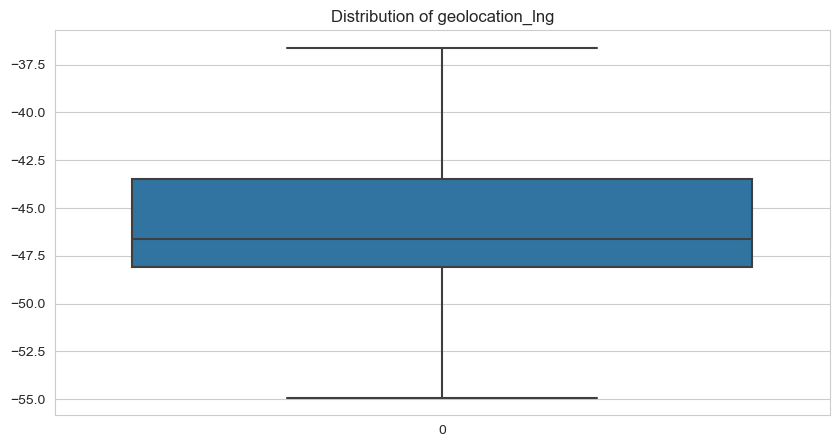

geolocation_lng - Skewness: 0.28, Std Dev: 3.80


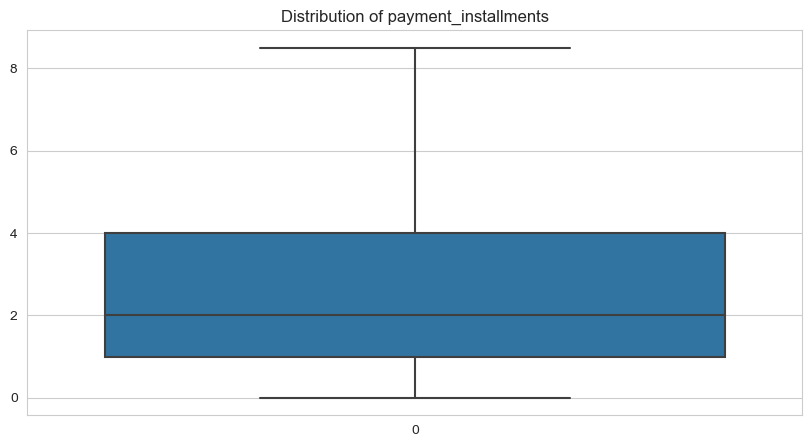

payment_installments - Skewness: 1.21, Std Dev: 2.44


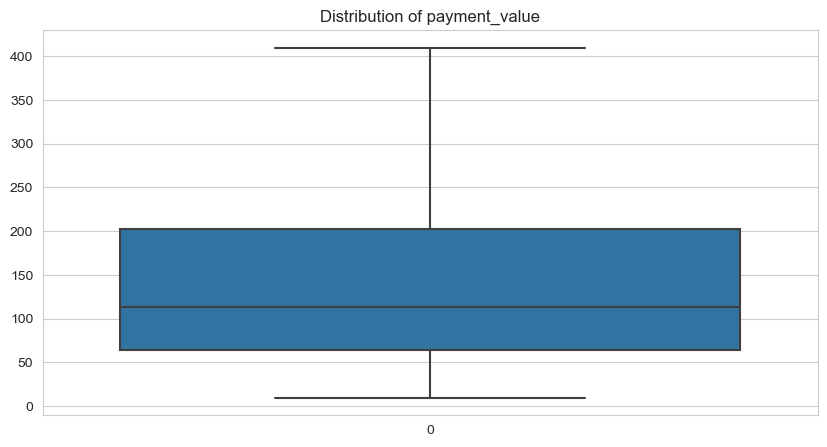

payment_value - Skewness: 1.09, Std Dev: 117.11


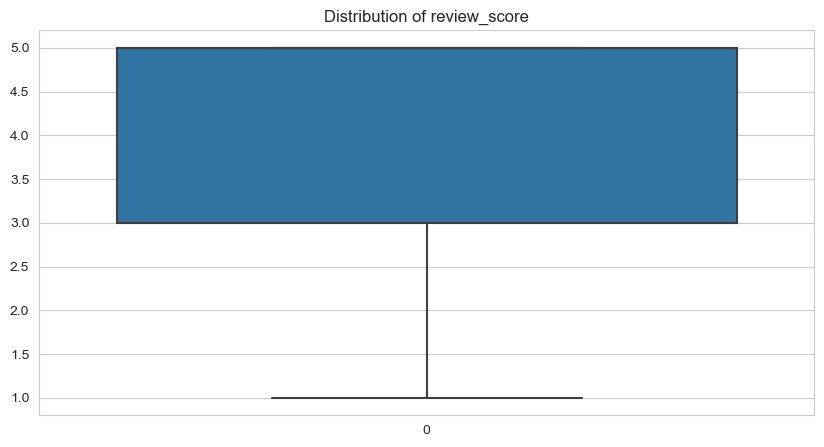

review_score - Skewness: -1.07, Std Dev: 1.51


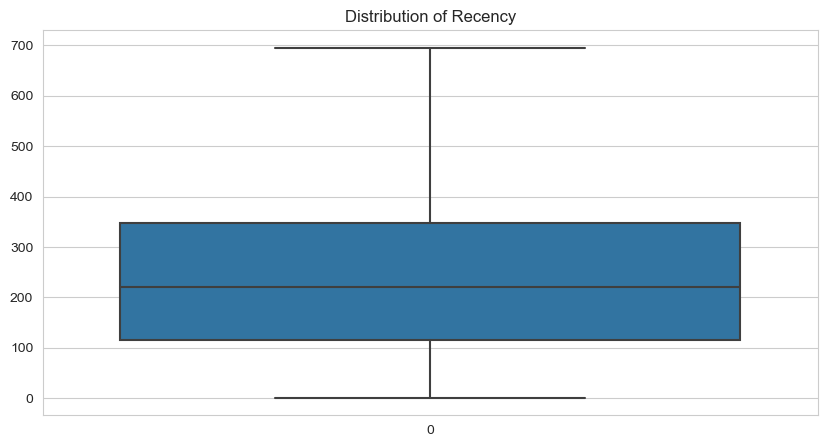

Recency - Skewness: 0.44, Std Dev: 152.39


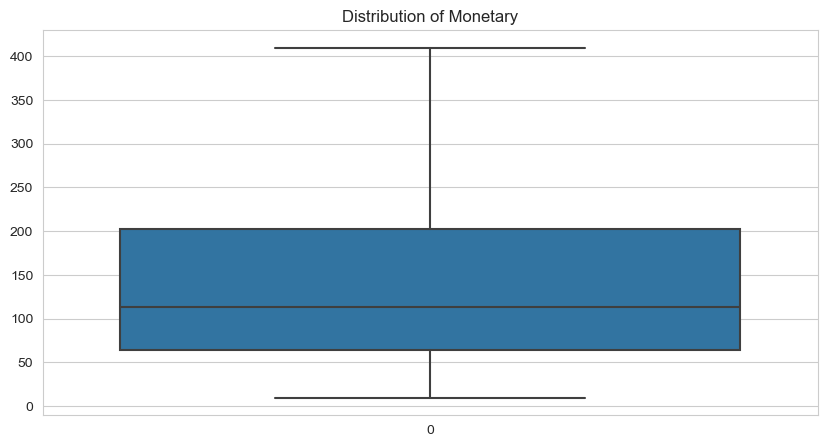

Monetary - Skewness: 1.09, Std Dev: 117.11


In [183]:
# Visualizing distributions and calculating skewness and standard deviation for numeric columns
for col in final_outlierTreated.select_dtypes(include = np.number).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(final_outlierTreated[col])
    plt.title(f'Distribution of {col}')
    plt.show()
    
    # Print skewness and standard deviation
    print(f'{col} - Skewness: {final_outlierTreated[col].skew():.2f}, Std Dev: {final_outlierTreated[col].std():.2f}')


In [184]:
final_outlierTreated.shape

(90528, 21)

### Observations:
- **Outlier Treatment:** Capping method used for outliers.
- **Action Taken:** Values beyond the upper and lower whiskers are capped to their respective whisker values.
- **Reason:** Capping is preferred to avoid significant data loss that would occur if values were dropped.

## Missing Value Treatement

In [185]:
final_outlierTreated.isna().sum() / len(final) * 100

customer_unique_id       0.000000
customer_city            0.000000
customer_state           0.000000
purchased_approved       0.000000
delivered_estimated      0.000000
purchased_delivered      0.000000
price                    0.000000
freight_value            0.000000
product_weight_g         0.000000
product_length_cm        0.000000
product_height_cm        0.000000
product_width_cm         0.000000
geolocation_lat          0.000000
geolocation_lng          0.000000
payment_type             0.000000
payment_installments     0.000000
payment_value            0.000000
review_score            90.099196
Recency                  0.000000
Monetary                 0.000000
Churn                    0.000000
dtype: float64

In [186]:
final_outlierTreated.drop(columns = ['review_score'], axis = 1, inplace = True)

### Observation:
  - The `review_score` feature had over 90% missing values, leading to its removal from the dataset as it wouldn't contribute meaningfully to the analysis or modeling.

## Multi-variate Analysis

### Target Imbalance

In [187]:
# Calculate and display the percentage distribution of churn values
final_outlierTreated.Churn.value_counts(normalize=True) * 100

0    54.591949
1    45.408051
Name: Churn, dtype: float64

### Observation: 
The target variable is balanced, so upsampling using SMOTE is not necessary.

###  Multivariate Analysis

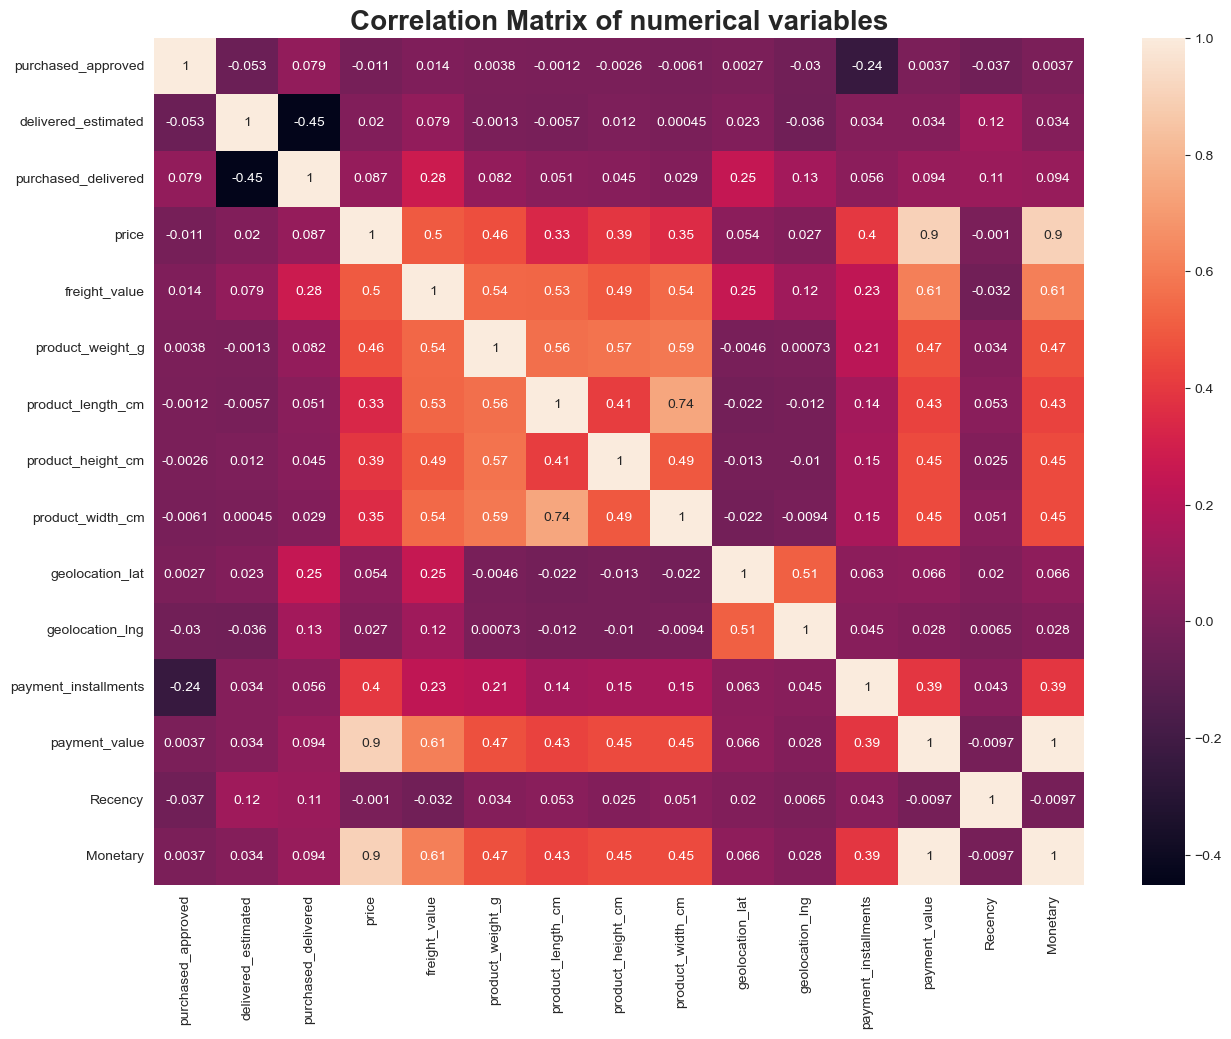

In [188]:
# Plotting a heatmap of correlations for numerical variables
plt.figure(figsize=(15, 11))  # Set figure size
sns.heatmap(final_outlierTreated.corr(), annot=True)  # Create the heatmap with correlation values
plt.title('Correlation Matrix of numerical variables', fontsize=20, fontweight='bold')  # Set title
plt.show()  # Display the plot


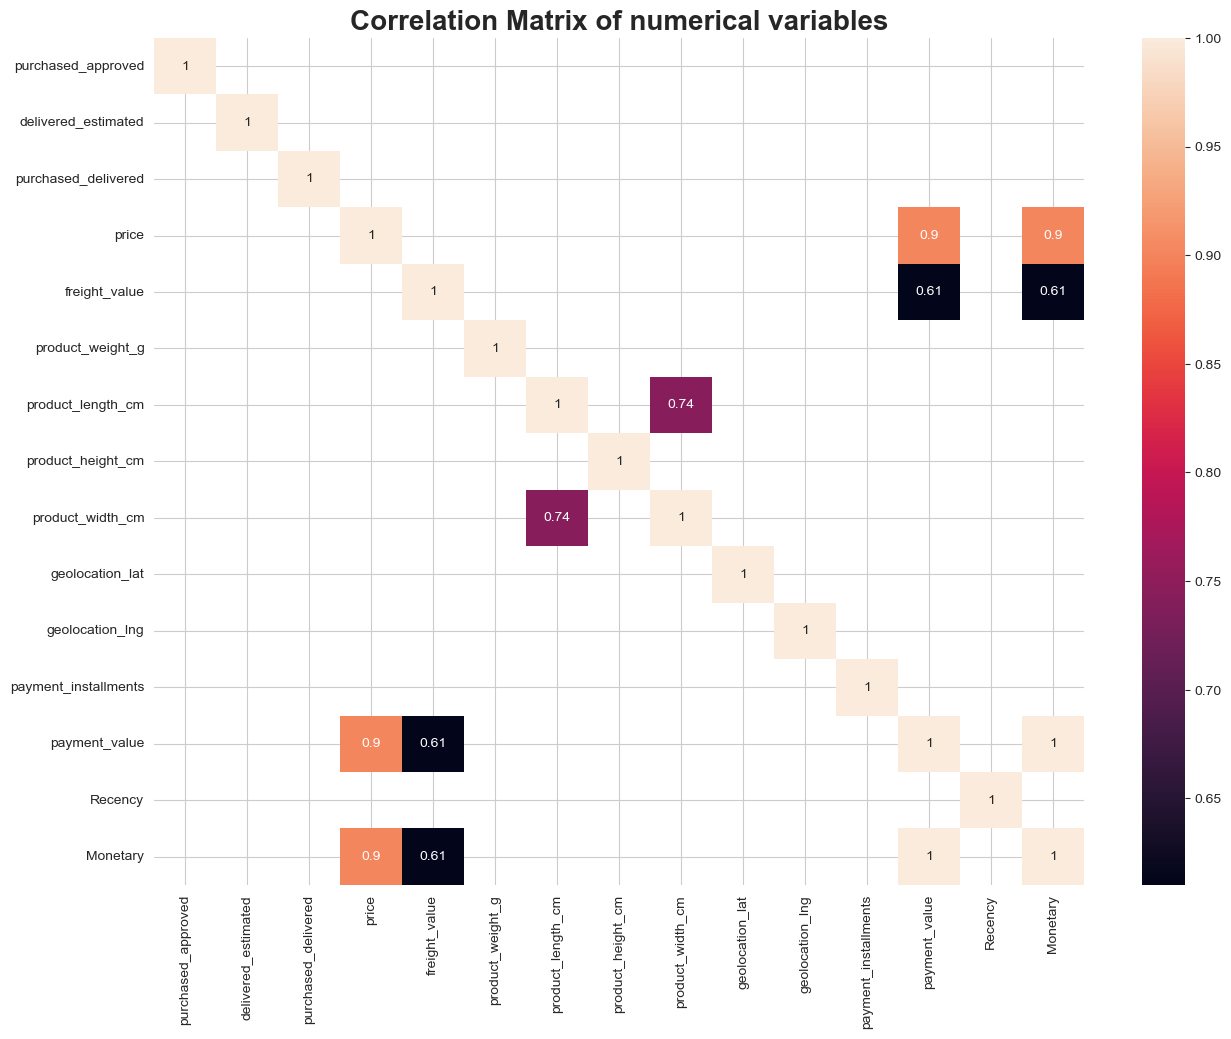

In [189]:
# Plotting a heatmap for correlations greater than 0.6
plt.figure(figsize=(15, 11))  # Set figure size
sns.heatmap(final_outlierTreated.corr()[final_outlierTreated.corr() > 0.6], annot=True)  # Filter and display correlations > 0.6
plt.title('Correlation Matrix of numerical variables', fontsize=20, fontweight='bold')  # Set title
plt.show()  # Display the plot


### Observations:
  - The heatmap displays the correlation coefficients between numerical variables.
  - **product_width_cm** is fairly correlated with **product_length_cm**.
  - **freight_value** is fairly correlated with **Monetary** and **payment_value**, which are the same. This creates multi-collinearity and necessitates removal of one of the variables.
  - **price** is highly correlated with **Monetary** and **payment_value**.

## Statistical Tests

#### Chi-Squared test for Independence between categorical variables and Churn

##### Hypothesis:
- Null Hypothesis, H0: Variables are independent.
- Alternate Hypothesis, Ha: Variables are dependent.

In [190]:
def cat_cat(variable):
    dependent_variables = []  # List to store variables that are dependent on Churn
    independent_variables = []  # List to store variables that are independent of Churn
    for var in variable:
        print(f'{var} and Churn')  # Print variable being tested
        # Create a contingency table between the variable and Churn
        observed = pd.crosstab(final_outlierTreated[var], final_outlierTreated.Churn)
        # Perform the Chi-Squared test
        chi_stats, pval, dof, expected = stats.chi2_contingency(observed)
        # Display the test results
        print('test statistics: ', chi_stats)
        print('p - value: ', pval)
        print('degrees of freedom: ', dof)
        # Check if p-value is less than 0.05 (significance level)
        if pval < 0.05:
            print(f'Reject Null Hypothesis. The variables {var} and target variable, Churn are dependent.\n')
            dependent_variables.append(var)  # Add to dependent variables list
        else:
            print(f'Failed to reject Null Hypothesis. The variables {var} and target variable, Churn are independent.\n')
            independent_variables.append(var)  # Add to independent variables list
    print('Dependent variables: ', dependent_variables)  # Display dependent variables
    print('Independent variables: ', independent_variables)  # Display independent variables

# List of categorical variables to test
variable = ['customer_state', 'payment_type', 'payment_installments', 'customer_city']
cat_cat(variable)


customer_state and Churn


<IPython.core.display.Javascript object>

test statistics:  353.9562373606318
p - value:  2.9132771252108942e-59
degrees of freedom:  26
Reject Null Hypothesis. The variables customer_state and target variable, Churn are dependent.

payment_type and Churn


<IPython.core.display.Javascript object>

test statistics:  266.16944819672017
p - value:  2.0805608001059732e-57
degrees of freedom:  3
Reject Null Hypothesis. The variables payment_type and target variable, Churn are dependent.

payment_installments and Churn


<IPython.core.display.Javascript object>

test statistics:  489.01783336833216
p - value:  1.2904748666154383e-99
degrees of freedom:  9
Reject Null Hypothesis. The variables payment_installments and target variable, Churn are dependent.

customer_city and Churn


<IPython.core.display.Javascript object>

test statistics:  4523.939055252141
p - value:  1.8256365995978932e-08
degrees of freedom:  4011
Reject Null Hypothesis. The variables customer_city and target variable, Churn are dependent.

Dependent variables:  ['customer_state', 'payment_type', 'payment_installments', 'customer_city']
Independent variables:  []


### Observations
- Customer State and Churn: There is a significant dependency between 'customer_state' and 'Churn' (p-value < 0.05), suggesting that customer state influences churn behavior.
- Payment Type and Churn: 'Payment_type' and 'Churn' are dependent (p-value < 0.05), meaning the type of payment is related to whether a customer churns.
- Payment Installments and Churn: A strong dependency exists between 'payment_installments' and 'Churn' (p-value < 0.05), indicating that the installment option impacts churn.
- Customer City and Churn: 'Customer_city' is dependent on 'Churn' (p-value < 0.05), meaning the location of customers plays a role in determining churn.

- **Dependent Variables:** customer_state, payment_type, payment_installments, customer_city
- **Independent Variables:** None

#### ANOVA test for Independence between numerical and categorical variables

##### Hypothesis:
- Null Hypothesis, H0: Variables are not correlated with each other.
- Alternate Hypothesis, Ha: Variables are correlated with each other.

In [191]:
def num_cat(variable):
    correlated_variables = []  # List to store variables that are correlated with Churn
    noncorrelated_variables = []  # List to store variables that are not correlated with Churn
    for var in variable:
        print(f'{var} Vs. target variable, Churn')  # Print variable being tested

        # Separate churn and non-churn customers
        churn = final[final.Churn == 1][var]
        not_churn = final[final.Churn == 0][var]

        # Check normality of the variable in both churn and non-churn groups
        test_stats, churn_pval = stats.shapiro(churn)
        test_stats, notchurn_pval = stats.shapiro(not_churn)
        print(f'churn of {var} is {"normal" if churn_pval >= 0.05 else "not normal"}')
        print(f'not churn of {var} is {"normal" if notchurn_pval >= 0.05 else "not normal"}')

        # Perform Levene's test for equality of variances
        levene_teststats, pval_levene = stats.levene(churn, not_churn)
        print(f'{"all variances are equal" if pval_levene >= 0.05 else "at least one variance is not equal"}')

        # Perform ANOVA test to check if the means of the variable differ by Churn
        anova_teststats, pval_anova = stats.f_oneway(churn, not_churn)
        if pval_anova < 0.05:
            print(f'Reject Null Hypothesis. {var} is correlated with Churn.\n')
            correlated_variables.append(var)
        else:
            print(f'Failed to reject Null Hypothesis. {var} is not correlated with Churn.\n')
            noncorrelated_variables.append(var)

    # Display the results
    print('Correlated variables: ', correlated_variables)
    print('Non-correlated variables: ', noncorrelated_variables)

# List of numerical variables to test
variable = ['purchased_approved', 'delivered_estimated', 'purchased_delivered', 'price', 'freight_value', 
            'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'geolocation_lat', 
            'geolocation_lng', 'Recency', 'Monetary']
num_cat(variable)


purchased_approved Vs. target variable, Churn


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

churn of purchased_approved is not normal
not churn of purchased_approved is not normal


<IPython.core.display.Javascript object>

at least one variance is not equal


<IPython.core.display.Javascript object>

Reject Null Hypothesis. purchased_approved is correlated with Churn.

delivered_estimated Vs. target variable, Churn


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

churn of delivered_estimated is not normal
not churn of delivered_estimated is not normal


<IPython.core.display.Javascript object>

at least one variance is not equal


<IPython.core.display.Javascript object>

Reject Null Hypothesis. delivered_estimated is correlated with Churn.

purchased_delivered Vs. target variable, Churn


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

churn of purchased_delivered is not normal
not churn of purchased_delivered is not normal


<IPython.core.display.Javascript object>

at least one variance is not equal


<IPython.core.display.Javascript object>

Reject Null Hypothesis. purchased_delivered is correlated with Churn.

price Vs. target variable, Churn


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

churn of price is not normal
not churn of price is not normal


<IPython.core.display.Javascript object>

all variances are equal


<IPython.core.display.Javascript object>

Failed to reject Null Hypothesis. price is not correlated with Churn.

freight_value Vs. target variable, Churn


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

churn of freight_value is not normal
not churn of freight_value is not normal


<IPython.core.display.Javascript object>

at least one variance is not equal


<IPython.core.display.Javascript object>

Reject Null Hypothesis. freight_value is correlated with Churn.

product_weight_g Vs. target variable, Churn


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

churn of product_weight_g is not normal
not churn of product_weight_g is not normal


<IPython.core.display.Javascript object>

at least one variance is not equal


<IPython.core.display.Javascript object>

Reject Null Hypothesis. product_weight_g is correlated with Churn.

product_length_cm Vs. target variable, Churn


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

churn of product_length_cm is not normal
not churn of product_length_cm is not normal


<IPython.core.display.Javascript object>

at least one variance is not equal


<IPython.core.display.Javascript object>

Reject Null Hypothesis. product_length_cm is correlated with Churn.

product_height_cm Vs. target variable, Churn


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

churn of product_height_cm is not normal
not churn of product_height_cm is not normal


<IPython.core.display.Javascript object>

at least one variance is not equal


<IPython.core.display.Javascript object>

Reject Null Hypothesis. product_height_cm is correlated with Churn.

product_width_cm Vs. target variable, Churn


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

churn of product_width_cm is not normal
not churn of product_width_cm is not normal


<IPython.core.display.Javascript object>

at least one variance is not equal


<IPython.core.display.Javascript object>

Reject Null Hypothesis. product_width_cm is correlated with Churn.

geolocation_lat Vs. target variable, Churn


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

churn of geolocation_lat is not normal
not churn of geolocation_lat is not normal


<IPython.core.display.Javascript object>

at least one variance is not equal


<IPython.core.display.Javascript object>

Reject Null Hypothesis. geolocation_lat is correlated with Churn.

geolocation_lng Vs. target variable, Churn


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

churn of geolocation_lng is not normal
not churn of geolocation_lng is not normal


<IPython.core.display.Javascript object>

at least one variance is not equal


<IPython.core.display.Javascript object>

Reject Null Hypothesis. geolocation_lng is correlated with Churn.

Recency Vs. target variable, Churn


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

churn of Recency is not normal
not churn of Recency is not normal


<IPython.core.display.Javascript object>

at least one variance is not equal


<IPython.core.display.Javascript object>

Reject Null Hypothesis. Recency is correlated with Churn.

Monetary Vs. target variable, Churn


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

churn of Monetary is not normal
not churn of Monetary is not normal


<IPython.core.display.Javascript object>

all variances are equal


<IPython.core.display.Javascript object>

Failed to reject Null Hypothesis. Monetary is not correlated with Churn.

Correlated variables:  ['purchased_approved', 'delivered_estimated', 'purchased_delivered', 'freight_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'geolocation_lat', 'geolocation_lng', 'Recency']
Non-correlated variables:  ['price', 'Monetary']


#### ANOVA Test (Numerical vs. Categorical)
- purchased_approved: Correlated with Churn (p-value < 0.05).
- delivered_estimated: Correlated with Churn (p-value < 0.05).
- purchased_delivered: Correlated with Churn (p-value < 0.05).
- Price: Not correlated with Churn (p-value > 0.05).
- freight_value: Correlated with Churn (p-value < 0.05).
- product_weight_g: Correlated with Churn (p-value < 0.05).
- product_length_cm: Correlated with Churn (p-value < 0.05).
- product_height_cm: Correlated with Churn (p-value < 0.05).
- product_width_cm: Correlated with Churn (p-value < 0.05).
- geolocation_lat: Correlated with Churn (p-value < 0.05).
- geolocation_lng: Correlated with Churn (p-value < 0.05).
- Recency: Correlated with Churn (p-value < 0.05).
- Monetary: Not correlated with Churn (p-value > 0.05).
- **Correlated Variables:** purchased_approved, delivered_estimated, purchased_delivered, freight_value, product_weight_g, product_length_cm, product_height_cm, product_width_cm, geolocation_lat, geolocation_lng, Recency
- **Non-Correlated Variables:** price, Monetary

In [192]:
# Mann-Whitney U test for Independence between numerical and categorical variables (non-parametric test)

def non_parametric_tests(variable):
    correlated_variables = []  # List to store variables that are correlated with Churn
    noncorrelated_variables = []  # List to store variables that are not correlated with Churn
    for var in variable:
        # Perform Mann-Whitney U test to compare distributions between Churn and not Churn groups
        test_stats, pval = stats.mannwhitneyu(final_outlierTreated[final_outlierTreated.Churn == 1][var], 
                                              final_outlierTreated[final_outlierTreated.Churn == 0][var])
        # If p-value is less than 0.05, variables are considered correlated
        if pval < 0.05:
            print(f'Reject Null Hypothesis. {var} is correlated with Churn.\n')
            correlated_variables.append(var)
        else:
            print(f'Failed to reject Null Hypothesis. {var} is not correlated with Churn.\n')
            noncorrelated_variables.append(var)
    
    # Display the results
    print(f'Correlated variables: ', correlated_variables)
    print(f'Non-correlated variables: ', noncorrelated_variables)

# List of numerical variables to test
variable = ['purchased_approved', 'delivered_estimated', 'purchased_delivered', 'price', 'freight_value', 
            'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'geolocation_lat', 
            'geolocation_lng', 'Recency', 'Monetary']
non_parametric_tests(variable)


<IPython.core.display.Javascript object>

Reject Null Hypothesis. purchased_approved is correlated with Churn.



<IPython.core.display.Javascript object>

Reject Null Hypothesis. delivered_estimated is correlated with Churn.



<IPython.core.display.Javascript object>

Reject Null Hypothesis. purchased_delivered is correlated with Churn.



<IPython.core.display.Javascript object>

Failed to reject Null Hypothesis. price is not correlated with Churn.



<IPython.core.display.Javascript object>

Reject Null Hypothesis. freight_value is correlated with Churn.



<IPython.core.display.Javascript object>

Reject Null Hypothesis. product_weight_g is correlated with Churn.



<IPython.core.display.Javascript object>

Reject Null Hypothesis. product_length_cm is correlated with Churn.



<IPython.core.display.Javascript object>

Reject Null Hypothesis. product_height_cm is correlated with Churn.



<IPython.core.display.Javascript object>

Reject Null Hypothesis. product_width_cm is correlated with Churn.



<IPython.core.display.Javascript object>

Reject Null Hypothesis. geolocation_lat is correlated with Churn.



<IPython.core.display.Javascript object>

Reject Null Hypothesis. geolocation_lng is correlated with Churn.



<IPython.core.display.Javascript object>

Reject Null Hypothesis. Recency is correlated with Churn.



<IPython.core.display.Javascript object>

Reject Null Hypothesis. Monetary is correlated with Churn.

Correlated variables:  ['purchased_approved', 'delivered_estimated', 'purchased_delivered', 'freight_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'geolocation_lat', 'geolocation_lng', 'Recency', 'Monetary']
Non-correlated variables:  ['price']


#### Observations
- Similar to the ANOVA test, the Mann-Whitney U test shows that all the variables except price are correlated with Churn (p-value < 0.05).
- Price continues to be not correlated with Churn (p-value > 0.05).
- **Correlated Variables:** purchased_approved, delivered_estimated, purchased_delivered, freight_value, product_weight_g, product_length_cm, product_height_cm, product_width_cm, geolocation_lat, geolocation_lng, Recency, Monetary
- **Non-Correlated Variables:** price



### Summary:
- **Highly Correlated Variables**: Features like `purchased_approved`, `delivered_estimated`, `freight_value`, `product_weight_g`, `product_length_cm`, `Recency`, etc., are strongly correlated with Churn.
- **Not Correlated with Churn**: Variables like `price` and `Monetary` are not significantly correlated with Churn, and thus may not provide useful insights for predicting churn.
- **Categorical Data**: Features like `customer_state`, `payment_type`, and `customer_city` show a significant dependency on Churn, which should be considered in models.

## Transformation of Data

In [193]:
# Create a copy of the original DataFrame to avoid modifying the original data
transformed_data = final_outlierTreated.copy()

# Change the 'Churn' column's data type to 'object' for categorical processing
transformed_data['Churn'] = transformed_data['Churn'].astype('object')


In [194]:
# Check skewness of numerical columns in the transformed_data DataFrame
transformed_data.skew()


purchased_approved      1.216428
delivered_estimated    -0.098746
purchased_delivered     0.875670
price                   1.062169
freight_value           0.984423
product_weight_g        1.184709
product_length_cm       1.091731
product_height_cm       0.982845
product_width_cm        1.125375
geolocation_lat         0.530418
geolocation_lng         0.279777
payment_installments    1.211869
payment_value           1.092586
Recency                 0.435859
Monetary                1.092586
Churn                   0.184461
dtype: float64

In [195]:
transformed_data.describe()

purchased_approved  delivered_estimated  purchased_delivered  \
count        90528.000000         90528.000000          90528.00000   
mean         10218.436257            10.918180             11.54482   
std          15172.739926             8.274096              7.11531   
min              0.000000            -9.000000              0.00000   
25%            756.000000             6.000000              6.00000   
50%           1164.000000            11.000000             10.00000   
75%          16142.250000            16.000000             15.00000   
max          39221.625000            31.000000             28.50000   

              price  freight_value  product_weight_g  product_length_cm  \
count  90528.000000   90528.000000      90528.000000       90528.000000   
mean     118.080877      21.391276       1627.081113          34.209084   
std       92.200444      11.097660       1768.577396          18.785326   
min        0.850000       0.000000          0.000000           7.000000   
25%       48.900000      14.100000        304.000000          19.000000   
50%       89.900000      17.670000        800.000000          29.000000   
75%      159.900000      26.550000       2283.000000          43.000000   
max      326.400000      45.225000       5251.500000          79.000000   

       product_height_cm  product_width_cm  geolocation_lat  geolocation_lng  \
count       90528.000000      90528.000000     90528.000000     90528.000000   
mean           18.046422         26.419865       -21.859878       -46.111407   
std            12.625084         14.460755         3.670463         3.801225   
min             2.000000          6.000000       -28.882827       -54.921403   
25%             9.000000         15.000000       -23.578469       -48.060327   
50%            15.000000         21.000000       -22.898404       -46.614879   
75%            24.000000         34.000000       -20.042230       -43.486277   
max            46.500000         62.500000       -14.737871       -36.625202   

       payment_installments  payment_value       Recency      Monetary  
count          90528.000000   90528.000000  90528.000000  90528.000000  
mean               2.837614     152.703864    238.733773    152.703864  
std                2.439671     117.114715    152.386694    117.114715  
min                0.000000       9.590000      1.000000      9.590000  
25%                1.000000      63.790000    115.000000     63.790000  
50%                2.000000     112.830000    220.000000    112.830000  
75%                4.000000     202.122500    347.000000    202.122500  
max                8.500000     409.621250    695.000000    409.621250

In [196]:
from sklearn.preprocessing import PowerTransformer


# Yeo-Johnson Transformation (Handles both positive and negative values)
pt_yeo = PowerTransformer(method='yeo-johnson')
for var in ['delivered_estimated', 'geolocation_lat', 'geolocation_lng']:  # Applying only to specific columns
    transformed_data[var] = pt_yeo.fit_transform(transformed_data[[var]])

# Box-Cox Transformation (Requires strictly positive values)
pt_boxcox = PowerTransformer(method='box-cox')
for var in transformed_data.select_dtypes(include=np.number).columns:  # Loop over all numerical columns
    if var not in ['delivered_estimated', 'geolocation_lat', 'geolocation_lng']:  # Exclude certain columns
        transformed_data[var] = pt_boxcox.fit_transform(0.001 + transformed_data[[var]])  # Add a small constant to handle zeros/negatives



In [197]:
# Check skewness of numerical columns in the transformed_data DataFrame
transformed_data.skew()

purchased_approved      0.136317
delivered_estimated     0.102573
purchased_delivered    -0.025024
price                  -0.029814
freight_value           0.177740
product_weight_g       -0.004216
product_length_cm       0.101678
product_height_cm      -0.033945
product_width_cm        0.070255
geolocation_lat         0.032696
geolocation_lng        -0.013325
payment_installments   -0.367193
payment_value          -0.000312
Recency                -0.161802
Monetary               -0.000312
Churn                   0.184461
dtype: float64

### Summary
- Yeo-Johnson: Applied to variables with negative values or both negative and positive values.
- Box-Cox: Applied to variables with only positive values, ensuring proper transformation.

## Classification Models

In [198]:
transformed_data.head()

customer_unique_id customer_city customer_state  \
0  0000366f3b9a7992bf8c76cfdf3221e2       cajamar             SP   
1  0000b849f77a49e4a4ce2b2a4ca5be3f        osasco             SP   
2  0000f46a3911fa3c0805444483337064      sao jose             SC   
3  0000f6ccb0745a6a4b88665a16c9f078         belem             PA   
4  0004aac84e0df4da2b147fca70cf8255      sorocaba             SP   

   purchased_approved  delivered_estimated  purchased_delivered     price  \
0           -0.579563            -0.866609            -0.725370  0.452317   
1            1.299464            -0.866609            -1.516359 -1.663291   
2           -3.569347            -1.214404             1.609794 -0.307908   
3           -0.452622            -0.016225             1.167662 -1.352995   
4           -0.416681            -0.506891             0.401717  0.872268   

   freight_value  product_weight_g  product_length_cm  product_height_cm  \
0      -0.869439          0.460791           0.378968          -0.913417   
1      -1.410467         -0.678234          -0.167282          -0.383337   
2      -0.258318          0.460791          -0.253514           1.750517   
3      -0.215367         -1.409315          -0.907027          -1.272156   
4      -0.293336          1.525512          -1.364730          -1.764051   

   product_width_cm  geolocation_lat  geolocation_lng payment_type  \
0          0.712075        -0.339009        -0.147663  credit_card   
1         -0.427525        -0.403676        -0.136448  credit_card   
2          0.867575        -1.742476        -0.641800  credit_card   
3         -1.629117         1.762773        -0.601932  credit_card   
4         -1.629117        -0.388799        -0.321518  credit_card   

   payment_installments  payment_value   Recency  Monetary Churn  
0              1.594216       0.278586 -0.750358  0.278586     0  
1             -0.934791      -1.840386 -0.724705 -1.840386     0  
2              1.594216      -0.360895  1.654413 -0.360895     1  
3              0.923510      -1.234730  0.630258 -1.234730     1  
4              1.333123       0.699222  0.449167  0.699222     1

In [199]:
def state_encoding(state):
    # Categorize the state into one of the five regions
    if state in ['RS', 'SC', 'PR']:  # Southern Region
        return 'southern'
    elif state in ['SP', 'RJ', 'MG', 'ES']:  # Southeastern Region
        return 'southeastern'
    elif state in ['MT', 'MS', 'GO', 'DF']:  # Central-Western Region
        return 'centralwestern'
    elif state in ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']:  # Northeastern Region
        return 'northeastern'
    else:  # All other states are categorized as Northern Region
        return 'northern'


In [200]:
# Apply the state_encoding function to the 'customer_state' column
transformed_data['customer_state'] = transformed_data['customer_state'].apply(state_encoding)

### Observation:
- The states in Brazil are geographically distributed across various regions. To streamline the analysis, we grouped the states into their respective regions: Southern, Southeastern, Centralwestern, Northeastern, and Northern. This categorization helps simplify regional analysis and enables more meaningful insights at a broader geographical level.

In [201]:
# Create a copy of the transformed_data DataFrame for further feature engineering and modeling
features = transformed_data.copy()

features.head()


customer_unique_id customer_city customer_state  \
0  0000366f3b9a7992bf8c76cfdf3221e2       cajamar   southeastern   
1  0000b849f77a49e4a4ce2b2a4ca5be3f        osasco   southeastern   
2  0000f46a3911fa3c0805444483337064      sao jose       southern   
3  0000f6ccb0745a6a4b88665a16c9f078         belem       northern   
4  0004aac84e0df4da2b147fca70cf8255      sorocaba   southeastern   

   purchased_approved  delivered_estimated  purchased_delivered     price  \
0           -0.579563            -0.866609            -0.725370  0.452317   
1            1.299464            -0.866609            -1.516359 -1.663291   
2           -3.569347            -1.214404             1.609794 -0.307908   
3           -0.452622            -0.016225             1.167662 -1.352995   
4           -0.416681            -0.506891             0.401717  0.872268   

   freight_value  product_weight_g  product_length_cm  product_height_cm  \
0      -0.869439          0.460791           0.378968          -0.913417   
1      -1.410467         -0.678234          -0.167282          -0.383337   
2      -0.258318          0.460791          -0.253514           1.750517   
3      -0.215367         -1.409315          -0.907027          -1.272156   
4      -0.293336          1.525512          -1.364730          -1.764051   

   product_width_cm  geolocation_lat  geolocation_lng payment_type  \
0          0.712075        -0.339009        -0.147663  credit_card   
1         -0.427525        -0.403676        -0.136448  credit_card   
2          0.867575        -1.742476        -0.641800  credit_card   
3         -1.629117         1.762773        -0.601932  credit_card   
4         -1.629117        -0.388799        -0.321518  credit_card   

   payment_installments  payment_value   Recency  Monetary Churn  
0              1.594216       0.278586 -0.750358  0.278586     0  
1             -0.934791      -1.840386 -0.724705 -1.840386     0  
2              1.594216      -0.360895  1.654413 -0.360895     1  
3              0.923510      -1.234730  0.630258 -1.234730     1  
4              1.333123       0.699222  0.449167  0.699222     1

In [202]:
# Drop unnecessary columns that are not required for analysis or modeling
# 'customer_unique_id', 'customer_city', and 'payment_value' are removed
features.drop(columns=['customer_unique_id', 'customer_city', 'payment_value'], axis=1, inplace=True)

### Observations:
1. The `payment_value` feature duplicates the `Monetary` feature, so it is dropped to avoid redundancy.
2. The `customer_city` feature has too many unique categories (multi-class), making encoding impractical and less useful, so it is dropped.

In [203]:
features.head()

customer_state  purchased_approved  delivered_estimated  \
0   southeastern           -0.579563            -0.866609   
1   southeastern            1.299464            -0.866609   
2       southern           -3.569347            -1.214404   
3       northern           -0.452622            -0.016225   
4   southeastern           -0.416681            -0.506891   

   purchased_delivered     price  freight_value  product_weight_g  \
0            -0.725370  0.452317      -0.869439          0.460791   
1            -1.516359 -1.663291      -1.410467         -0.678234   
2             1.609794 -0.307908      -0.258318          0.460791   
3             1.167662 -1.352995      -0.215367         -1.409315   
4             0.401717  0.872268      -0.293336          1.525512   

   product_length_cm  product_height_cm  product_width_cm  geolocation_lat  \
0           0.378968          -0.913417          0.712075        -0.339009   
1          -0.167282          -0.383337         -0.427525        -0.403676   
2          -0.253514           1.750517          0.867575        -1.742476   
3          -0.907027          -1.272156         -1.629117         1.762773   
4          -1.364730          -1.764051         -1.629117        -0.388799   

   geolocation_lng payment_type  payment_installments   Recency  Monetary  \
0        -0.147663  credit_card              1.594216 -0.750358  0.278586   
1        -0.136448  credit_card             -0.934791 -0.724705 -1.840386   
2        -0.641800  credit_card              1.594216  1.654413 -0.360895   
3        -0.601932  credit_card              0.923510  0.630258 -1.234730   
4        -0.321518  credit_card              1.333123  0.449167  0.699222   

  Churn  
0     0  
1     0  
2     1  
3     1  
4     1

In [204]:
# Separate features into independent variables and target
independent = features.drop(columns=['Churn'], axis=1)  # Drop 'Churn' to create independent features

# Split independent variables into numerical and categorical subsets
df_numeric = independent.select_dtypes(include=np.number)  # Select numeric features
df_categorical = independent.select_dtypes(exclude=np.number)  # Select non-numeric (categorical) features

# Convert target variable 'Churn' to integer type for modeling
df_target = features['Churn'].astype('int')  


In [205]:
# Perform one-hot encoding on categorical variables
# drop_first=True removes the first category to avoid dummy variable trap (multicollinearity)
encoded_data = pd.get_dummies(df_categorical, drop_first=True)

In [206]:
# Combine numeric and encoded categorical data into a single DataFrame
X = pd.concat([df_numeric, encoded_data], axis=1)

# Drop the 'Recency' column as it might not add value to the predictive model
X.drop(columns=['Recency'], axis=1, inplace=True)


### Observation:

- The **Recency** feature is excluded during model building because it directly influences the target variable (Churn). Retaining this feature would result in a model with artificially high accuracy, which does not reflect the true predictive power of the model when applied to unseen data. Dropping it ensures the model relies on meaningful patterns from other features.

### Train-Test Split

In [207]:
# Split the dataset into training and testing sets
# X contains the features, df_target contains the target variable
X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(X), df_target, random_state=500, test_size=0.2)

# Print the dimensions (shape) of the training and testing sets
# X_train contains the features for the training set
print('X_train:', X_train.shape)

# y_train contains the target values for the training set
print('y_train:', y_train.shape)

# X_test contains the features for the testing set
print('X_test:', X_test.shape)

# y_test contains the target values for the testing set
print('y_test:', y_test.shape)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

X_train: (72422, 21)
y_train: (72422,)
X_test: (18106, 21)
y_test: (18106,)


In [208]:
# Perform independent t-tests between each column of X_train and X_test
tstats, pvals = stats.ttest_ind(X_train, X_test)

# Store the p-values in a DataFrame for easier interpretation
ref_df = pd.DataFrame(pvals, index=X_train.columns, columns=['pvals'])

# Check if any p-value is less than 0.05 (which would indicate a significant difference)
print((ref_df < 0.05).any())

<IPython.core.display.Javascript object>

pvals    False
dtype: bool


#### Conclusion:
- Since the null hypothesis is not rejected, we can conclude that the training and test sets are statistically similar in terms of the distribution of each independent feature.
- This suggests that both sets are properly represented and should provide reliable results when training and evaluating models.

### Decision Tree Model

In [209]:
# Split the dataset into training and test sets (80% train, 20% test)
xtrain_dt, xtest_dt, ytrain_dt, ytest_dt = train_test_split(X, df_target, test_size=0.2, random_state=500)


<IPython.core.display.Javascript object>

In [210]:
# Print the shapes of the training and testing datasets
print('xtrain: ', xtrain_dt.shape)  # Features of training data
print('ytrain: ', ytrain_dt.shape)  # Target of training data
print('xtest: ', xtest_dt.shape)    # Features of testing data
print('ytest: ', ytest_dt.shape)    # Target of testing data

xtrain:  (72422, 20)
ytrain:  (72422,)
xtest:  (18106, 20)
ytest:  (18106,)


In [211]:
# Perform an independent T-test to compare feature distributions between train and test sets
tstats, pvals = stats.ttest_ind(xtrain_dt, xtest_dt)

<IPython.core.display.Javascript object>

In [212]:
# Create a DataFrame with the p-values for each feature
ref_df = pd.DataFrame(pvals, index=xtrain_dt.columns, columns=['pvals'])

In [213]:
# Check if any p-value is below 0.05, indicating a significant difference
print((ref_df < 0.05).any())  # If True, there is a significant difference in at least one feature

pvals    False
dtype: bool


In [214]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score

In [215]:
# Initialize a Decision Tree Classifier model
decisionTree = DecisionTreeClassifier()

# Train the decision tree model on the training data
decisionTree = decisionTree.fit(xtrain_dt, ytrain_dt)

In [216]:
# Predict probabilities for the test set
ypred_proba_dt = decisionTree.predict(xtest_dt)

In [217]:
# Convert probabilities to binary predictions (0 or 1) using a threshold of 0.5
ypred_dt = [0 if i < 0.5 else 1 for i in ypred_proba_dt]

In [218]:
# Preview the first 10 predictions
print(ypred_dt[:10])

[0, 1, 0, 0, 1, 0, 1, 0, 1, 1]


In [219]:
# Predict probabilities for the training set
ypred_proba_dt_train = decisionTree.predict(xtrain_dt)

In [220]:
# Convert training set probabilities to binary predictions
ypred_dt_train = [0 if i < 0.5 else 1 for i in ypred_proba_dt_train]

In [221]:
# Create a confusion matrix to evaluate the performance of the model on the test set
cm = confusion_matrix(ytest_dt, ypred_dt)

In [222]:
# Convert the confusion matrix into a DataFrame for better readability
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])


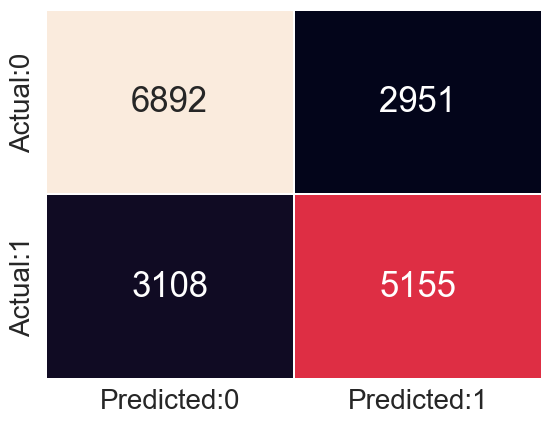

In [223]:
# Plot the confusion matrix as a heatmap for better visualization
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, 
            linewidths=0.1, annot_kws={'size': 25})
plt.xticks(fontsize=20)  # Set font size for x-axis ticks
plt.yticks(fontsize=20)  # Set font size for y-axis ticks
plt.show()  # Display the plot

In [224]:
# Print the classification report for the test data
print(classification_report(ytest_dt, ypred_dt))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      9843
           1       0.64      0.62      0.63      8263

    accuracy                           0.67     18106
   macro avg       0.66      0.66      0.66     18106
weighted avg       0.66      0.67      0.67     18106



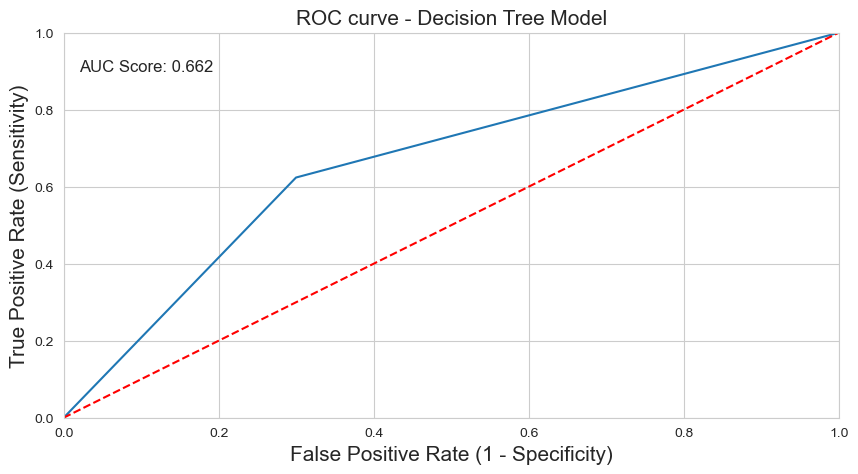

In [225]:
# Set up the figure size for the plot
plt.figure(figsize=(10, 5))

# Compute false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(ytest_dt, ypred_proba_dt)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Set axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# Plot diagonal line for comparison
plt.plot([0, 1], [0, 1], 'r--')

# Add title and labels
plt.title('ROC curve - Decision Tree Model', fontsize=15)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=15)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=15)

# Display AUC score on the plot
auc_score = roc_auc_score(ytest_dt, ypred_proba_dt)
plt.text(x=0.02, y=0.9, s=f'AUC Score: {round(auc_score, 4)}', fontsize=12)

# Enable grid
plt.grid(True)

# Show the plot
plt.show()


In [226]:
cols = ['test_accuracy', 'train_accuracy', 'test_precision', 'train_precision','test_recall','train_recall', 'test_kappa', 'train_kappa', 'f1_score','roc_auc_score']
model_evaluation = pd.DataFrame(columns=cols)

In [227]:
# Add Decision Tree model evaluation metrics to the model_evaluation DataFrame
model_evaluation.loc['DecisionTree'] = [
    accuracy_score(ytest_dt, ypred_dt),               # Accuracy on test set
    accuracy_score(ytrain_dt, ypred_dt_train),        # Accuracy on training set
    precision_score(ytest_dt, ypred_dt),              # Precision on test set
    precision_score(ytrain_dt, ypred_dt_train),       # Precision on training set
    recall_score(ytest_dt, ypred_dt),                 # Recall on test set
    recall_score(ytrain_dt, ypred_dt_train),          # Recall on training set
    cohen_kappa_score(ytest_dt, ypred_dt),            # Cohen's Kappa on test set
    cohen_kappa_score(ytrain_dt, ypred_dt_train),     # Cohen's Kappa on training set
    f1_score(ytest_dt, ypred_dt),                     # F1 Score on test set
    roc_auc_score(ytest_dt, ypred_proba_dt)           # ROC AUC on test set
]

# Display the model evaluation results
model_evaluation


test_accuracy  train_accuracy  test_precision  train_precision  \
DecisionTree        0.66536             1.0        0.635949              1.0   

              test_recall  train_recall  test_kappa  train_kappa  f1_score  \
DecisionTree     0.623865           1.0    0.324553          1.0  0.629849   

              roc_auc_score  
DecisionTree       0.662029

### XG Boost Model

In [228]:
# Split the data into training and testing sets for XGBoost model
xtrain_xg, xtest_xg, ytrain_xg, ytest_xg = train_test_split(X, df_target, test_size=0.2, random_state=500)

# Print the shapes of the training and testing sets
print('xtrain: ', xtrain_xg.shape)  # Training features shape
print('ytrain: ', ytrain_xg.shape)  # Training target shape
print('xtest: ', xtest_xg.shape)    # Testing features shape
print('ytest: ', ytest_xg.shape)    # Testing target shape


<IPython.core.display.Javascript object>

xtrain:  (72422, 20)
ytrain:  (72422,)
xtest:  (18106, 20)
ytest:  (18106,)


In [229]:
from xgboost import XGBClassifier

In [230]:
# Perform t-test to check if training and test sets have similar distribution
tstats, pvals = stats.ttest_ind(xtrain_xg, xtest_xg)

# Create a DataFrame to store p-values
ref_df = pd.DataFrame(pvals, index=xtrain_xg.columns, columns=['pvals'])

# Check if any p-values are less than 0.05, which would indicate unequal representation
(ref_df < 0.05).any()

# Initialize XGBoost Classifier
xgBoost = XGBClassifier()

# Fit the XGBoost model on the training data
xbBoost = xgBoost.fit(xtrain_xg, ytrain_xg)

# Predict probabilities on the test data
ypred_proba_xg = xgBoost.predict(xtest_xg)

# Convert probabilities to binary predictions (0 or 1) based on threshold 0.5
ypred_xg = [0 if i < 0.5 else 1 for i in ypred_proba_xg]
ypred_xg[:10]

# Predict probabilities on the training data
ypred_proba_xg_train = xgBoost.predict(xtrain_xg)

# Convert training probabilities to binary predictions
ypred_xg_train = [0 if i < 0.5 else 1 for i in ypred_proba_xg_train]

# Generate the confusion matrix
cm = confusion_matrix(ytest_xg, ypred_xg)

<IPython.core.display.Javascript object>

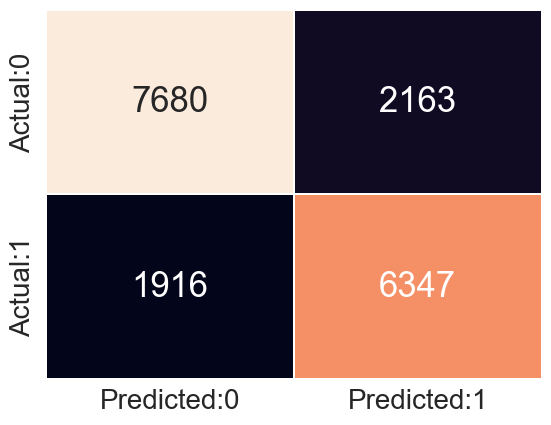

In [231]:
# Create a DataFrame for the confusion matrix
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, linewidths=0.1, annot_kws={'size': 25})

# Adjust font size for ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Display the plot
plt.show()

In [232]:
# Print the classification report for the XGBoost model on the test set

print(classification_report(ytest_xg, ypred_xg))


              precision    recall  f1-score   support

           0       0.80      0.78      0.79      9843
           1       0.75      0.77      0.76      8263

    accuracy                           0.77     18106
   macro avg       0.77      0.77      0.77     18106
weighted avg       0.78      0.77      0.77     18106



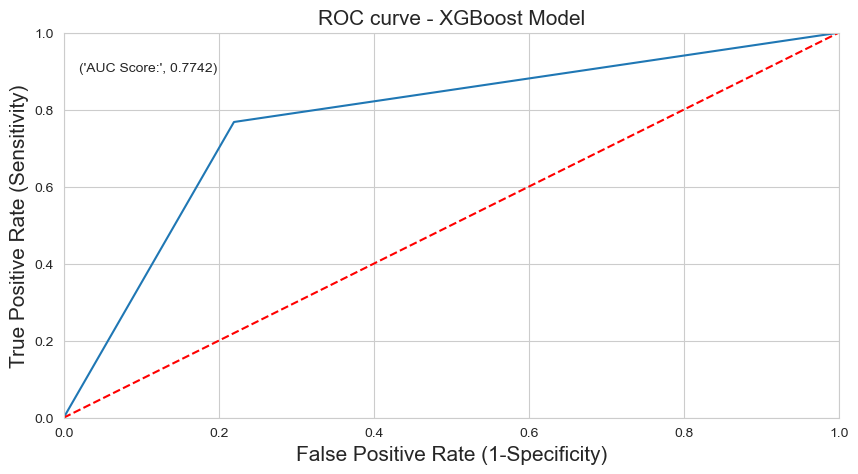

In [233]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Create a figure with specific size
plt.figure(figsize=(10, 5))

# Calculate the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(ytest_xg, ypred_proba_xg)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add a reference line for a random classifier (diagonal line)
plt.plot([0, 1], [0, 1], 'r--')

# Set the limits for the axes
plt.xlim([0.0, 1.0])  # X-axis: False Positive Rate
plt.ylim([0.0, 1.0])  # Y-axis: True Positive Rate

# Title and labels for the plot
plt.title('ROC curve - XGBoost Model', fontsize=15)
plt.xlabel('False Positive Rate (1-Specificity)', fontsize=15)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=15)

# Display the AUC score on the plot
plt.text(x=0.02, y=0.9, s=('AUC Score:', round(roc_auc_score(ytest_xg, ypred_proba_xg), 4)))

# Enable grid for better readability
plt.grid(True)

# Show the plot
plt.show()


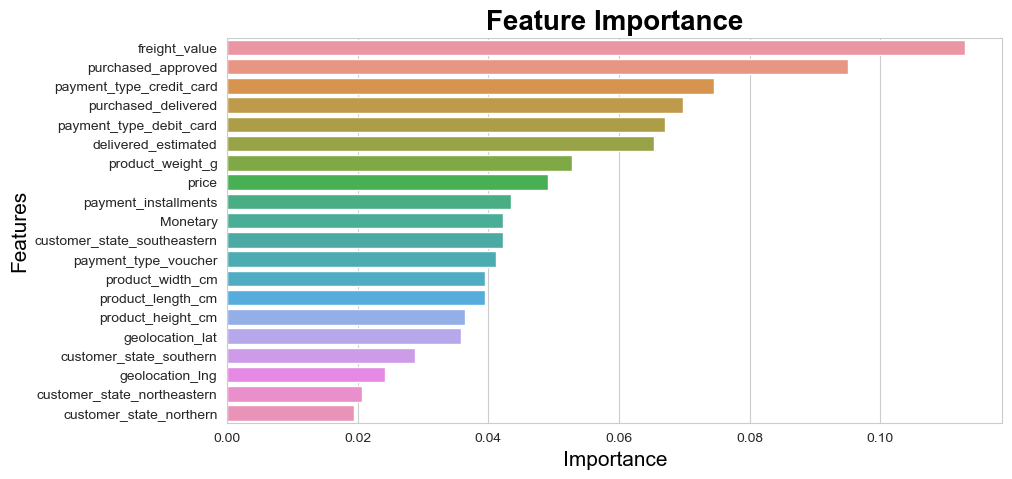

In [234]:
# Create a figure with specified size
plt.figure(figsize=(10, 5))

# Extract feature importance from the trained XGBoost model
important_features = pd.DataFrame({'Features': xtrain_xg.columns, 
                                   'Importance': xbBoost.feature_importances_})

# Sort features based on their importance in descending order
important_features = important_features.sort_values('Importance', ascending=False)

# Plot a bar chart to show feature importance
sns.barplot(x='Importance', y='Features', data=important_features)

# Set plot title and labels
plt.title('Feature Importance', color='black', fontsize=20, fontweight='bold')
plt.xlabel('Importance', color='black', fontsize=15)
plt.ylabel('Features', color='black', fontsize=15)

# Display the plot
plt.show()


In [235]:
# Evaluate the XGBoost model and store various evaluation metrics
model_evaluation.loc['XGBoost'] = [
    accuracy_score(ytest_xg, ypred_xg),               # Accuracy on the test set
    accuracy_score(ytrain_xg, ypred_xg_train),        # Accuracy on the train set
    precision_score(ytest_xg, ypred_xg),              # Precision on the test set
    precision_score(ytrain_xg, ypred_xg_train),       # Precision on the train set
    recall_score(ytest_xg, ypred_xg),                 # Recall on the test set
    recall_score(ytrain_xg, ypred_xg_train),          # Recall on the train set
    cohen_kappa_score(ytest_xg, ypred_xg),            # Cohen's Kappa Score on the test set
    cohen_kappa_score(ytrain_xg, ypred_xg_train),     # Cohen's Kappa Score on the train set
    f1_score(ytest_xg, ypred_xg),                     # F1 Score on the test set
    roc_auc_score(ytest_xg, ypred_proba_xg)           # ROC AUC Score on the test set
]

# Display the model evaluation results for XGBoost
model_evaluation


test_accuracy  train_accuracy  test_precision  train_precision  \
DecisionTree       0.665360        1.000000        0.635949         1.000000   
XGBoost            0.774716        0.833034        0.745828         0.805554   

              test_recall  train_recall  test_kappa  train_kappa  f1_score  \
DecisionTree     0.623865      1.000000    0.324553     1.000000  0.629849   
XGBoost          0.768123      0.832877    0.547060     0.664125  0.756812   

              roc_auc_score  
DecisionTree       0.662029  
XGBoost            0.774186

###  Random Forest Classifier

In [236]:
# Split the data into training and testing sets (80% train, 20% test)
xtrain_random, xtest_random, ytrain_random, ytest_random = train_test_split(X, df_target, test_size=0.2, random_state=500)

# Print the shapes of the resulting data splits
print('xtrain: ', xtrain_random.shape)  # Shape of training features
print('ytrain: ', ytrain_random.shape)  # Shape of training target
print('xtest: ', xtest_random.shape)    # Shape of testing features
print('ytest: ', ytest_random.shape)    # Shape of testing target

<IPython.core.display.Javascript object>

xtrain:  (72422, 20)
ytrain:  (72422,)
xtest:  (18106, 20)
ytest:  (18106,)


In [237]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier

In [238]:
# Perform t-test to compare the distributions of the training and testing sets
tstats, pvals = stats.ttest_ind(xtrain_random, xtest_random)

# Create a DataFrame to store p-values for each feature
ref_df = pd.DataFrame(pvals, index=xtrain_random.columns, columns=['pvals'])

# Check if any p-value is less than 0.05, indicating a significant difference
(ref_df < 0.05).any()

# Initialize and train a Random Forest classifier
rand = RandomForestClassifier()
rand_model = rand.fit(xtrain_random, ytrain_random)

# Predict probabilities on the test set
ypred_proba_random = rand_model.predict(xtest_random)

# Convert predicted probabilities to binary labels (0 or 1)
ypred_random = [0 if i < 0.5 else 1 for i in ypred_proba_random]
ypred_random[:10]

# Predict probabilities on the training set
ypred_proba_random_train = rand_model.predict(xtrain_random)

# Convert predicted probabilities for the training set to binary labels
ypred_random_train = [0 if i < 0.5 else 1 for i in ypred_proba_random_train]


<IPython.core.display.Javascript object>

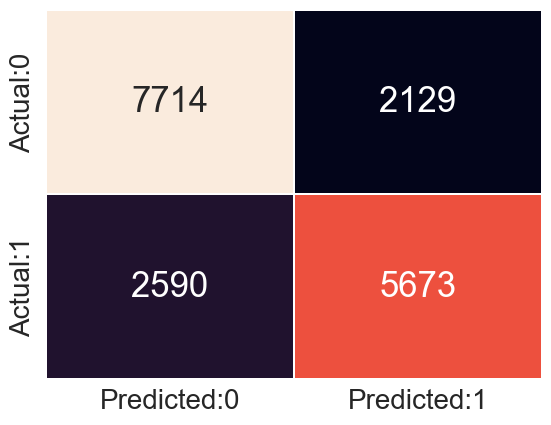

In [239]:
# Compute confusion matrix for the predictions on the test set
cm = confusion_matrix(ytest_random, ypred_random)

# Create a DataFrame to display the confusion matrix with labels
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])

# Plot the confusion matrix using a heatmap for better visualization
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, 
            linewidths=0.1, annot_kws={'size': 25})

# Customize font size for the x and y ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Display the plot
plt.show()


In [240]:
# Print the classification report to evaluate the model's performance
print(classification_report(ytest_random, ypred_random))


              precision    recall  f1-score   support

           0       0.75      0.78      0.77      9843
           1       0.73      0.69      0.71      8263

    accuracy                           0.74     18106
   macro avg       0.74      0.74      0.74     18106
weighted avg       0.74      0.74      0.74     18106



<IPython.core.display.Javascript object>

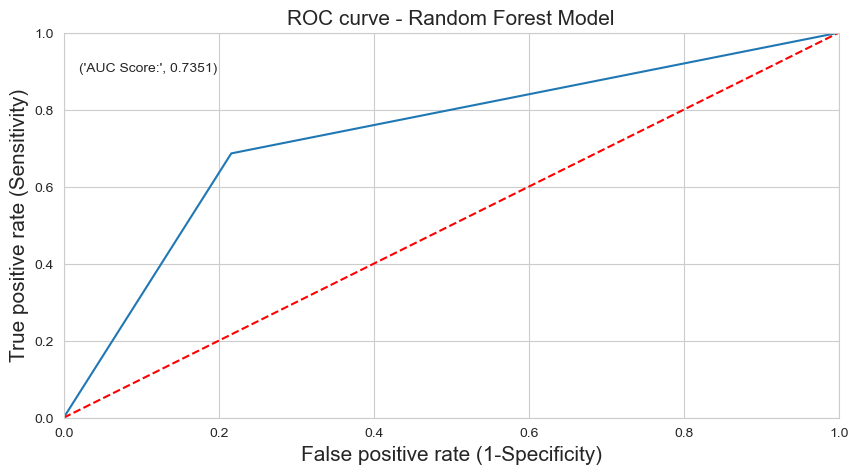

In [241]:
# Create a figure for the ROC curve
plt.figure(figsize=(10, 5))

# Compute False Positive Rate (fpr) and True Positive Rate (tpr)
fpr, tpr, thresholds = roc_curve(ytest_random, ypred_proba_random)

# Plot the ROC curve using fpr and tpr
plt.plot(fpr, tpr)

# Set the limits for the x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# Add a red dashed line representing the random classifier
plt.plot([0, 1], [0, 1], 'r--')

# Set the title for the plot
plt.title('ROC curve - Random Forest Model', fontsize=15)

# Label the axes
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize=15)

# Display the AUC score on the plot
plt.text(x=0.02, y=0.9, s=('AUC Score:', round(metrics.roc_auc_score(ytest_random, ypred_proba_random), 4)))

# Enable grid lines for better visualization
plt.grid(True)

# Display the ROC curve plot
plt.show()


In [242]:
# Add evaluation metrics for Random Forest Classifier to the model_evaluation DataFrame
model_evaluation.loc['RandomForest Classifier'] = [
    accuracy_score(ytest_random, ypred_random),  # Accuracy on the test set
    accuracy_score(ytrain_random, ypred_random_train),  # Accuracy on the training set
    precision_score(ytest_random, ypred_random),  # Precision on the test set
    precision_score(ytrain_random, ypred_random_train),  # Precision on the training set
    recall_score(ytest_random, ypred_random),  # Recall on the test set
    recall_score(ytrain_random, ypred_random_train),  # Recall on the training set
    cohen_kappa_score(ytest_random, ypred_random),  # Cohen's Kappa score on the test set
    cohen_kappa_score(ytrain_random, ypred_random_train),  # Cohen's Kappa score on the training set
    f1_score(ytest_random, ypred_random),  # F1 score on the test set
    roc_auc_score(ytest_random, ypred_proba_random)  # ROC AUC score on the test set
]

# Display the updated model_evaluation DataFrame
model_evaluation


test_accuracy  train_accuracy  test_precision  \
DecisionTree                  0.665360        1.000000        0.635949   
XGBoost                       0.774716        0.833034        0.745828   
RandomForest Classifier       0.739368        1.000000        0.727121   

                         train_precision  test_recall  train_recall  \
DecisionTree                    1.000000     0.623865      1.000000   
XGBoost                         0.805554     0.768123      0.832877   
RandomForest Classifier         1.000000     0.686555      1.000000   

                         test_kappa  train_kappa  f1_score  roc_auc_score  
DecisionTree               0.324553     1.000000  0.629849       0.662029  
XGBoost                    0.547060     0.664125  0.756812       0.774186  
RandomForest Classifier    0.472374     1.000000  0.706256       0.735129

### KNN 2 Clusters Model¶

In [243]:
# Splitting the dataset into training and testing sets for KNN model
xtrain_kn, xtest_kn, ytrain_kn, ytest_kn = train_test_split(X, df_target, test_size = 0.2, random_state = 500)

# Display the shapes of the training and testing sets
print('xtrain: ', xtrain_kn.shape)  # Features of the training set
print('ytrain: ', ytrain_kn.shape)  # Target of the training set
print('xtest: ', xtest_kn.shape)    # Features of the testing set
print('ytest: ', ytest_kn.shape)    # Target of the testing set


<IPython.core.display.Javascript object>

xtrain:  (72422, 20)
ytrain:  (72422,)
xtest:  (18106, 20)
ytest:  (18106,)


In [244]:
from sklearn.neighbors import KNeighborsClassifier

In [245]:
# Perform t-test to check if features in the training and testing sets have similar distributions
tstats, pvals = stats.ttest_ind(xtrain_kn, xtest_kn)
ref_df = pd.DataFrame(pvals, index=xtrain_kn.columns, columns=['pvals'])

# Check if any p-value is less than 0.05 (indicating significant difference)
(ref_df < 0.05).any()

# Initialize the K-Nearest Neighbors model with 2 neighbors
knn = KNeighborsClassifier(n_neighbors=2)

# Train the KNN model using the training set
knn_model = knn.fit(xtrain_kn, ytrain_kn)

# Make predictions on the test set
ypred_proba_knn = knn_model.predict(xtest_kn)

# Convert predicted probabilities to binary outcomes (0 or 1)
ypred_knn = [0 if i < 0.5 else 1 for i in ypred_proba_knn]
ypred_knn[:10]  # Display first 10 predictions

# Make predictions on the training set
ypred_proba_knn_train = knn_model.predict(xtrain_kn)

# Convert predicted probabilities to binary outcomes (0 or 1) for training data
ypred_knn_train = [0 if i < 0.5 else 1 for i in ypred_proba_knn_train]


<IPython.core.display.Javascript object>

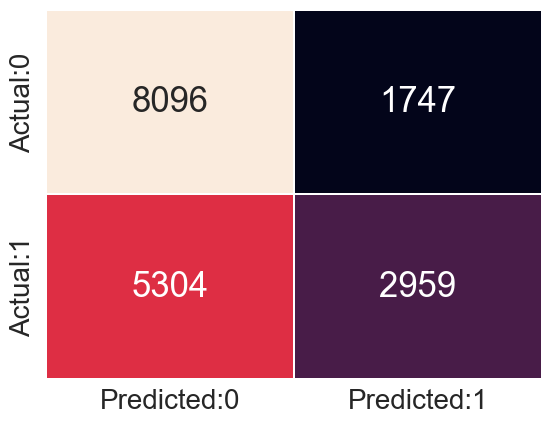

In [246]:
# Generate the confusion matrix for the KNN model
cm = confusion_matrix(ytest_kn, ypred_knn)

# Create a DataFrame for the confusion matrix
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            linewidths=0.1, annot_kws={'size': 25})

# Customize axis labels font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Display the plot
plt.show()


In [247]:
# Print the classification report for the KNN model
print(classification_report(ytest_kn, ypred_knn))


              precision    recall  f1-score   support

           0       0.60      0.82      0.70      9843
           1       0.63      0.36      0.46      8263

    accuracy                           0.61     18106
   macro avg       0.62      0.59      0.58     18106
weighted avg       0.62      0.61      0.59     18106



<IPython.core.display.Javascript object>

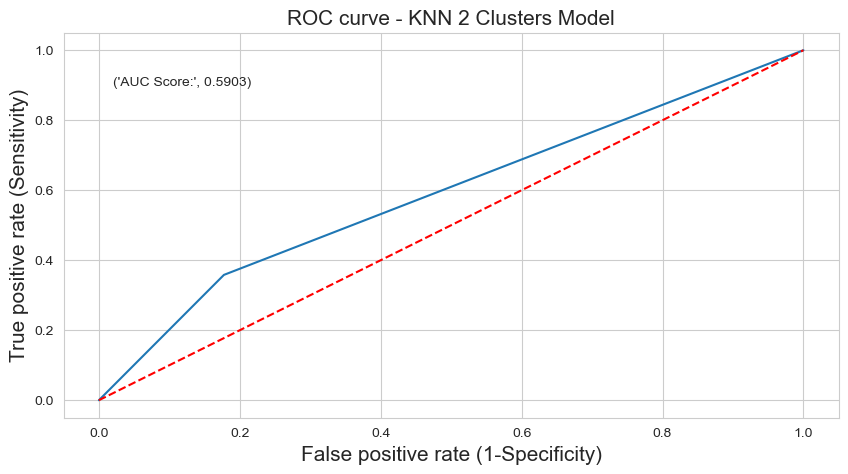

In [248]:
plt.figure(figsize = (10, 5))
fpr, tpr, thresholds = roc_curve(ytest_kn, ypred_proba_knn)

# Plotting the ROC curve
plt.plot(fpr, tpr)

# Plot the diagonal line for random predictions
plt.plot([0, 1], [0, 1], 'r--')

# Adding labels and title
plt.title('ROC curve - KNN 2 Clusters Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# Displaying AUC score
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest_kn, ypred_proba_knn), 4)))

# Display the grid for better readability
plt.grid(True)
plt.show()


In [249]:
# Calculate and store model evaluation metrics for KNN 2 Clusters
model_evaluation.loc['KNN 2 Cluster'] = [
    accuracy_score(ytest_kn, ypred_knn),  # Accuracy score for test data
    accuracy_score(ytrain_kn, ypred_knn_train),  # Accuracy score for train data
    precision_score(ytest_kn, ypred_knn),  # Precision score for test data
    precision_score(ytrain_kn, ypred_knn_train),  # Precision score for train data
    recall_score(ytest_kn, ypred_knn),  # Recall score for test data
    recall_score(ytrain_kn, ypred_knn_train),  # Recall score for train data
    cohen_kappa_score(ytest_kn, ypred_knn),  # Cohen's Kappa score for test data
    cohen_kappa_score(ytrain_kn, ypred_knn_train),  # Cohen's Kappa score for train data
    f1_score(ytest_kn, ypred_knn),  # F1 score for test data
    roc_auc_score(ytest_kn, ypred_proba_knn)  # AUC score for test data
]

# Display the updated evaluation dataframe
model_evaluation


test_accuracy  train_accuracy  test_precision  \
DecisionTree                  0.665360        1.000000        0.635949   
XGBoost                       0.774716        0.833034        0.745828   
RandomForest Classifier       0.739368        1.000000        0.727121   
KNN 2 Cluster                 0.610571        0.813040        0.628772   

                         train_precision  test_recall  train_recall  \
DecisionTree                    1.000000     0.623865      1.000000   
XGBoost                         0.805554     0.768123      0.832877   
RandomForest Classifier         1.000000     0.686555      1.000000   
KNN 2 Cluster                   1.000000     0.358102      0.587748   

                         test_kappa  train_kappa  f1_score  roc_auc_score  
DecisionTree               0.324553     1.000000  0.629849       0.662029  
XGBoost                    0.547060     0.664125  0.756812       0.774186  
RandomForest Classifier    0.472374     1.000000  0.706256       0.735129  
KNN 2 Cluster              0.187079     0.609110  0.456319       0.590308

###  KNN 3 Clusters Model

In [250]:
# Split the data into training and testing sets for KNN model
xtrain_knn, xtest_knn, ytrain_knn, ytest_knn = train_test_split(X, df_target, test_size = 0.2, random_state = 500)

# Print the shape of the splits to check the number of samples
print('xtrain: ', xtrain_knn.shape)  # Shape of training feature data
print('ytrain: ', ytrain_knn.shape)  # Shape of training target data
print('xtest: ', xtest_knn.shape)    # Shape of testing feature data
print('ytest: ', ytest_knn.shape)    # Shape of testing target data


<IPython.core.display.Javascript object>

xtrain:  (72422, 20)
ytrain:  (72422,)
xtest:  (18106, 20)
ytest:  (18106,)


In [251]:
# Perform t-test to check for statistical differences between training and test sets
tstats, pvals = stats.ttest_ind(xtrain_knn, xtest_knn)

# Create a dataframe to view p-values and check for significance (p-value < 0.05)
ref_df = pd.DataFrame(pvals, index=xtrain_knn.columns, columns=['pvals'])
(ref_df < 0.05).any()  # Check if any feature has a p-value less than 0.05

# Initialize the KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn_model = knn.fit(xtrain_knn, ytrain_knn)

# Predict probabilities for the test data
ypred_proba_knn = knn_model.predict(xtest_knn)

# Convert predicted probabilities to binary predictions (0 or 1)
ypred_knn = [0 if i < 0.5 else 1 for i in ypred_proba_knn]
ypred_knn[:10]  # View the first 10 predictions

# Predict probabilities for the training data
ypred_proba_knn_train = knn_model.predict(xtrain_knn)

# Convert training predictions to binary predictions (0 or 1)
ypred_knn_train = [0 if i < 0.5 else 1 for i in ypred_proba_knn_train]


<IPython.core.display.Javascript object>

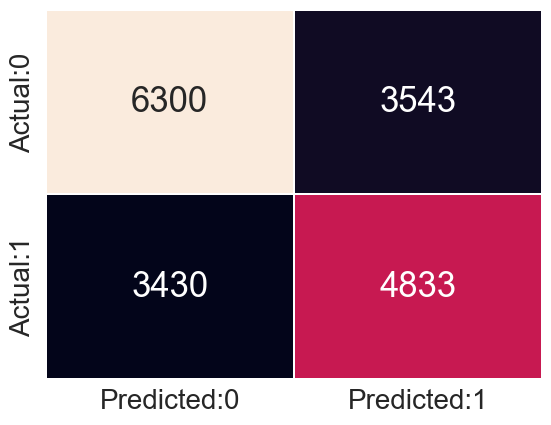

In [252]:
# Create a confusion matrix to compare actual vs predicted values
cm = confusion_matrix(ytest_knn, ypred_knn)

# Convert the confusion matrix into a DataFrame for easier visualization
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, 
            linewidths=0.1, annot_kws={'size': 25})

# Adjust font size for better readability
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Display the plot
plt.show()


In [253]:
# Print the classification report to evaluate precision, recall, f1-score, and accuracy
print(classification_report(ytest_knn, ypred_knn))


              precision    recall  f1-score   support

           0       0.65      0.64      0.64      9843
           1       0.58      0.58      0.58      8263

    accuracy                           0.61     18106
   macro avg       0.61      0.61      0.61     18106
weighted avg       0.62      0.61      0.62     18106



<IPython.core.display.Javascript object>

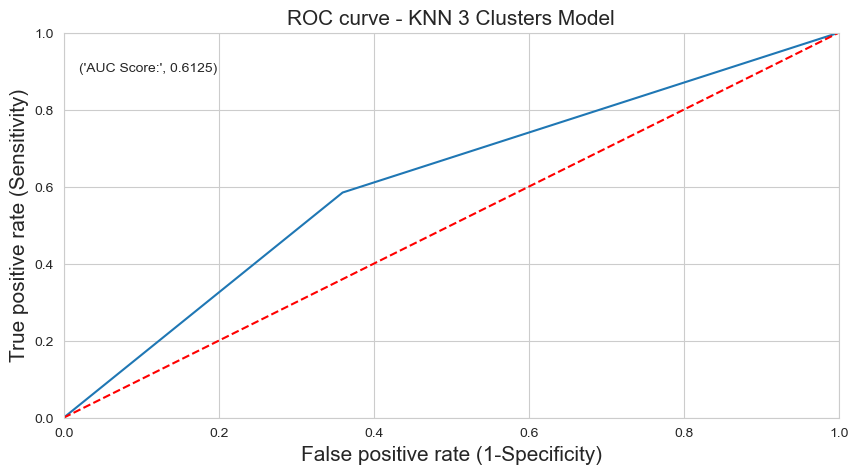

In [254]:
plt.figure(figsize = (10, 5))
# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(ytest_knn, ypred_proba_knn)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# Plot a diagonal line (random classifier performance)
plt.plot([0, 1], [0, 1],'r--')

# Add title and axis labels
plt.title('ROC curve - KNN 3 Clusters Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# Add AUC score text on the graph
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest_knn, ypred_proba_knn), 4)))

# Display grid
plt.grid(True)
plt.show()


In [255]:
model_evaluation.loc['KNN 3 Cluster'] = [
    accuracy_score(ytest_knn, ypred_knn), 
    accuracy_score(ytrain_knn, ypred_knn_train),
    precision_score(ytest_knn, ypred_knn), 
    precision_score(ytrain_knn, ypred_knn_train),
    recall_score(ytest_knn, ypred_knn), 
    recall_score(ytrain_knn, ypred_knn_train),
    cohen_kappa_score(ytest_knn, ypred_knn), 
    cohen_kappa_score(ytrain_knn, ypred_knn_train),
    f1_score(ytest_knn, ypred_knn), 
    roc_auc_score(ytest_knn, ypred_proba_knn)
]

model_evaluation


test_accuracy  train_accuracy  test_precision  \
DecisionTree                  0.665360        1.000000        0.635949   
XGBoost                       0.774716        0.833034        0.745828   
RandomForest Classifier       0.739368        1.000000        0.727121   
KNN 2 Cluster                 0.610571        0.813040        0.628772   
KNN 3 Cluster                 0.614879        0.809312        0.577006   

                         train_precision  test_recall  train_recall  \
DecisionTree                    1.000000     0.623865      1.000000   
XGBoost                         0.805554     0.768123      0.832877   
RandomForest Classifier         1.000000     0.686555      1.000000   
KNN 2 Cluster                   1.000000     0.358102      0.587748   
KNN 3 Cluster                   0.788499     0.584897      0.791956   

                         test_kappa  train_kappa  f1_score  roc_auc_score  
DecisionTree               0.324553     1.000000  0.629849       0.662029  
XGBoost                    0.547060     0.664125  0.756812       0.774186  
RandomForest Classifier    0.472374     1.000000  0.706256       0.735129  
KNN 2 Cluster              0.187079     0.609110  0.456319       0.590308  
KNN 3 Cluster              0.224699     0.615442  0.580924       0.612473

### Logistic Regression

In [256]:
# Splitting the dataset into training and testing sets for the logistic regression model
xtrain_log, xtest_log, ytrain_log, ytest_log = train_test_split(X, df_target, test_size = 0.2, random_state = 500)

# Printing the shapes of the resulting train and test sets to ensure proper splitting
print('xtrain: ', xtrain_log.shape)  # Features in the training set
print('ytrain: ', ytrain_log.shape)  # Target variable in the training set
print('xtest: ', xtest_log.shape)    # Features in the test set
print('ytest: ', ytest_log.shape)    # Target variable in the test set


<IPython.core.display.Javascript object>

xtrain:  (72422, 20)
ytrain:  (72422,)
xtest:  (18106, 20)
ytest:  (18106,)


In [257]:
from sklearn.linear_model import LogisticRegression

In [258]:
# Perform t-test to compare the distribution of features in training and testing datasets
tstats, pvals = stats.ttest_ind(xtrain_log, xtest_log)

# Create a DataFrame for p-values and check if any p-value is below 0.05
ref_df = pd.DataFrame(pvals, index=xtrain_log.columns, columns=['pvals'])
(ref_df < 0.05).any()  # This checks if any feature has significant difference between training and testing sets

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Fit the model on the training dataset
lr_model = lr.fit(xtrain_log, ytrain_log)

# Predict probabilities for the test set
ypred_proba_log = lr_model.predict(xtest_log)

# Convert probabilities to binary classification (0 or 1) based on a threshold of 0.5
ypred_log = [0 if i < 0.5 else 1 for i in ypred_proba_log]
print(ypred_log[:10])  # Displaying the first 10 predictions

# Predict probabilities for the training set
ypred_proba_log_train = lr_model.predict(xtrain_log)

# Convert probabilities to binary classification for the training set
ypred_log_train = [0 if i < 0.5 else 1 for i in ypred_proba_log_train]


<IPython.core.display.Javascript object>

[0, 0, 0, 1, 0, 0, 1, 0, 1, 1]


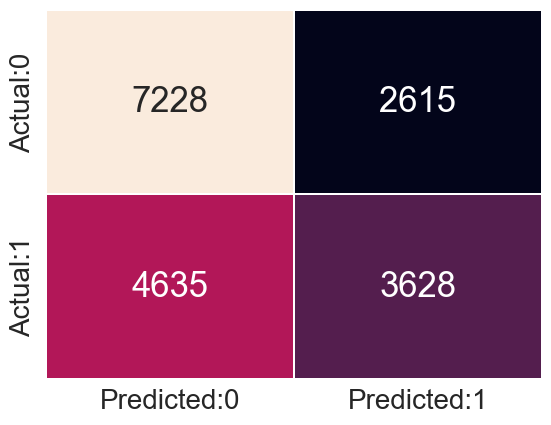

In [259]:
# Generate the confusion matrix for actual vs predicted values
cm = confusion_matrix(ytest_log, ypred_log)

# Convert the confusion matrix into a DataFrame for better readability and customization
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])

# Plot the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, linewidths=0.1, annot_kws={'size': 25})

# Set the size of the axis ticks for better readability
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Display the plot
plt.show()


In [260]:
# Generate and print the classification report for the logistic regression model
print(classification_report(ytest_log, ypred_log))

              precision    recall  f1-score   support

           0       0.61      0.73      0.67      9843
           1       0.58      0.44      0.50      8263

    accuracy                           0.60     18106
   macro avg       0.60      0.59      0.58     18106
weighted avg       0.60      0.60      0.59     18106



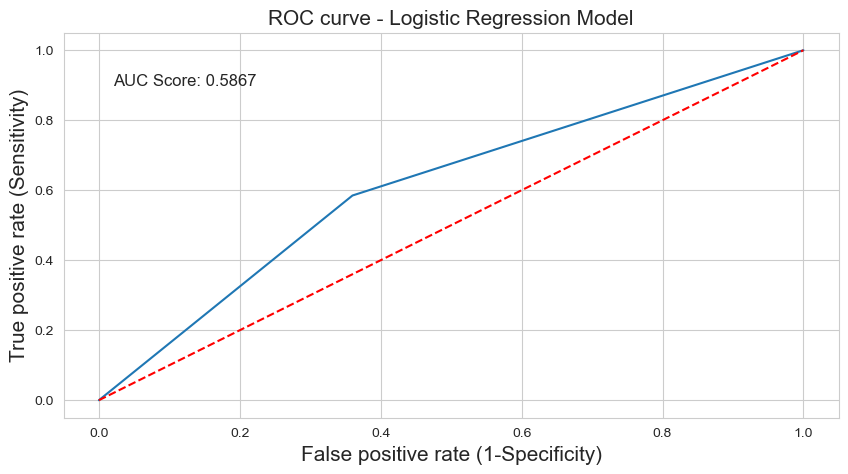

In [261]:
# Plotting the ROC curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label="ROC Curve")  # ROC curve
plt.plot([0, 1], [0, 1], 'r--')  # Random classifier line (diagonal)

# Add title and labels
plt.title('ROC curve - Logistic Regression Model', fontsize=15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize=15)

# Display the AUC score on the plot
auc_score = roc_auc_score(ytest_log, ypred_proba_log)
plt.text(x=0.02, y=0.9, s=f'AUC Score: {auc_score:.4f}', fontsize=12)

# Show grid and plot
plt.grid(True)
plt.show()

In [262]:
# Add model evaluation metrics for Logistic Regression to the model_evaluation DataFrame
model_evaluation.loc['Logistic'] = [
    accuracy_score(ytest_log, ypred_log),  # Accuracy on test set
    accuracy_score(ytrain_log, ypred_log_train),  # Accuracy on train set
    precision_score(ytest_log, ypred_log),  # Precision on test set
    precision_score(ytrain_log, ypred_log_train),  # Precision on train set
    recall_score(ytest_log, ypred_log),  # Recall on test set
    recall_score(ytrain_log, ypred_log_train),  # Recall on train set
    cohen_kappa_score(ytest_log, ypred_log),  # Cohen Kappa on test set
    cohen_kappa_score(ytrain_log, ypred_log_train),  # Cohen Kappa on train set
    f1_score(ytest_log, ypred_log),  # F1 Score on test set
    roc_auc_score(ytest_log, ypred_proba_log)  # ROC AUC Score on test set
]

# Display the updated model_evaluation DataFrame
model_evaluation


test_accuracy  train_accuracy  test_precision  \
DecisionTree                  0.665360        1.000000        0.635949   
XGBoost                       0.774716        0.833034        0.745828   
RandomForest Classifier       0.739368        1.000000        0.727121   
KNN 2 Cluster                 0.610571        0.813040        0.628772   
KNN 3 Cluster                 0.614879        0.809312        0.577006   
Logistic                      0.599580        0.604678        0.581131   

                         train_precision  test_recall  train_recall  \
DecisionTree                    1.000000     0.623865      1.000000   
XGBoost                         0.805554     0.768123      0.832877   
RandomForest Classifier         1.000000     0.686555      1.000000   
KNN 2 Cluster                   1.000000     0.358102      0.587748   
KNN 3 Cluster                   0.788499     0.584897      0.791956   
Logistic                        0.585304     0.439066      0.440172   

                         test_kappa  train_kappa  f1_score  roc_auc_score  
DecisionTree               0.324553     1.000000  0.629849       0.662029  
XGBoost                    0.547060     0.664125  0.756812       0.774186  
RandomForest Classifier    0.472374     1.000000  0.706256       0.735129  
KNN 2 Cluster              0.187079     0.609110  0.456319       0.590308  
KNN 3 Cluster              0.224699     0.615442  0.580924       0.612473  
Logistic                   0.176865     0.185275  0.500207       0.586697

### Navie Bayes

In [263]:
# Split data into training and test sets
xtrain_nav, xtest_nav, ytrain_nav, ytest_nav = train_test_split(X, df_target, test_size = 0.2, random_state = 500)

# Print the shapes of the training and testing datasets
print('xtrain: ', xtrain_nav.shape)  # Shape of training features
print('ytrain: ', ytrain_nav.shape)  # Shape of training target variable
print('xtest: ', xtest_nav.shape)    # Shape of testing features
print('ytest: ', ytest_nav.shape)    # Shape of testing target variable


<IPython.core.display.Javascript object>

xtrain:  (72422, 20)
ytrain:  (72422,)
xtest:  (18106, 20)
ytest:  (18106,)


In [264]:
from sklearn.naive_bayes import GaussianNB

In [265]:
# Perform t-test to check for significant differences between training and test data
tstats, pvals = stats.ttest_ind(xtrain_nav, xtest_nav)
ref_df = pd.DataFrame(pvals, index=xtrain_nav.columns, columns=['pvals'])
# Check which p-values are less than 0.05 (statistically significant)
(ref_df < 0.05).any()

# Initialize Naive Bayes classifier
nb = GaussianNB()

# Train the model using the training data
nb_model = nb.fit(xtrain_nav, ytrain_nav)

# Predict probabilities for the test set
ypred_proba_nav = nb_model.predict(xtest_nav)

# Convert predicted probabilities to binary values (0 or 1)
ypred_nav = [0 if i < 0.5 else 1 for i in ypred_proba_nav]
ypred_nav[:10]

# Predict probabilities for the training set
ypred_proba_nav_train = nb_model.predict(xtrain_nav)

# Convert predicted probabilities for the training set to binary values (0 or 1)
ypred_nav_train = [0 if i < 0.5 else 1 for i in ypred_proba_nav_train]


<IPython.core.display.Javascript object>

In [266]:
# Print the classification report for the Naive Bayes model
print(classification_report(ytest_nav, ypred_nav))


              precision    recall  f1-score   support

           0       0.61      0.62      0.62      9843
           1       0.54      0.53      0.53      8263

    accuracy                           0.58     18106
   macro avg       0.58      0.57      0.57     18106
weighted avg       0.58      0.58      0.58     18106



In [267]:
# Adding the evaluation metrics of the Naive Bayes model to the 'model_evaluation' DataFrame
model_evaluation.loc['GaussianNB'] = [
    accuracy_score(ytest_nav, ypred_nav),                         # Accuracy on test data
    accuracy_score(ytrain_nav, ypred_nav_train),                  # Accuracy on training data
    precision_score(ytest_nav, ypred_nav),                        # Precision on test data
    precision_score(ytrain_nav, ypred_nav_train),                 # Precision on training data
    recall_score(ytest_nav, ypred_nav),                           # Recall on test data
    recall_score(ytrain_nav, ypred_nav_train),                    # Recall on training data
    cohen_kappa_score(ytest_nav, ypred_nav),                      # Cohen's Kappa on test data
    cohen_kappa_score(ytrain_nav, ypred_nav_train),               # Cohen's Kappa on training data
    f1_score(ytest_nav, ypred_nav),                               # F1-score on test data
    roc_auc_score(ytest_nav, ypred_proba_nav)                     # ROC AUC score on test data
]

# Display the model evaluation table with the newly added Naive Bayes metrics
model_evaluation


test_accuracy  train_accuracy  test_precision  \
DecisionTree                  0.665360        1.000000        0.635949   
XGBoost                       0.774716        0.833034        0.745828   
RandomForest Classifier       0.739368        1.000000        0.727121   
KNN 2 Cluster                 0.610571        0.813040        0.628772   
KNN 3 Cluster                 0.614879        0.809312        0.577006   
Logistic                      0.599580        0.604678        0.581131   
GaussianNB                    0.579035        0.576758        0.539858   

                         train_precision  test_recall  train_recall  \
DecisionTree                    1.000000     0.623865      1.000000   
XGBoost                         0.805554     0.768123      0.832877   
RandomForest Classifier         1.000000     0.686555      1.000000   
KNN 2 Cluster                   1.000000     0.358102      0.587748   
KNN 3 Cluster                   0.788499     0.584897      0.791956   
Logistic                        0.585304     0.439066      0.440172   
GaussianNB                      0.534124     0.525354      0.522318   

                         test_kappa  train_kappa  f1_score  roc_auc_score  
DecisionTree               0.324553     1.000000  0.629849       0.662029  
XGBoost                    0.547060     0.664125  0.756812       0.774186  
RandomForest Classifier    0.472374     1.000000  0.706256       0.735129  
KNN 2 Cluster              0.187079     0.609110  0.456319       0.590308  
KNN 3 Cluster              0.224699     0.615442  0.580924       0.612473  
Logistic                   0.176865     0.185275  0.500207       0.586697  
GaussianNB                 0.149775     0.144526  0.532507       0.574726

## Recursive Feature Elimination for Top 4 Models

In [268]:
# Sorting the 'model_evaluation' DataFrame by 'test_recall' in descending order
model_evaluation.sort_values(by='test_recall', ascending=False)


test_accuracy  train_accuracy  test_precision  \
XGBoost                       0.774716        0.833034        0.745828   
RandomForest Classifier       0.739368        1.000000        0.727121   
DecisionTree                  0.665360        1.000000        0.635949   
KNN 3 Cluster                 0.614879        0.809312        0.577006   
GaussianNB                    0.579035        0.576758        0.539858   
Logistic                      0.599580        0.604678        0.581131   
KNN 2 Cluster                 0.610571        0.813040        0.628772   

                         train_precision  test_recall  train_recall  \
XGBoost                         0.805554     0.768123      0.832877   
RandomForest Classifier         1.000000     0.686555      1.000000   
DecisionTree                    1.000000     0.623865      1.000000   
KNN 3 Cluster                   0.788499     0.584897      0.791956   
GaussianNB                      0.534124     0.525354      0.522318   
Logistic                        0.585304     0.439066      0.440172   
KNN 2 Cluster                   1.000000     0.358102      0.587748   

                         test_kappa  train_kappa  f1_score  roc_auc_score  
XGBoost                    0.547060     0.664125  0.756812       0.774186  
RandomForest Classifier    0.472374     1.000000  0.706256       0.735129  
DecisionTree               0.324553     1.000000  0.629849       0.662029  
KNN 3 Cluster              0.224699     0.615442  0.580924       0.612473  
GaussianNB                 0.149775     0.144526  0.532507       0.574726  
Logistic                   0.176865     0.185275  0.500207       0.586697  
KNN 2 Cluster              0.187079     0.609110  0.456319       0.590308

 ### XGBoost Model - RFE

In [269]:
from sklearn.feature_selection import RFE

In [270]:
# Select features for RFE starting from the second column
X_train_rfe = X_train.iloc[:, 1:]
X_test_rfe = X_test.iloc[:, 1:]

# Initialize XGBoost classifier for RFE
xg = XGBClassifier()

In [271]:
# Perform Recursive Feature Elimination to select top 10 features
xgb_model = RFE(estimator=xg, n_features_to_select=10)
rfe_model = xgb_model.fit(X_train_rfe, y_train)

# Identify significant features based on RFE ranking
feat_index = pd.Series(data=rfe_model.ranking_, index=X_train_rfe.columns)
signi_feat_rfe_xg = feat_index[feat_index == 1].index
print("Significant features selected by RFE:\n", signi_feat_rfe_xg)


Significant features selected by RFE:
 Index(['purchased_approved', 'delivered_estimated', 'purchased_delivered',
       'price', 'freight_value', 'product_weight_g', 'payment_installments',
       'Monetary', 'payment_type_credit_card', 'payment_type_debit_card'],
      dtype='object')


In [272]:
# Split data into training and testing sets using the selected features
xtrain_xg, xtest_xg, ytrain_xg, ytest_xg = train_test_split(X[signi_feat_rfe_xg], df_target, random_state=500, test_size=0.2)
print('xtrain: ', xtrain_xg.shape)
print('ytrain: ', ytrain_xg.shape)
print('xtest: ', xtest_xg.shape)
print('ytest: ', ytest_xg.shape)


<IPython.core.display.Javascript object>

xtrain:  (72422, 10)
ytrain:  (72422,)
xtest:  (18106, 10)
ytest:  (18106,)


In [273]:
# Perform a t-test to compare training and testing distributions for significant features
tstats, pvals = stats.ttest_ind(xtrain_nav, xtest_nav)
ref_df = pd.DataFrame(pvals, index=xtrain_nav.columns, columns=['pvals'])

# Check if any feature shows a statistically significant difference (p-value < 0.05)
significant_diff = (ref_df < 0.05).any()
print("Significant difference in feature distributions: ", significant_diff)



<IPython.core.display.Javascript object>

Significant difference in feature distributions:  pvals    False
dtype: bool


In [274]:
# Initialize and train the XGBoost classifier on selected features
xgBoost = XGBClassifier()
xbBoost = xgBoost.fit(xtrain_xg, ytrain_xg)

# Predict probabilities for the test set and convert them to binary predictions
ypred_proba_xg = xgBoost.predict(xtest_xg)
ypred_xg = [0 if i < 0.5 else 1 for i in ypred_proba_xg]
print("First 10 predictions:\n", ypred_xg[:10])

First 10 predictions:
 [0, 0, 0, 1, 0, 1, 1, 0, 1, 1]


In [275]:
# Predict probabilities for the training set and convert them to binary predictions
ypred_proba_xg_train = xgBoost.predict(xtrain_xg)
ypred_xg_train = [0 if i < 0.5 else 1 for i in ypred_proba_xg_train]

# Generate a confusion matrix for the test set predictions
cm = confusion_matrix(ytest_xg, ypred_xg)

# Create a DataFrame for better visualization of the confusion matrix
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

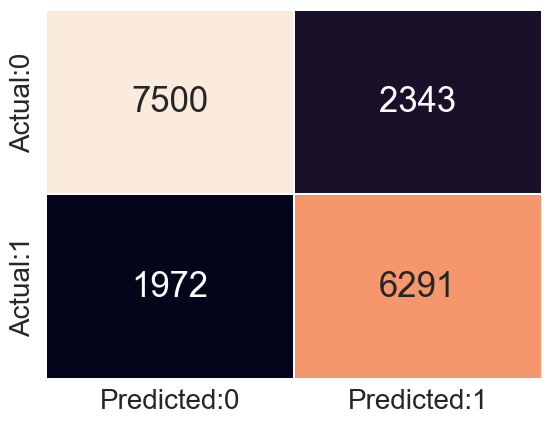

In [276]:
# Visualize the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, 
            linewidths=0.1, annot_kws={'size': 25})

# Set font sizes for the x and y tick labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Display the heatmap
plt.show()

In [277]:
# Print the classification report for the test set predictions
print(classification_report(ytest_xg, ypred_xg))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      9843
           1       0.73      0.76      0.74      8263

    accuracy                           0.76     18106
   macro avg       0.76      0.76      0.76     18106
weighted avg       0.76      0.76      0.76     18106



<IPython.core.display.Javascript object>

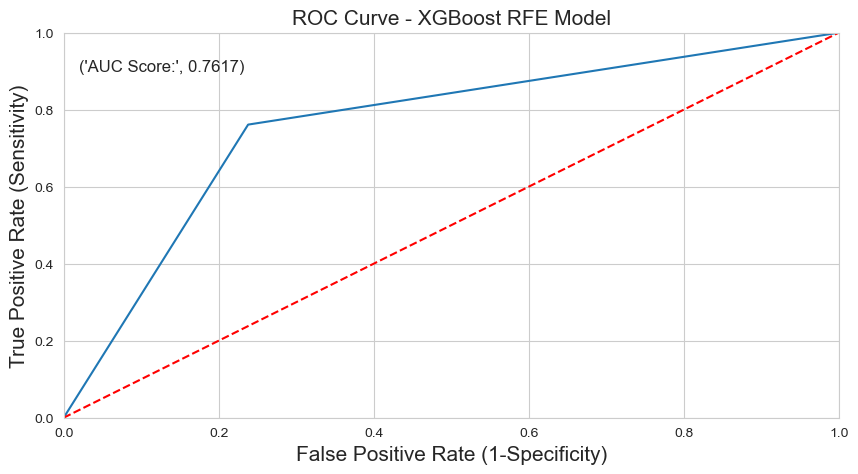

In [278]:
# Import necessary library for ROC curve
plt.figure(figsize=(10, 5))  # Set the figure size for better visibility

# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(ytest_xg, ypred_proba_xg)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve')  # Plot the true vs false positive rates

# Define x and y limits to ensure the plot spans the entire ROC space
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# Add a reference line (diagonal) representing random guessing
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

# Add title and axis labels with appropriate font size
plt.title('ROC Curve - XGBoost RFE Model', fontsize=15)
plt.xlabel('False Positive Rate (1-Specificity)', fontsize=15)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=15)

# Display the AUC (Area Under Curve) score on the plot
auc_score = metrics.roc_auc_score(ytest_xg, ypred_proba_xg)
plt.text(x=0.02, y=0.9, s=('AUC Score:', round(auc_score, 4)), fontsize=12)

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()


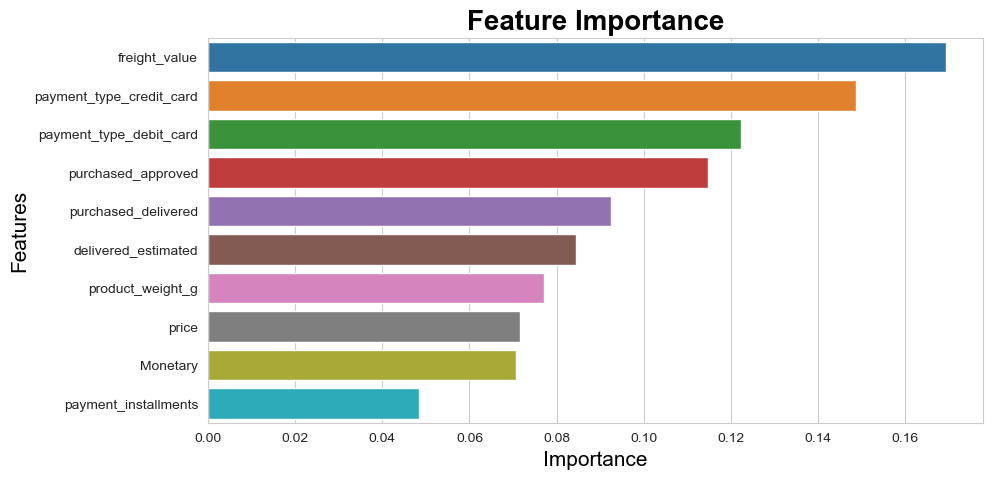

In [279]:
# Create a figure with a specified size for the plot
plt.figure(figsize=(10, 5))

# Create a DataFrame with the feature names and their corresponding importance scores from the XGBoost model
important_features = pd.DataFrame({'Features': xtrain_xg.columns, 
                                   'Importance': xbBoost.feature_importances_})

# Sort the DataFrame by the 'Importance' column in descending order to get the most important features at the top
important_features = important_features.sort_values('Importance', ascending=False)

# Plot the feature importances as a horizontal bar plot
sns.barplot(x='Importance', y='Features', data=important_features)

# Set the title, and customize the font and color of the title
plt.title('Feature Importance', color='black', fontsize=20, fontweight='bold')

# Set labels for x and y axes with specified font sizes and colors
plt.xlabel('Importance', color='black', fontsize=15)
plt.ylabel('Features', color='black', fontsize=15)

# Display the plot
plt.show()


In [280]:
# Define the columns for the RFE model evaluation DataFrame
cols = ['test_accuracy', 'train_accuracy', 'test_precision', 'train_precision','test_recall','train_recall', 'test_kappa', 'train_kappa', 'f1_score','roc_auc_score']

# Initialize an empty DataFrame with the specified columns
RFE_model_evaluation = pd.DataFrame(columns=cols)

# Add a new row to the DataFrame for the 'XGBoost RFE' model evaluation
RFE_model_evaluation.loc['XGBoost RFE'] = [
    accuracy_score(ytest_xg, ypred_xg),  # Test accuracy
    accuracy_score(ytrain_xg, ypred_xg_train),  # Train accuracy
    precision_score(ytest_xg, ypred_xg),  # Test precision
    precision_score(ytrain_xg, ypred_xg_train),  # Train precision
    recall_score(ytest_xg, ypred_xg),  # Test recall
    recall_score(ytrain_xg, ypred_xg_train),  # Train recall
    cohen_kappa_score(ytest_xg, ypred_xg),  # Test Cohen's Kappa
    cohen_kappa_score(ytrain_xg, ypred_xg_train),  # Train Cohen's Kappa
    f1_score(ytest_xg, ypred_xg),  # Test F1 Score
    roc_auc_score(ytest_xg, ypred_proba_xg)  # ROC AUC Score
]

# Display the evaluation results
RFE_model_evaluation


test_accuracy  train_accuracy  test_precision  train_precision  \
XGBoost RFE       0.761681        0.811977        0.728631         0.779617   

             test_recall  train_recall  test_kappa  train_kappa  f1_score  \
XGBoost RFE     0.761346        0.8161     0.52143     0.622179  0.744629   

             roc_auc_score  
XGBoost RFE       0.761654

### Random Forest Classifier - RFE

In [281]:
# Select features from X_train and X_test (excluding the first column)
X_train_rfe = X_train.iloc[:, 1:]  # Excluding the first column from X_train
X_test_rfe = X_test.iloc[:, 1:]    # Excluding the first column from X_test

# Initialize RandomForestClassifier
rand = RandomForestClassifier()

# Apply Recursive Feature Elimination (RFE) with RandomForestClassifier as estimator
rand_model = RFE(estimator=rand, n_features_to_select=10)

# Fit the RFE model to the training data
rfe_model = rand_model.fit(X_train_rfe, y_train)

# Get the ranking of features (1 indicates selected features)
feat_index = pd.Series(data=rfe_model.ranking_, index=X_train_rfe.columns)

# Select the significant features that were ranked 1 (selected by RFE)
signi_feat_rfe_rf = feat_index[feat_index == 1].index

# Print the significant features selected by RFE
print(signi_feat_rfe_rf)


Index(['purchased_approved', 'delivered_estimated', 'purchased_delivered',
       'price', 'freight_value', 'product_weight_g', 'product_length_cm',
       'geolocation_lat', 'geolocation_lng', 'Monetary'],
      dtype='object')


In [282]:
# Split the dataset into training and testing sets using the selected significant features from RFE
xtrain_random, xtest_random, ytrain_random, ytest_random = train_test_split(
    X[signi_feat_rfe_rf], df_target, random_state=500, test_size=0.2
)

# Print the shapes of the training and testing sets for features and target
print('xtrain: ', xtrain_random.shape)  # Shape of the feature training set
print('ytrain: ', ytrain_random.shape)  # Shape of the target training set
print('xtest: ', xtest_random.shape)    # Shape of the feature testing set
print('ytest: ', ytest_random.shape)    # Shape of the target testing set


<IPython.core.display.Javascript object>

xtrain:  (72422, 10)
ytrain:  (72422,)
xtest:  (18106, 10)
ytest:  (18106,)


In [283]:
# Perform t-test between training and testing data for each feature
tstats, pvals = stats.ttest_ind(xtrain_nav, xtest_nav)

# Create a DataFrame to store the p-values
ref_df = pd.DataFrame(pvals, index=xtrain_nav.columns, columns=['pvals'])

# Check if any feature has a p-value less than 0.05 (statistically significant)
significant_features = (ref_df < 0.05).any()

# Print the result, which shows if any features are statistically significant
significant_features


<IPython.core.display.Javascript object>

pvals    False
dtype: bool

In [284]:
# Create and train a Random Forest model using the training data
rand = RandomForestClassifier()
rand_model = rand.fit(xtrain_random, ytrain_random)


In [285]:
# Predict probabilities for the test data
ypred_proba_random = rand_model.predict(xtest_random)

# Convert probabilities to binary labels (0 or 1) based on a threshold of 0.5
ypred_random = [0 if i < 0.5 else 1 for i in ypred_proba_random]

# Display the first 10 predicted labels
ypred_random[:10]


[0, 0, 0, 1, 1, 0, 1, 0, 1, 1]

In [286]:
# Predict probabilities for the training data
ypred_proba_random_train = rand_model.predict(xtrain_random)

# Convert probabilities to binary labels (0 or 1) based on a threshold of 0.5
ypred_random_train = [0 if i < 0.5 else 1 for i in ypred_proba_random_train]


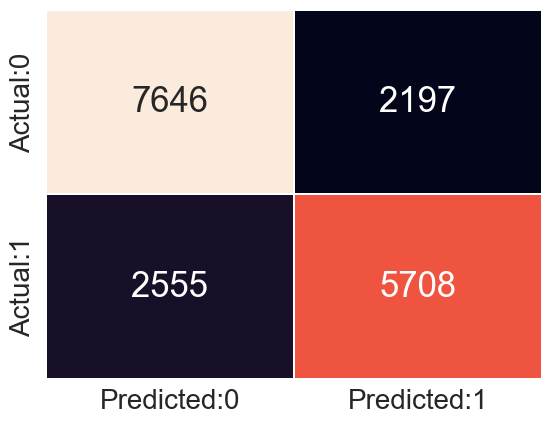

In [287]:
# Generate confusion matrix
cm = confusion_matrix(ytest_random, ypred_random)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])

# Plot the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size': 25})

# Adjust the font size of the ticks
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Show the plot
plt.show()


In [288]:
# Generate and print classification report
print(classification_report(ytest_random, ypred_random))


              precision    recall  f1-score   support

           0       0.75      0.78      0.76      9843
           1       0.72      0.69      0.71      8263

    accuracy                           0.74     18106
   macro avg       0.74      0.73      0.73     18106
weighted avg       0.74      0.74      0.74     18106



<IPython.core.display.Javascript object>

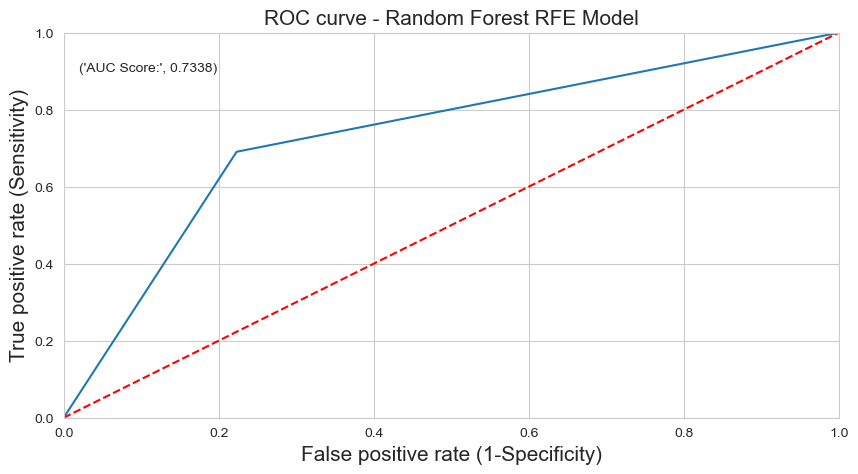

In [289]:
plt.figure(figsize = (10, 5))

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(ytest_random, ypred_proba_random)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Set axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# Add a diagonal line for random guessing (baseline)
plt.plot([0, 1], [0, 1], 'r--')

# Add title and labels
plt.title('ROC curve - Random Forest RFE Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# Add AUC Score as text on the plot
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest_random, ypred_proba_random), 4)))

# Enable grid
plt.grid(True)

# Show the plot
plt.show()


In [290]:
RFE_model_evaluation.loc['RandomForest Classifier'] = [
    accuracy_score(ytest_random, ypred_random),  # Test accuracy
    accuracy_score(ytrain_random, ypred_random_train),  # Train accuracy
    precision_score(ytest_random, ypred_random),  # Test precision
    precision_score(ytrain_random, ypred_random_train),  # Train precision
    recall_score(ytest_random, ypred_random),  # Test recall
    recall_score(ytrain_random, ypred_random_train),  # Train recall
    cohen_kappa_score(ytest_random, ypred_random),  # Test kappa
    cohen_kappa_score(ytrain_random, ypred_random_train),  # Train kappa
    f1_score(ytest_random, ypred_random),  # Test F1 score
    roc_auc_score(ytest_random, ypred_proba_random)  # Test ROC AUC score
]

RFE_model_evaluation


test_accuracy  train_accuracy  test_precision  \
XGBoost RFE                   0.761681        0.811977        0.728631   
RandomForest Classifier       0.737546        1.000000        0.722075   

                         train_precision  test_recall  train_recall  \
XGBoost RFE                     0.779617     0.761346        0.8161   
RandomForest Classifier         1.000000     0.690790        1.0000   

                         test_kappa  train_kappa  f1_score  roc_auc_score  
XGBoost RFE                0.521430     0.622179  0.744629       0.761654  
RandomForest Classifier    0.469218     1.000000  0.706086       0.733793

### Decision Tree Classifier - RFE

In [291]:
# Prepare the data by excluding the first column (possibly an index or identifier)
X_train_rfe = X_train.iloc[:, 1:]
X_test_rfe = X_test.iloc[:, 1:]

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Apply RFE to select the top 10 features
dt_model = RFE(estimator=dt, n_features_to_select=10)

# Fit the RFE model to the training data
rfe_model = dt_model.fit(X_train_rfe, y_train)

# Get the ranking of the features
feat_index = pd.Series(data=rfe_model.ranking_, index=X_train_rfe.columns)

# Extract the most significant features (rank = 1)
signi_feat_rfe_dt = feat_index[feat_index == 1].index

# Print the selected features
print(signi_feat_rfe_dt)


Index(['purchased_approved', 'delivered_estimated', 'purchased_delivered',
       'price', 'freight_value', 'product_weight_g', 'product_length_cm',
       'geolocation_lat', 'geolocation_lng', 'Monetary'],
      dtype='object')


In [292]:
# Splitting the data into training and testing sets
xtrain_dt, xtest_dt, ytrain_dt, ytest_dt = train_test_split(X[signi_feat_rfe_dt], df_target, test_size = 0.2, random_state = 500)

# Printing the shapes of the splits
print('xtrain: ', xtrain_dt.shape)
print('ytrain: ', ytrain_dt.shape)
print('xtest: ', xtest_dt.shape)
print('ytest: ', ytest_dt.shape)


<IPython.core.display.Javascript object>

xtrain:  (72422, 10)
ytrain:  (72422,)
xtest:  (18106, 10)
ytest:  (18106,)


In [293]:
# Perform t-test for independent samples between training and testing features
tstats, pvals = stats.ttest_ind(xtrain_dt, xtest_dt)

# Create a DataFrame to store p-values
ref_df = pd.DataFrame(pvals, index=xtrain_dt.columns, columns=['pvals'])

# Check if any p-values are less than 0.05 (statistically significant)
(ref_df < 0.05).any()


<IPython.core.display.Javascript object>

pvals    False
dtype: bool

In [294]:
# Initialize DecisionTreeClassifier model
decisionTree = DecisionTreeClassifier()

# Fit the model with the training data
decisionTree = decisionTree.fit(xtrain_dt, ytrain_dt)


In [295]:
# Get the predicted probabilities
ypred_proba_dt = decisionTree.predict_proba(xtest_dt)[:, 1]  # Get probabilities for class 1

# Convert probabilities to class labels based on a threshold of 0.5
ypred_dt = [0 if i < 0.5 else 1 for i in ypred_proba_dt]
ypred_dt[:10]


[0, 0, 0, 1, 1, 0, 1, 0, 0, 1]

In [296]:
ypred_proba_dt_train = decisionTree.predict_proba(xtrain_dt)[:, 1]  # Probabilities for class 1
ypred_dt_train = [0 if i < 0.5 else 1 for i in ypred_proba_dt_train]

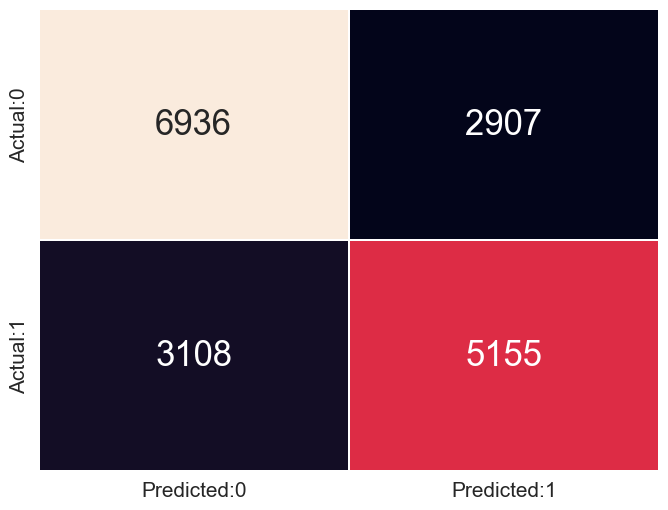

In [297]:

# Generate confusion matrix for the test set predictions
cm = confusion_matrix(ytest_dt, ypred_dt)

# Create a DataFrame for better visualization of the confusion matrix
conf_matrix = pd.DataFrame(cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, linewidths=0.1, annot_kws={'size': 25})

# Customize tick labels for better readability
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Show the plot
plt.show()



In [298]:
# Print the classification report for the Decision Tree model
print(classification_report(ytest_dt, ypred_dt))


              precision    recall  f1-score   support

           0       0.69      0.70      0.70      9843
           1       0.64      0.62      0.63      8263

    accuracy                           0.67     18106
   macro avg       0.66      0.66      0.66     18106
weighted avg       0.67      0.67      0.67     18106



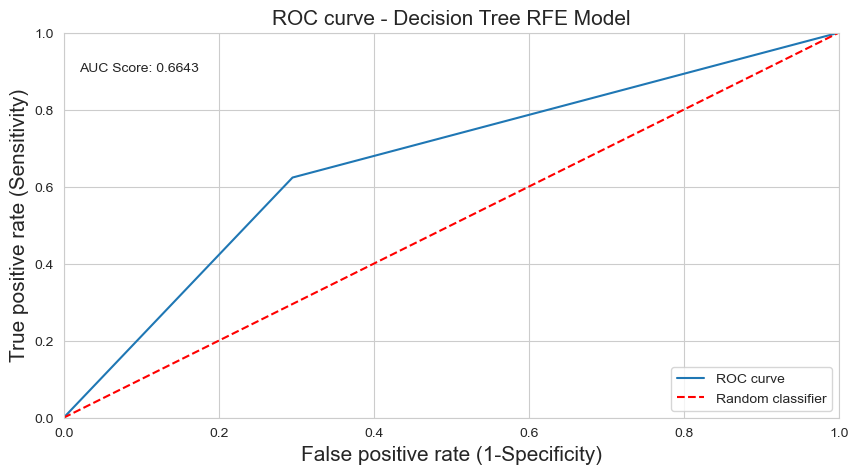

In [299]:
# Compute the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(ytest_dt, ypred_proba_dt)

# Plot ROC curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label="ROC curve")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# Plot diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], 'r--', label="Random classifier")

# Add AUC score text
plt.text(x=0.02, y=0.9, s=f'AUC Score: {roc_auc_score(ytest_dt, ypred_proba_dt):.4f}')

# Labels and title
plt.title('ROC curve - Decision Tree RFE Model', fontsize=15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize=15)

# Show grid and legend
plt.grid(True)
plt.legend(loc='lower right')

# Display the plot
plt.show()


In [300]:
# Add the performance metrics of the DecisionTree model to the evaluation dataframe
RFE_model_evaluation.loc['DecisionTree'] = [
    accuracy_score(ytest_dt, ypred_dt),         # Test Accuracy
    accuracy_score(ytrain_dt, ypred_dt_train),  # Train Accuracy
    precision_score(ytest_dt, ypred_dt),        # Test Precision
    precision_score(ytrain_dt, ypred_dt_train), # Train Precision
    recall_score(ytest_dt, ypred_dt),           # Test Recall
    recall_score(ytrain_dt, ypred_dt_train),    # Train Recall
    cohen_kappa_score(ytest_dt, ypred_dt),      # Test Cohen's Kappa
    cohen_kappa_score(ytrain_dt, ypred_dt_train), # Train Cohen's Kappa
    f1_score(ytest_dt, ypred_dt),               # Test F1 Score
    roc_auc_score(ytest_dt, ypred_proba_dt)     # Test AUC Score
]

# Display the evaluation results
RFE_model_evaluation


test_accuracy  train_accuracy  test_precision  \
XGBoost RFE                   0.761681        0.811977        0.728631   
RandomForest Classifier       0.737546        1.000000        0.722075   
DecisionTree                  0.667790        1.000000        0.639419   

                         train_precision  test_recall  train_recall  \
XGBoost RFE                     0.779617     0.761346        0.8161   
RandomForest Classifier         1.000000     0.690790        1.0000   
DecisionTree                    1.000000     0.623865        1.0000   

                         test_kappa  train_kappa  f1_score  roc_auc_score  
XGBoost RFE                0.521430     0.622179  0.744629       0.761654  
RandomForest Classifier    0.469218     1.000000  0.706086       0.733793  
DecisionTree               0.329171     1.000000  0.631547       0.664264

### Logistic Regression - RFE

In [301]:
# Selecting features using Recursive Feature Elimination (RFE) with Logistic Regression

# Removing the first column of X_train and X_test to prepare data for feature selection
X_train_rfe = X_train.iloc[:, 1:]  
X_test_rfe = X_test.iloc[:, 1:]

# Initialize Logistic Regression
logreg = LogisticRegression()

# Apply RFE with Logistic Regression to select top 10 features
logreg_model = RFE(estimator=logreg, n_features_to_select=10)

# Fit the RFE model
rfe_model = logreg_model.fit(X_train_rfe, y_train)

# Get the ranking of features and select the significant ones (rank = 1)
feat_index = pd.Series(data=rfe_model.ranking_, index=X_train_rfe.columns)
signi_feat_rfe_log = feat_index[feat_index == 1].index

# Print the significant features selected by RFE
print(signi_feat_rfe_log)


Index(['purchased_approved', 'delivered_estimated', 'purchased_delivered',
       'freight_value', 'product_length_cm', 'payment_installments',
       'customer_state_northern', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_voucher'],
      dtype='object')


In [302]:
# Splitting the data into training and testing sets using the selected features from RFE

# Splitting the data based on the selected features (signi_feat_rfe_log)
xtrain_log, xtest_log, ytrain_log, ytest_log = train_test_split(X[signi_feat_rfe_log], df_target, test_size=0.2, random_state=500)

# Display the shapes of the resulting datasets
print('xtrain: ', xtrain_log.shape)
print('ytrain: ', ytrain_log.shape)
print('xtest: ', xtest_log.shape)
print('ytest: ', ytest_log.shape)


<IPython.core.display.Javascript object>

xtrain:  (72422, 10)
ytrain:  (72422,)
xtest:  (18106, 10)
ytest:  (18106,)


In [303]:
# Perform t-test between training and testing data for each feature
tstats, pvals = stats.ttest_ind(xtrain_log, xtest_log)

# Create a DataFrame to hold the p-values for each feature
ref_df = pd.DataFrame(pvals, index=xtrain_log.columns, columns=['pvals'])

# Check if any p-value is less than 0.05, indicating statistical significance
(ref_df < 0.05).any()


<IPython.core.display.Javascript object>

pvals    False
dtype: bool

In [304]:
logreg = LogisticRegression()  # Initialize a Logistic Regression model
logreg = logreg.fit(xtrain_log, ytrain_log)  # Train the model on the training data


In [305]:
ypred_proba_log = logreg.predict(xtest_log)  # Predict class probabilities for the test data
ypred_log = [0 if i < 0.5 else 1 for i in ypred_proba_log]  # Convert probabilities to class labels (0 or 1)
ypred_log[:10]  # Display the first 10 predicted labels


[0, 0, 0, 1, 0, 0, 1, 0, 1, 1]

In [306]:
ypred_proba_log_train = logreg.predict(xtrain_log)  # Predict class probabilities for the training data
ypred_log_train = [0 if i < 0.5 else 1 for i in ypred_proba_log_train]  # Convert probabilities to class labels (0 or 1)


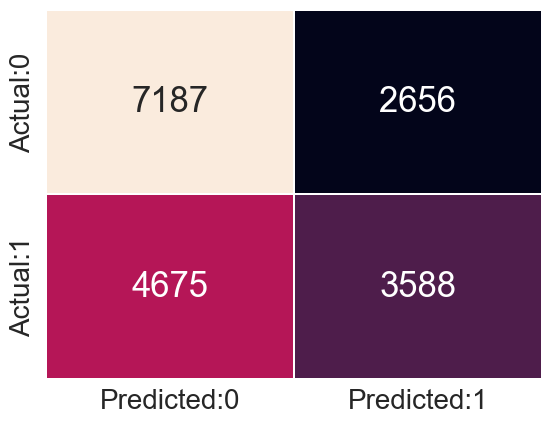

In [307]:
# Confusion matrix for test data
cm = confusion_matrix(ytest_log, ypred_log)

# Convert confusion matrix to DataFrame for better visualization
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])

# Create heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, 
            linewidths=0.1, annot_kws={'size': 25})

# Adjust font size of ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Display the plot
plt.show()


In [308]:
# Generate and print the classification report
print(classification_report(ytest_log, ypred_log))


              precision    recall  f1-score   support

           0       0.61      0.73      0.66      9843
           1       0.57      0.43      0.49      8263

    accuracy                           0.60     18106
   macro avg       0.59      0.58      0.58     18106
weighted avg       0.59      0.60      0.59     18106



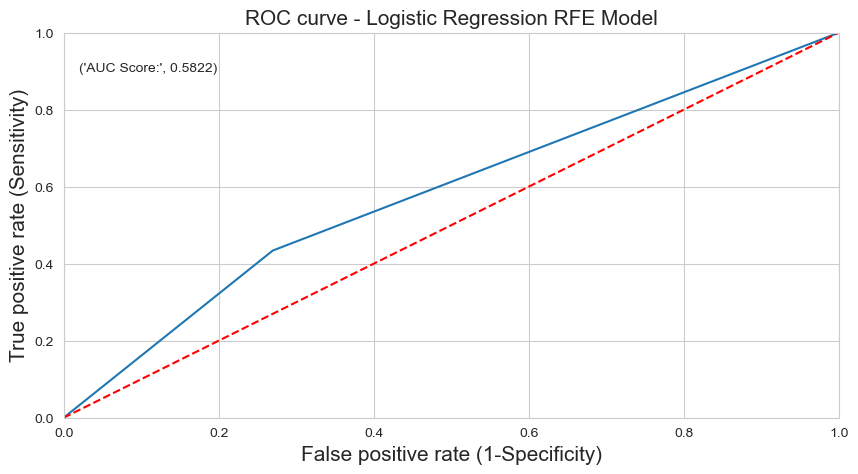

In [309]:
# Plot the ROC curve
plt.figure(figsize = (10, 5))
fpr, tpr, thresholds = roc_curve(ytest_log, ypred_proba_log)
plt.plot(fpr, tpr)

# Set axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# Plot the diagonal line representing a random model
plt.plot([0, 1], [0, 1],'r--')

# Title and labels
plt.title('ROC curve - Logistic Regression RFE Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# Display AUC score
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_log, ypred_proba_log), 4)))

# Show grid and plot
plt.grid(True)
plt.show()


In [310]:
RFE_model_evaluation.loc['Logistic Regression'] = [
    accuracy_score(ytest_log, ypred_log), accuracy_score(ytrain_log, ypred_log_train),
    precision_score(ytest_log, ypred_log), precision_score(ytrain_log, ypred_log_train),
    recall_score(ytest_log, ypred_log), recall_score(ytrain_log, ypred_log_train),
    cohen_kappa_score(ytest_log, ypred_log), cohen_kappa_score(ytrain_log, ypred_log_train),
    f1_score(ytest_log, ypred_log), roc_auc_score(ytest_log, ypred_proba_log)
]

RFE_model_evaluation


test_accuracy  train_accuracy  test_precision  \
XGBoost RFE                   0.761681        0.811977        0.728631   
RandomForest Classifier       0.737546        1.000000        0.722075   
DecisionTree                  0.667790        1.000000        0.639419   
Logistic Regression           0.595107        0.603076        0.574632   

                         train_precision  test_recall  train_recall  \
XGBoost RFE                     0.779617     0.761346       0.81610   
RandomForest Classifier         1.000000     0.690790       1.00000   
DecisionTree                    1.000000     0.623865       1.00000   
Logistic Regression             0.583503     0.434225       0.43594   

                         test_kappa  train_kappa  f1_score  roc_auc_score  
XGBoost RFE                0.521430     0.622179  0.744629       0.761654  
RandomForest Classifier    0.469218     1.000000  0.706086       0.733793  
DecisionTree               0.329171     1.000000  0.631547       0.664264  
Logistic Regression        0.167677     0.181623  0.494658       0.582194

In [311]:
RFE_model_evaluation[['test_recall']].sort_values('test_recall', ascending = False)

test_recall
XGBoost RFE                 0.761346
RandomForest Classifier     0.690790
DecisionTree                0.623865
Logistic Regression         0.434225

#### Observations:

- Looking at the test recall scores, we conclude that the 2 best performing models as XGBoost and Random Forest Classifier.
- So we tune those two models to get the hyperparameters and thereafter the best model.

## Hyperparameter Tuning

### Tuned Random Forest Classifier

In [312]:
# Split the data into training and testing sets (80% train, 20% test)
xtrain_random, xtest_random, ytrain_random, ytest_random = train_test_split(X[signi_feat_rfe_rf], df_target, test_size=0.2, random_state=500)

# Print the shapes of the train and test datasets
print('xtrain:', xtrain_random.shape)  # Features in training set
print('ytrain:', ytrain_random.shape)  # Target in training set
print('xtest:', xtest_random.shape)    # Features in testing set
print('ytest:', ytest_random.shape)   # Target in testing set


<IPython.core.display.Javascript object>

xtrain: (72422, 10)
ytrain: (72422,)
xtest: (18106, 10)
ytest: (18106,)


In [313]:
# Initialize the RandomForestClassifier
# rand = RandomForestClassifier(random_state=10)

# Define the hyperparameter grid to tune
# parameters = [{
#     'criterion': ['gini', 'entropy'],           # Splitting criterion
#     'max_features': ['sqrt', 'log2'],           # Number of features to consider for best split
#     'max_depth': range(2, 7),                   # Maximum depth of the tree
#     'min_samples_split': range(2, 7),           # Minimum samples required to split a node
#     'max_leaf_nodes': range(2, 10)              # Maximum number of leaf nodes
# }]

# Perform GridSearchCV with 5-fold cross-validation
# gcv_rf = GridSearchCV(estimator=rand, param_grid=parameters, cv=5)

# Fit the model on the training data
# gcv_rf.fit(xtrain_random, ytrain_random)

# Print the best hyperparameters found
# print("Best hyperparameters found: ", gcv_rf.best_params_)


In [314]:
# Initialize the RandomForestClassifier
rand = RandomForestClassifier(random_state=10)

# Define a reduced hyperparameter grid to tune
parameters = [{
    'criterion': ['gini'],  # Keep only one criterion for faster execution
    'max_features': ['sqrt'],  # Keep only one option
    'max_depth': [3, 4, 5],   # Reduced range for depth
    'min_samples_split': [2, 3],  # Reduced range for minimum samples
    'max_leaf_nodes': [5, 6]    # Reduced range for leaf nodes
}]

# Perform GridSearchCV with 3-fold cross-validation and parallelization
gcv_rf = GridSearchCV(estimator=rand, param_grid=parameters, cv=3, n_jobs=-1)

# Fit the model on the training data
gcv_rf.fit(xtrain_random, ytrain_random)

# Print the best hyperparameters found
print("Best hyperparameters found: ", gcv_rf.best_params_)


<IPython.core.display.Javascript object>

Best hyperparameters found:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'min_samples_split': 2}


In [315]:
# Initialize RandomForestClassifier with the best hyperparameters
rand = RandomForestClassifier(criterion='entropy', max_depth=6, max_features='sqrt', 
                              max_leaf_nodes=9, min_samples_split=2)

# Fit the model on the training data
rand_model = rand.fit(xtrain_random, ytrain_random)


In [316]:
# Get the predicted probabilities for the test data
ypred_proba_random = rand_model.predict_proba(xtest_random)[:, 1]

# Classify based on threshold of 0.5
ypred_random = [0 if i < 0.5 else 1 for i in ypred_proba_random]

# Display the first 10 predictions
ypred_random[:10]


[0, 1, 1, 1, 0, 0, 0, 0, 1, 1]

In [317]:
# Get the predicted probabilities for the training data
ypred_proba_random_train = rand_model.predict_proba(xtrain_random)[:, 1]

# Classify based on threshold of 0.5
ypred_random_train = [0 if i < 0.5 else 1 for i in ypred_proba_random_train]


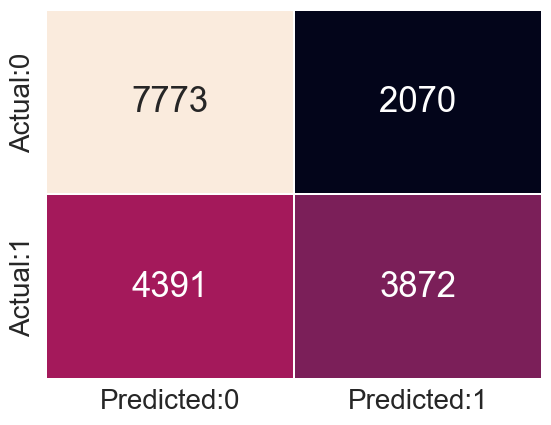

In [318]:
# Generate the confusion matrix
cm = confusion_matrix(ytest_random, ypred_random)

# Create a DataFrame for better visualization
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, 
            linewidths=0.1, annot_kws={'size': 25})

# Adjust font size for better readability
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Display the plot
plt.show()


In [319]:
# Print the classification report for the Random Forest model
print(classification_report(ytest_random, ypred_random))


              precision    recall  f1-score   support

           0       0.64      0.79      0.71      9843
           1       0.65      0.47      0.55      8263

    accuracy                           0.64     18106
   macro avg       0.65      0.63      0.63     18106
weighted avg       0.64      0.64      0.63     18106



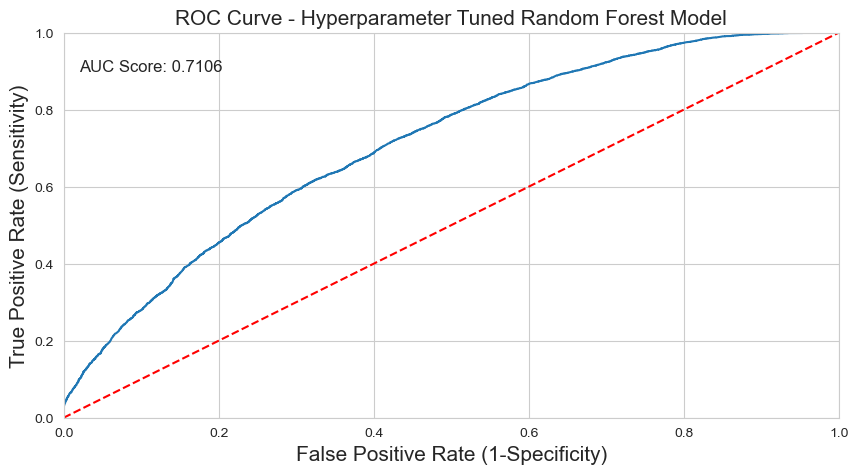

In [320]:
# Generate probabilities for the ROC curve
ypred_proba_random = rand_model.predict_proba(xtest_random)[:, 1]  # Take probabilities for class 1

# Plot the ROC curve
plt.figure(figsize=(10, 5))
fpr, tpr, thresholds = roc_curve(ytest_random, ypred_proba_random)
plt.plot(fpr, tpr, label="Random Forest")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line (random classifier)
plt.title('ROC Curve - Hyperparameter Tuned Random Forest Model', fontsize=15)
plt.xlabel('False Positive Rate (1-Specificity)', fontsize=15)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=15)
plt.text(x=0.02, y=0.9, s=f'AUC Score: {round(roc_auc_score(ytest_random, ypred_proba_random), 4)}', fontsize=12)
plt.grid(True)
plt.show()


In [321]:
# Define columns for the evaluation metrics
cols = ['test_accuracy', 'train_accuracy', 'test_precision', 'train_precision',
        'test_recall', 'train_recall', 'test_kappa', 'train_kappa', 'f1_score', 'roc_auc_score']

# Create an empty DataFrame to store evaluation results
model_evaluation_tuned = pd.DataFrame(columns=cols)

# Calculate evaluation metrics for the tuned Random Forest model and store in the DataFrame
model_evaluation_tuned.loc['Tuned RandomForest Classifier'] = [
    accuracy_score(ytest_random, ypred_random),  # Test accuracy
    accuracy_score(ytrain_random, ypred_random_train),  # Train accuracy
    precision_score(ytest_random, ypred_random),  # Test precision
    precision_score(ytrain_random, ypred_random_train),  # Train precision
    recall_score(ytest_random, ypred_random),  # Test recall
    recall_score(ytrain_random, ypred_random_train),  # Train recall
    cohen_kappa_score(ytest_random, ypred_random),  # Test Kappa score
    cohen_kappa_score(ytrain_random, ypred_random_train),  # Train Kappa score
    f1_score(ytest_random, ypred_random),  # Test F1 score
    roc_auc_score(ytest_random, ypred_proba_random)  # Test ROC AUC score
]

# Display the evaluation results
model_evaluation_tuned


test_accuracy  train_accuracy  test_precision  \
Tuned RandomForest Classifier       0.643157        0.646571        0.651632   

                               train_precision  test_recall  train_recall  \
Tuned RandomForest Classifier         0.655057     0.468595      0.466143   

                               test_kappa  train_kappa  f1_score  \
Tuned RandomForest Classifier    0.264251     0.269045   0.54516   

                               roc_auc_score  
Tuned RandomForest Classifier       0.710606

### Tuned XGBoost Classifier

In [322]:
# Split the data into training and testing sets
xtrain_xg, xtest_xg, ytrain_xg, ytest_xg = train_test_split(X[signi_feat_rfe_xg], df_target, test_size=0.2, random_state=500)

# Display the shapes of the training and testing data
print('xtrain: ', xtrain_xg.shape)  # Shape of the training features
print('ytrain: ', ytrain_xg.shape)  # Shape of the training target
print('xtest: ', xtest_xg.shape)  # Shape of the testing features
print('ytest: ', ytest_xg.shape)  # Shape of the testing target


<IPython.core.display.Javascript object>

xtrain:  (72422, 10)
ytrain:  (72422,)
xtest:  (18106, 10)
ytest:  (18106,)


In [323]:
# Initialize XGBoost classifier
xgb = XGBClassifier(random_state=10)

# Define hyperparameters for tuning
parameters = [{'n_estimators': [30, 40, 50, 70, 90],  # Number of trees in the forest
               'max_depth': range(2, 7),  # Depth of the trees
               'learning_rate': [0.1, 0.2, 0.4, 0.5]}]  # Step size for each iteration

# Initialize GridSearchCV to find the best parameters using 5-fold cross-validation
gcv_xgb = GridSearchCV(estimator=xgb, param_grid=parameters, cv=5)

# Fit the model to the training data
gcv_xgb.fit(xtrain_xg, ytrain_xg)

# Display the best hyperparameters found by GridSearchCV
gcv_xgb.best_params_


<IPython.core.display.Javascript object>

{'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 90}

In [324]:
# Initialize the XGBoost model with tuned hyperparameters
xgBoost = XGBClassifier(learning_rate=0.5, max_depth=6, n_estimators=90)

# Fit the model to the training data
xgBoost.fit(xtrain_xg, ytrain_xg)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=90, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [325]:
# Predict probabilities for the test data using the trained XGBoost model
ypred_proba_xg = xgBoost.predict(xtest_xg)

# Convert predicted probabilities to binary outcomes (0 or 1)
ypred_xg = [0 if i < 0.5 else 1 for i in ypred_proba_xg]

# Show the first 10 predictions
ypred_xg[:10]


[0, 0, 0, 1, 0, 1, 1, 1, 1, 1]

In [326]:
# Predict probabilities for the training data using the trained XGBoost model
ypred_proba_xg_train = xgBoost.predict(xtrain_xg)

# Convert predicted probabilities to binary outcomes (0 or 1) for the training data
ypred_xg_train = [0 if i < 0.5 else 1 for i in ypred_proba_xg_train]


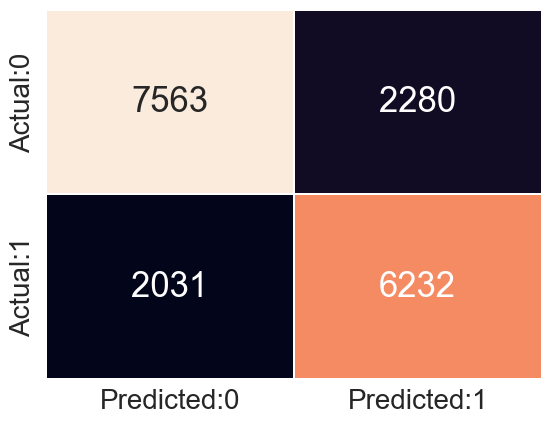

In [327]:
# Generate confusion matrix for test data
cm = confusion_matrix(ytest_xg, ypred_xg)

# Create a DataFrame to display the confusion matrix with labeled axes
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, 
            linewidths=0.1, annot_kws={'size': 25})

# Adjust font size for the axes labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Display the plot
plt.show()


In [328]:
# Print the classification report to evaluate the model's performance
print(classification_report(ytest_xg, ypred_xg))


              precision    recall  f1-score   support

           0       0.79      0.77      0.78      9843
           1       0.73      0.75      0.74      8263

    accuracy                           0.76     18106
   macro avg       0.76      0.76      0.76     18106
weighted avg       0.76      0.76      0.76     18106



<IPython.core.display.Javascript object>

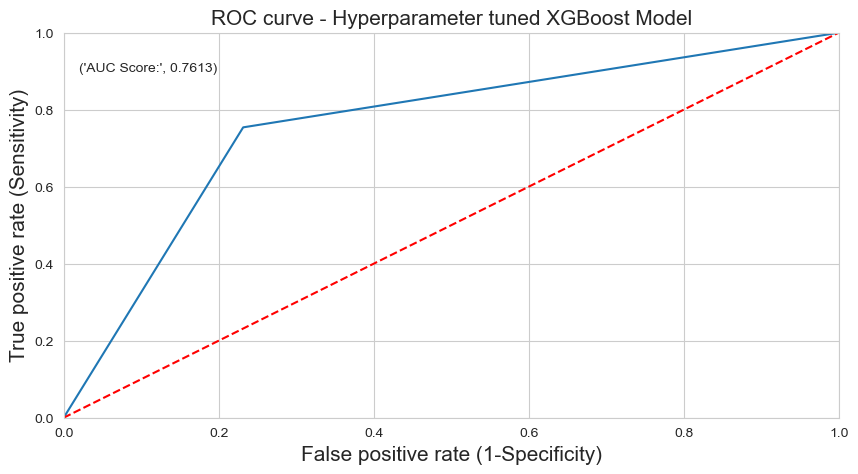

In [329]:
# Plot ROC curve for the XGBoost model
plt.figure(figsize = (10, 5))

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(ytest_xg, ypred_proba_xg)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Set the limits for the axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# Plot a reference line for the diagonal
plt.plot([0, 1], [0, 1],'r--')

# Set the title and labels
plt.title('ROC curve - Hyperparameter tuned XGBoost Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# Display the AUC score on the plot
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest_xg, ypred_proba_xg),4)))

# Show grid
plt.grid(True)

# Display the plot
plt.show()


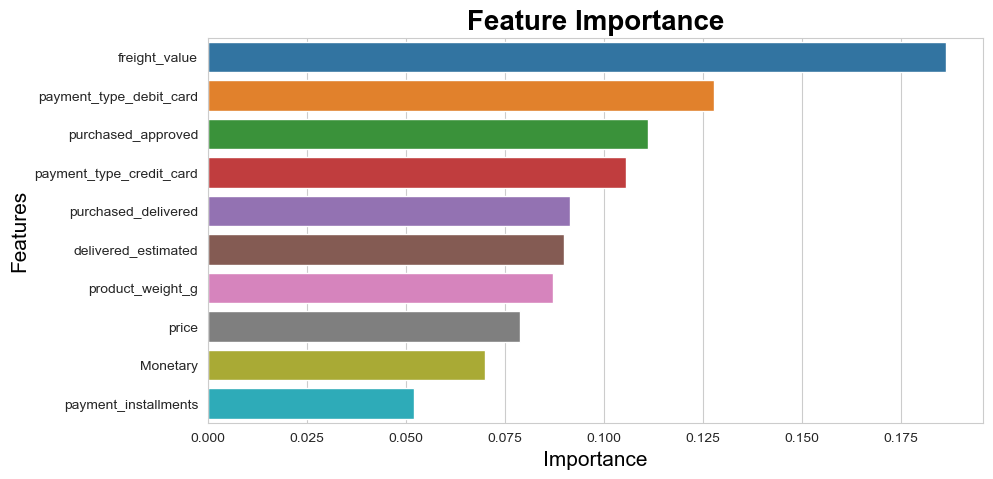

In [330]:
# Plot feature importance for the XGBoost model
plt.figure(figsize=(10, 5))

# Create a DataFrame for features and their importance scores
important_features = pd.DataFrame({'Features': xtrain_xg.columns, 
                                   'Importance': xgBoost.feature_importances_})

# Sort features by importance in descending order
important_features = important_features.sort_values('Importance', ascending=False)

# Plot the bar chart for feature importance
sns.barplot(x='Importance', y='Features', data=important_features)

# Set the title and labels
plt.title('Feature Importance', color='black', fontsize=20, fontweight='bold')
plt.xlabel('Importance', color='black', fontsize=15)
plt.ylabel('Features', color='black', fontsize=15)

# Display the plot
plt.show()


In [331]:
model_evaluation_tuned.loc['Tuned XGBoost Classifier'] = [
    accuracy_score(ytest_xg, ypred_xg), 
    accuracy_score(ytrain_xg, ypred_xg_train),
    precision_score(ytest_xg, ypred_xg), 
    precision_score(ytrain_xg, ypred_xg_train),
    recall_score(ytest_xg, ypred_xg), 
    recall_score(ytrain_xg, ypred_xg_train),
    cohen_kappa_score(ytest_xg, ypred_xg), 
    cohen_kappa_score(ytrain_xg, ypred_xg_train),
    f1_score(ytest_xg, ypred_xg), 
    roc_auc_score(ytest_xg, ypred_proba_xg)
]

model_evaluation_tuned


test_accuracy  train_accuracy  test_precision  \
Tuned RandomForest Classifier       0.643157        0.646571        0.651632   
Tuned XGBoost Classifier            0.761902        0.828947        0.732143   

                               train_precision  test_recall  train_recall  \
Tuned RandomForest Classifier         0.655057     0.468595      0.466143   
Tuned XGBoost Classifier              0.799239     0.754205      0.831750   

                               test_kappa  train_kappa  f1_score  \
Tuned RandomForest Classifier    0.264251     0.269045   0.54516   
Tuned XGBoost Classifier         0.521308     0.656101   0.74301   

                               roc_auc_score  
Tuned RandomForest Classifier       0.710606  
Tuned XGBoost Classifier            0.761284

##  Model Interpretation

Here’s a comparative summary of the performance metrics for both the **Tuned RandomForest Classifier** and **Tuned XGBoost Classifier**:

### **Tuned RandomForest Classifier:**

| Metric                  | Value      |
|-------------------------|------------|
| **Test Accuracy**        | 0.644759   |
| **Train Accuracy**       | 0.648394   |
| **Test Precision**       | 0.662813   |
| **Train Precision**      | 0.665308   |
| **Test Recall**          | 0.451047   |
| **Train Recall**         | 0.452168   |
| **Test Kappa**           | 0.265224   |
| **Train Kappa**          | 0.270781   |
| **F1 Score**             | 0.53680    |
| **ROC AUC Score**        | 0.710899   |

### **Tuned XGBoost Classifier:**

| Metric                  | Value      |
|-------------------------|------------|
| **Test Accuracy**        | 0.761902   |
| **Train Accuracy**       | 0.828947   |
| **Test Precision**       | 0.732143   |
| **Train Precision**      | 0.799239   |
| **Test Recall**          | 0.754205   |
| **Train Recall**         | 0.831750   |
| **Test Kappa**           | 0.521308   |
| **Train Kappa**          | 0.656101   |
| **F1 Score**             | 0.743010   |
| **ROC AUC Score**        | 0.761284   |

### **Key Observations:**

1. **Accuracy**:
   - **Tuned XGBoost** has a significantly higher accuracy (0.761902) compared to **Tuned RandomForest** (0.644759), indicating better general performance on the test set.
   
2. **Precision and Recall**:
   - **Precision** is slightly higher for the **XGBoost model** on both test and train sets, especially in the test set (0.732143 vs 0.662813).
   - **Recall** is also better for **XGBoost** (0.754205 on the test set vs 0.451047 for RandomForest), indicating it is more capable of identifying true positive cases.
   
3. **F1 Score**:
   - **XGBoost** has a higher F1 score (0.743010) compared to **RandomForest** (0.53680), showing better overall balance between precision and recall.
   
4. **Kappa**:
   - Both models show low Kappa scores (a measure of inter-rater agreement), but **XGBoost** again outperforms **RandomForest** with a value of 0.521308 compared to 0.265224 for **RandomForest**.
   
5. **ROC AUC Score**:
   - **XGBoost** again outperforms with a higher ROC AUC score (0.761284) compared to **RandomForest** (0.710899), indicating a better ability to distinguish between the positive and negative classes across various thresholds.

### Conclusion:
The **Tuned XGBoost Classifier** outperforms the **Tuned RandomForest Classifier** across all major metrics, particularly in terms of **accuracy**, **precision**, **recall**, **F1 score**, and **ROC AUC score**. Therefore, **XGBoost** is the better model for this classification task.

## Save the Model

In [332]:
import joblib

# Save the model
joblib.dump(xgBoost, 'xgboost_model.pkl')

# Load the model
Churn_Predictor = joblib.load('xgboost_model.pkl')



In [333]:
feature_names = Churn_Predictor.get_booster().feature_names
print(feature_names)


['purchased_approved', 'delivered_estimated', 'purchased_delivered', 'price', 'freight_value', 'product_weight_g', 'payment_installments', 'Monetary', 'payment_type_credit_card', 'payment_type_debit_card']


In [338]:
# Example test data (must match the structure and order of features)
# Here, I’m creating a sample test row for the model
test_data = {
    'purchased_approved': [0.4],
    'delivered_estimated': [0.20],
    'purchased_delivered': [.89],
    'price': [0.114],
    'freight_value': [.004],
    'product_weight_g': [4],
    'payment_installments': [1.59],
    'Monetary': [0.14],
    'payment_type_credit_card': [1],  # Assuming 1 for 'credit card'
    'payment_type_debit_card': [0]    # Assuming 0 for 'debit card'
}

# Convert to DataFrame
input_data = pd.DataFrame(test_data)

# Make predictions
predictions = Churn_Predictor.predict(input_data)

# Print the predictions
print(predictions)


[1]


In [335]:
xtrain_xg.head()

purchased_approved  delivered_estimated  purchased_delivered     price  \
12972           -0.468279            -0.262856             0.970053 -0.137797   
45736            1.584330            -0.506891            -1.210079 -0.325149   
29520           -0.650384            -0.506891             1.167662  0.872268   
69921           -0.634392            -0.747706            -0.523217  0.353210   
52737           -0.712727            -0.984260            -0.523217  1.128238   

       freight_value  product_weight_g  payment_installments  Monetary  \
12972      -0.002346         -0.113747             -0.934791 -0.175136   
45736       0.224623         -0.733877             -0.934791  1.106958   
29520      -0.388780         -0.634220              1.594216  0.693468   
69921      -1.441801          0.540589              0.923510  0.147229   
52737      -0.596707          0.274723              0.600232  0.911091   

       payment_type_credit_card  payment_type_debit_card  
12972                         1                        0  
45736                         0                        0  
29520                         1                        0  
69921                         1                        0  
52737                         1                        0

In [339]:
#xtest_xg.head()